In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pgmpy.estimators import PC
from abbeyFunctions import graph_DAG
from abiFunctions import analyze_wls_pooled_models, wls_pooled_model_analysis
import pingouin

Import dataframes for plotting the full DAGs

In [2]:
diff_nominal = pd.read_csv('diff_nominal.csv')

diff_nominal.drop(columns=['Unnamed: 0'], inplace=True)

rates_nominal = pd.read_csv('rates_nominal.csv')

rates_nominal.drop(columns=['Unnamed: 0'], inplace=True)

log_nominal = pd.read_csv('log_nominal_data.csv')

In [3]:
diff_nominal

FIPS  TimePeriod      Agri      Mini      Util        M4       M4I  \
0       1001.0        2001       NaN       NaN       NaN       NaN       NaN   
1       1001.0        2002       NaN       NaN       NaN       NaN -0.004895   
2       1001.0        2003  1.011185  0.610578 -0.767498 -0.006913  0.001531   
3       1001.0        2004 -0.570860  0.279452  0.436969  0.005551  0.011944   
4       1001.0        2005 -0.053545 -0.231773 -0.744634  0.001974  0.011496   
...        ...         ...       ...       ...       ...       ...       ...   
61715  56045.0        2016  0.092303 -0.255754 -0.315557 -0.004745  0.001701   
61716  56045.0        2017  0.570072  0.009392  0.167250 -0.000308  0.003731   
61717  56045.0        2018 -0.182600  0.216190  0.091809  0.009628  0.001597   
61718  56045.0        2019 -0.694689  0.002888  0.130280  0.155660 -0.006400   
61719  56045.0        2020  0.021407 -0.544338 -0.291322 -0.110658 -0.001517   

           unem   EFW  
0           NaN   NaN  
1      0.669231  0.01  
2      0.192308  0.02  
3     -0.284615  0.06  
4     -0.930769 -0.12  
...         ...   ...  
61715  1.646154  0.01  
61716 -0.923077  0.09  
61717 -0.546154 -0.02  
61718 -0.546154 -0.05  
61719  0.876923 -0.15  

[61720 rows x 9 columns]

Creating a dictionary to store the various combinations fo the dataframes for the DAGs

In [4]:
nominal_differenced_rates_with_all_variables = diff_nominal.dropna().set_index(['FIPS', 'TimePeriod'])

nominal_rates_with_all_variables = rates_nominal.dropna().set_index(['FIPS', 'TimePeriod'])

nominal_log_with_all_variables = log_nominal.dropna().set_index(['FIPS', 'TimePeriod'])

# Create a dictionary to store the DataFrames
full_DAG_dict = {}

full_DAG_dict['Nominal log (All variables)'] = nominal_log_with_all_variables

full_DAG_dict['Nominal log (without Monetary)'] = nominal_log_with_all_variables.drop(columns=['M4', 'M4I'])

full_DAG_dict['Nominal log (without unem)'] = nominal_log_with_all_variables.drop(columns=['unem'])

full_DAG_dict['Nominal rates (All variables)'] = nominal_rates_with_all_variables

full_DAG_dict['Nominal rates (without Monetary)'] = nominal_rates_with_all_variables.drop(columns=['M4', 'M4I'])

full_DAG_dict['Nominal rates (without unem)'] = nominal_rates_with_all_variables.drop(columns=['unem'])

full_DAG_dict['Nominal diff rates (All variables)'] = nominal_differenced_rates_with_all_variables

full_DAG_dict['Nominal diff rates (without Monetary)'] = nominal_differenced_rates_with_all_variables.drop(columns=['M4', 'M4I'])

full_DAG_dict['Nominal diff rates (without unem)'] = nominal_differenced_rates_with_all_variables.drop(columns=['unem'])

Here we plot the DAGs

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: M4
('Agri', 'Util') ['M4']
('Agri', 'M4I') []
keep control: M4
keep control: Mini
('unem', 'Agri') ['M4', 'Mini']
keep control: Agri
('M4', 'Util') ['Agri']
keep control: Mini
keep control: unem
('M4', 'Agri') ['Mini', 'unem']
('M4', 'unem') []
keep control: M4
keep control: unem
('Mini', 'Agri') ['M4', 'unem']


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Mini
keep control: unem
('Agri', 'Util') ['Mini', 'unem']
keep control: Util
keep control: unem
('Agri', 'Mini') ['Util', 'unem']
keep control: Util
keep control: Mini
('Agri', 'unem') ['Util', 'Mini']
keep control: Agri
keep control: Mini
('Util', 'unem') ['Agri', 'Mini']
keep control: Mini
keep control: unem
('Util', 'Agri') ['Mini', 'unem']
keep control: Agri
keep control: unem
('Util', 'Mini') ['Agri', 'unem']
keep control: Util
keep control: Agri
('Mini', 'unem') ['Util', 'Agri']
keep control: Agri
keep control: unem
('Mini', 'Util') ['Agri', 'unem']
keep control: Util
keep control: unem
('Mini', 'Agri') ['Util', 'unem']
keep control: Util
keep control: Mini
('unem', 'Agri') ['Util', 'Mini']
keep control: Util
keep control: Agri
('unem', 'Mini') ['Util', 'Agri']
keep control: Agri
keep control: Mini
('unem', 'Util') ['Agri', 'Mini']


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: M4
('Agri', 'Util') ['M4']
('Agri', 'M4I') []
keep control: Agri
('M4', 'Util') ['Agri']
keep control: Mini
('M4', 'Agri') ['Mini']
('M4I', 'Mini') []
keep control: M4
('Mini', 'Agri') ['M4']


  0%|          | 0/5 [00:00<?, ?it/s]

('unem', 'M4I') []
keep control: M4I
keep control: Mini
('unem', 'EFW') ['M4I', 'Mini']
keep control: Mini
keep control: unem
('M4I', 'EFW') ['Mini', 'unem']
keep control: Util
('M4I', 'M4') ['Util']
('M4I', 'Mini') []
keep control: M4I
('Util', 'M4') ['M4I']
keep control: Mini
('M4', 'unem') ['Mini']
keep control: M4
('Mini', 'unem') ['M4']
keep control: M4I
keep control: unem
('Mini', 'EFW') ['M4I', 'unem']


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: EFW
keep control: Mini
('Util', 'unem') ['EFW', 'Mini']
keep control: Util
keep control: Mini
('EFW', 'unem') ['Util', 'Mini']
('EFW', 'Mini') []
keep control: Util
keep control: EFW
('Mini', 'unem') ['Util', 'EFW']
('Mini', 'EFW') []


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Util
keep control: EFW
('Mini', 'M4I') ['Util', 'EFW']
('Mini', 'EFW') []
keep control: Util
('M4I', 'M4') ['Util']
keep control: M4I
('Util', 'M4') ['M4I']
keep control: EFW
keep control: Mini
('Util', 'M4I') ['EFW', 'Mini']
keep control: Util
keep control: Mini
('EFW', 'M4I') ['Util', 'Mini']


  0%|          | 0/5 [00:00<?, ?it/s]

('Agri', 'M4') []
keep control: Util
('M4', 'EFW') ['Util']
keep control: EFW
keep control: Mini
('M4', 'unem') ['EFW', 'Mini']
keep control: M4
keep control: Mini
('EFW', 'unem') ['M4', 'Mini']
keep control: unem
('Mini', 'M4I') ['unem']
keep control: M4
keep control: EFW
('Mini', 'unem') ['M4', 'EFW']
keep control: Mini
('unem', 'M4I') ['Mini']
keep control: M4
('Util', 'EFW') ['M4']


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Agri
keep control: Mini
('EFW', 'unem') ['Agri', 'Mini']
('EFW', 'Util') []
keep control: Agri
keep control: EFW
('Mini', 'unem') ['Agri', 'EFW']
keep control: EFW
keep control: Mini
('Agri', 'unem') ['EFW', 'Mini']
('Util', 'EFW') []


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: M4I
keep control: EFW
keep control: Mini
('Agri', 'M4') ['M4I', 'EFW', 'Mini']
('Mini', 'M4I') []
keep control: Agri
keep control: EFW
keep control: M4I
('Mini', 'M4') ['Agri', 'EFW', 'M4I']
keep control: Agri
keep control: EFW
keep control: Mini
('M4I', 'M4') ['Agri', 'EFW', 'Mini']
('Util', 'EFW') []
keep control: Agri
keep control: M4I
keep control: Mini
('EFW', 'M4') ['Agri', 'M4I', 'Mini']


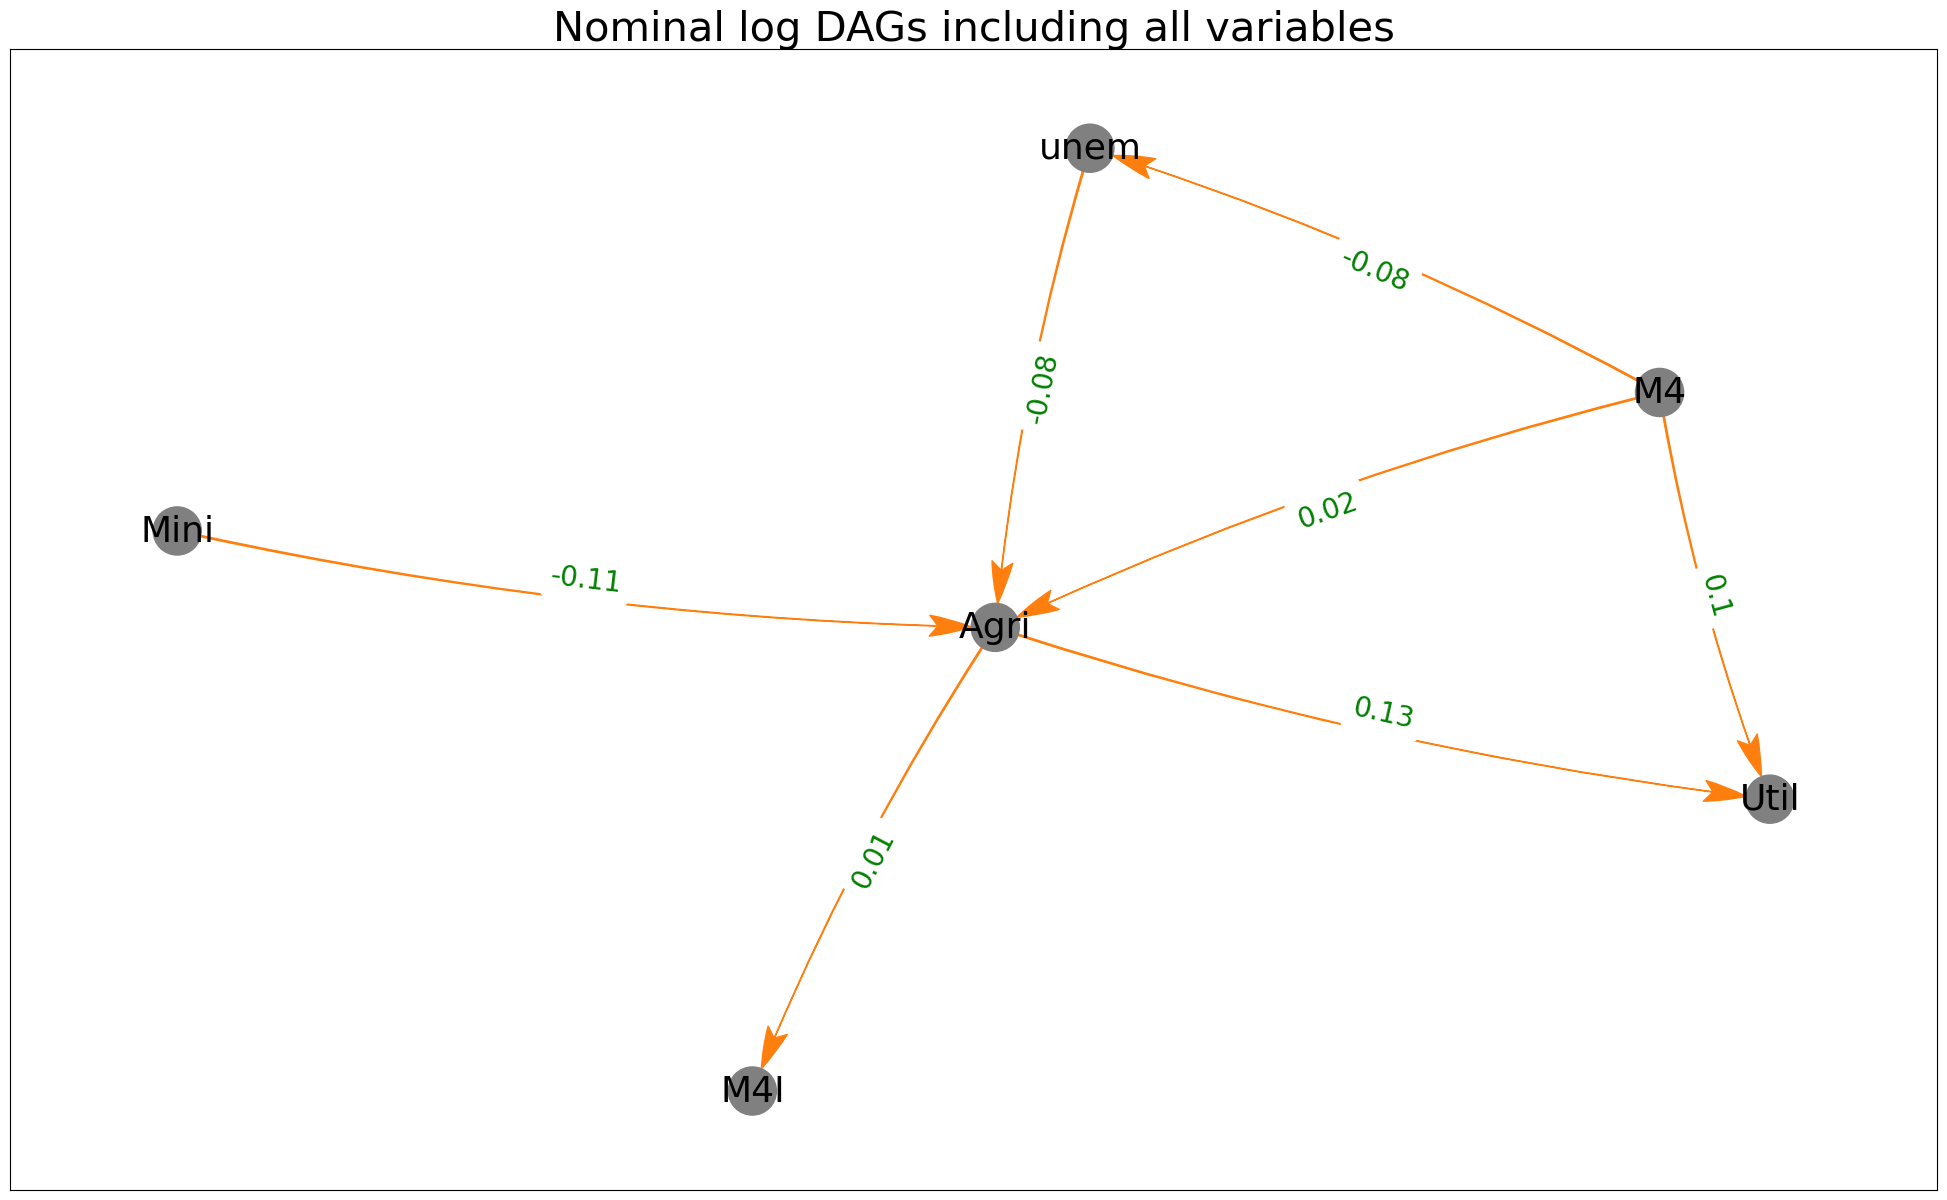

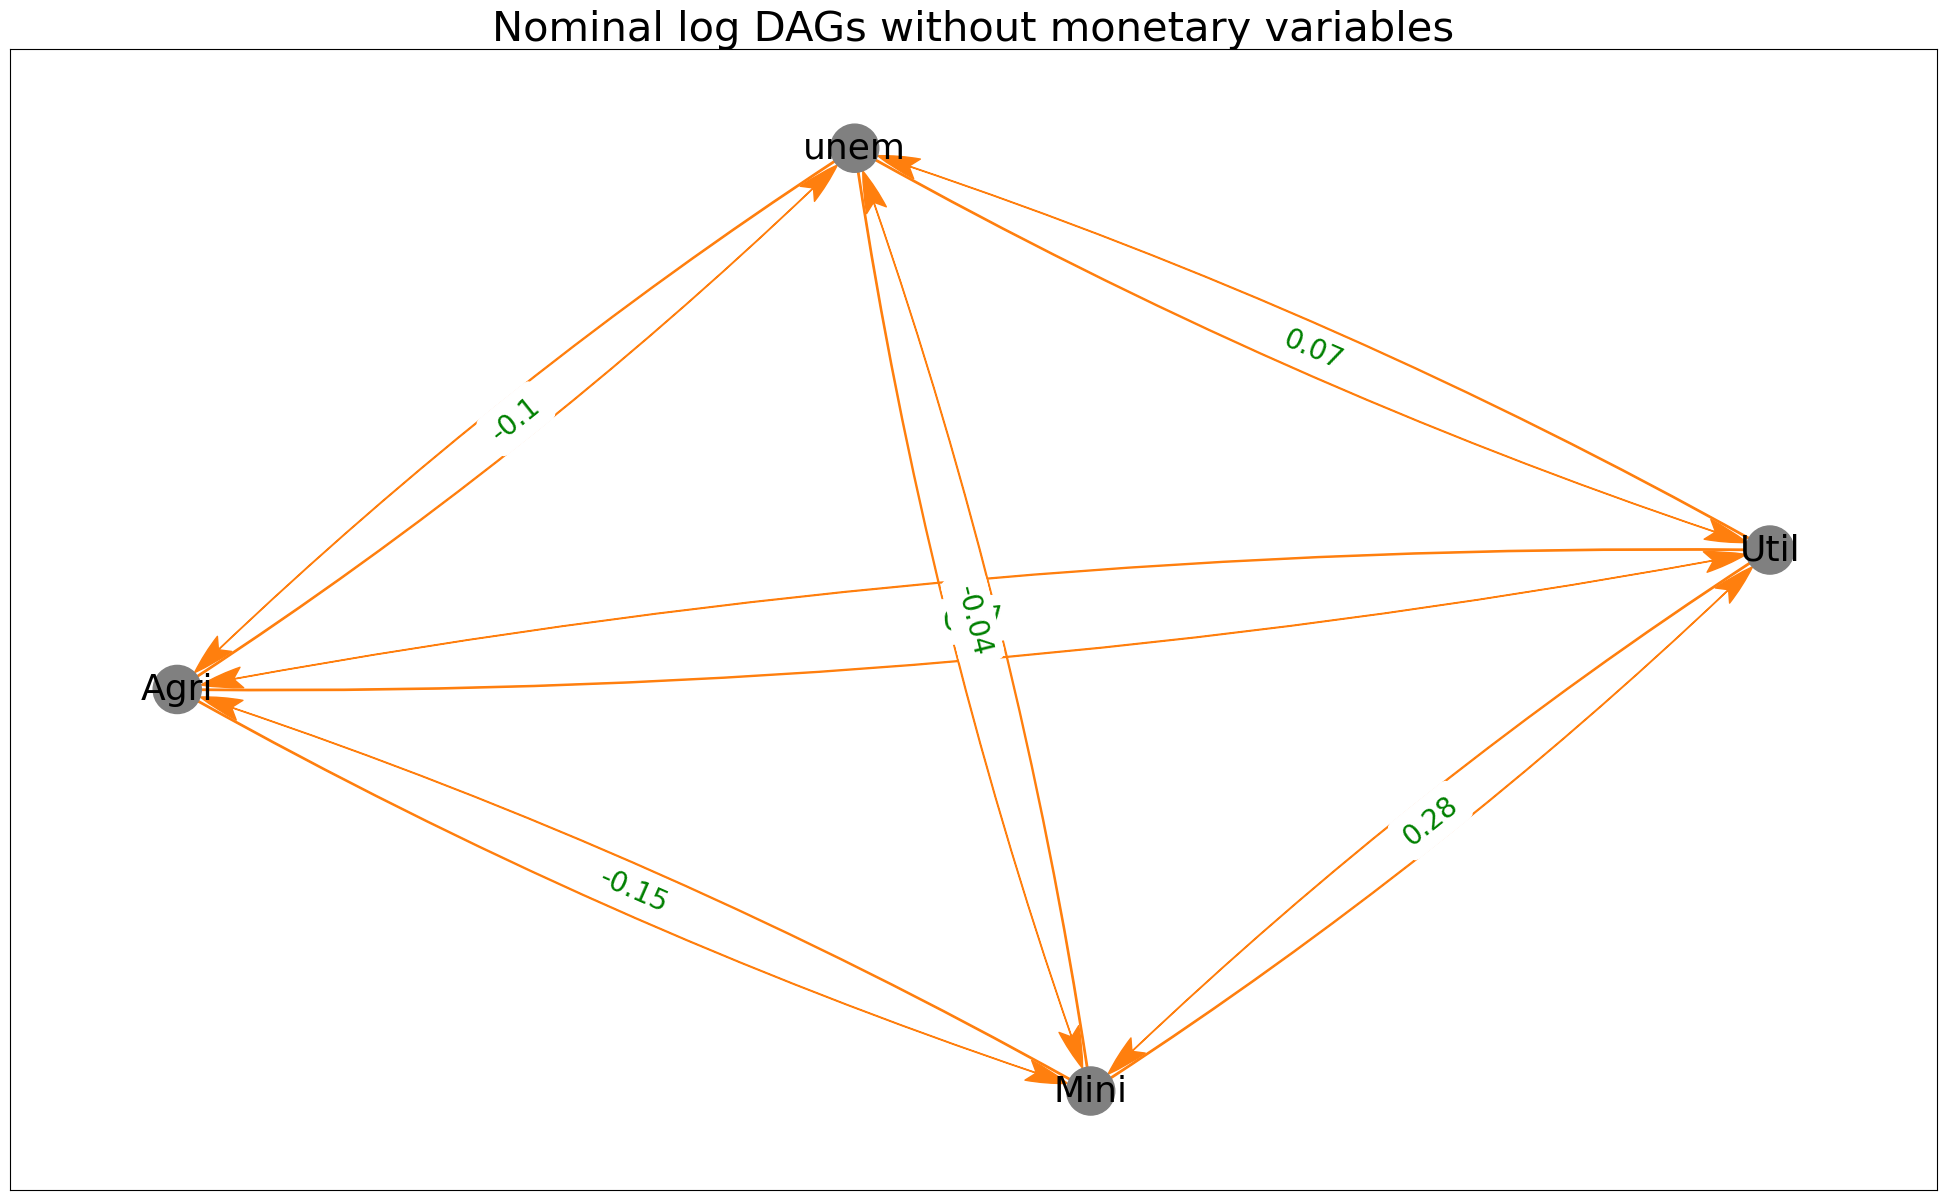

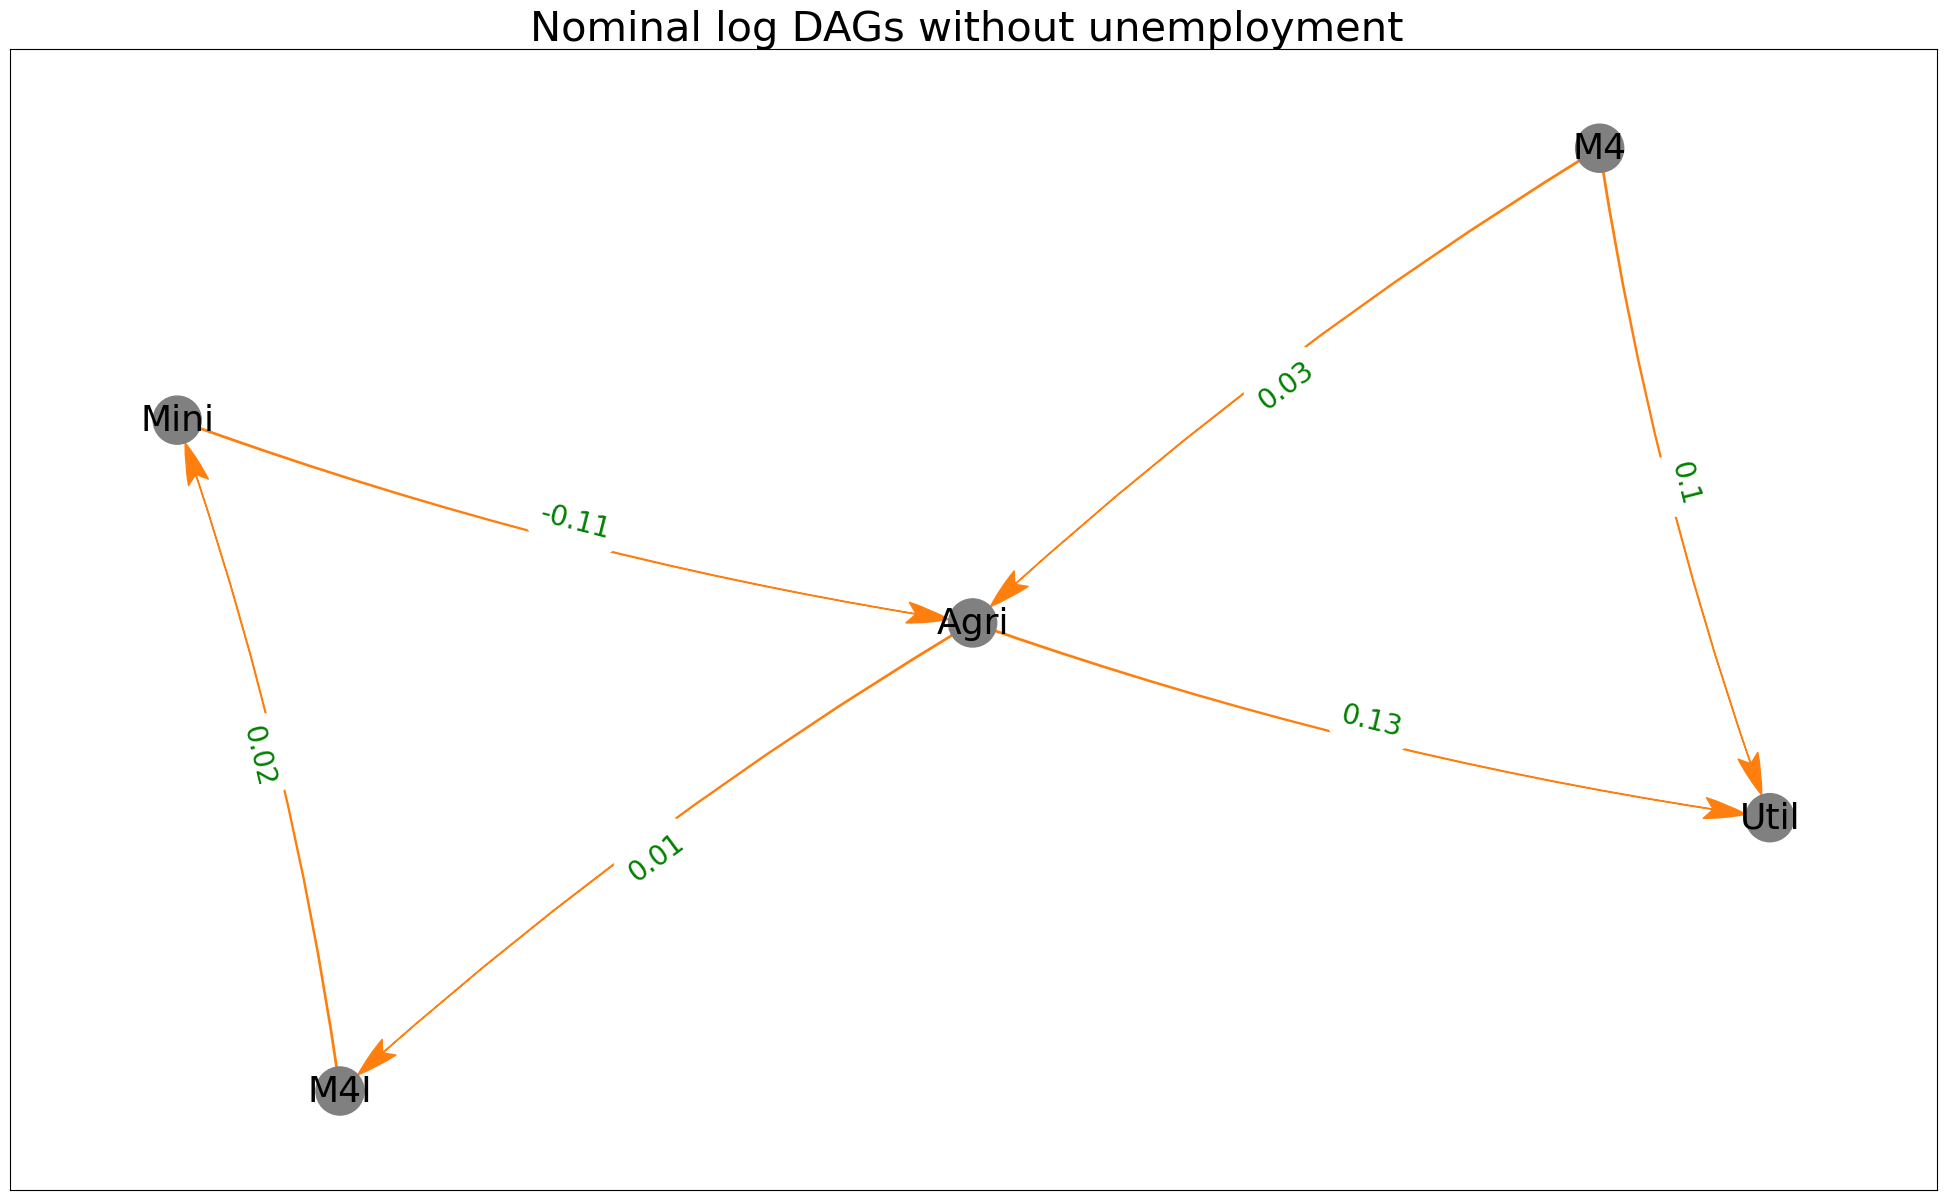

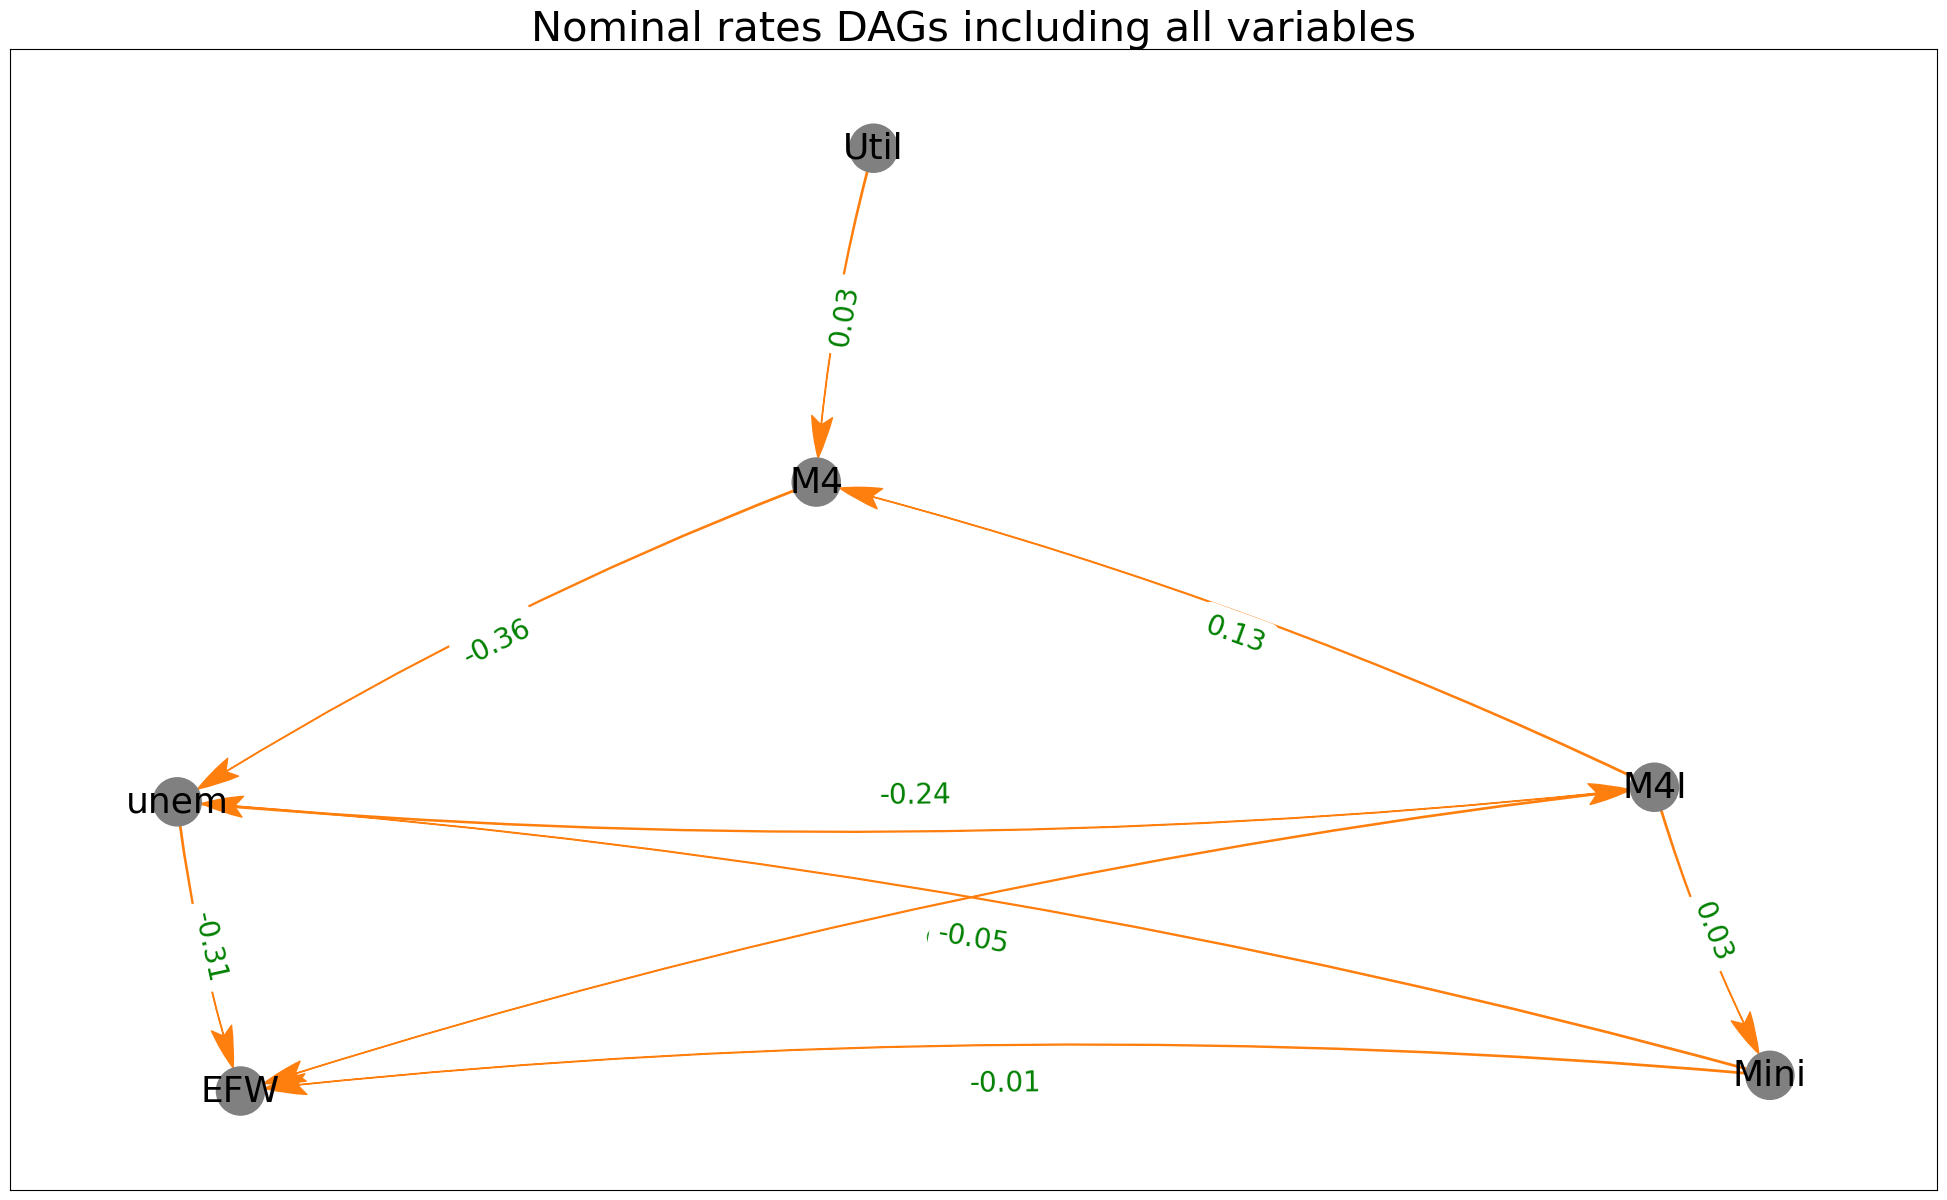

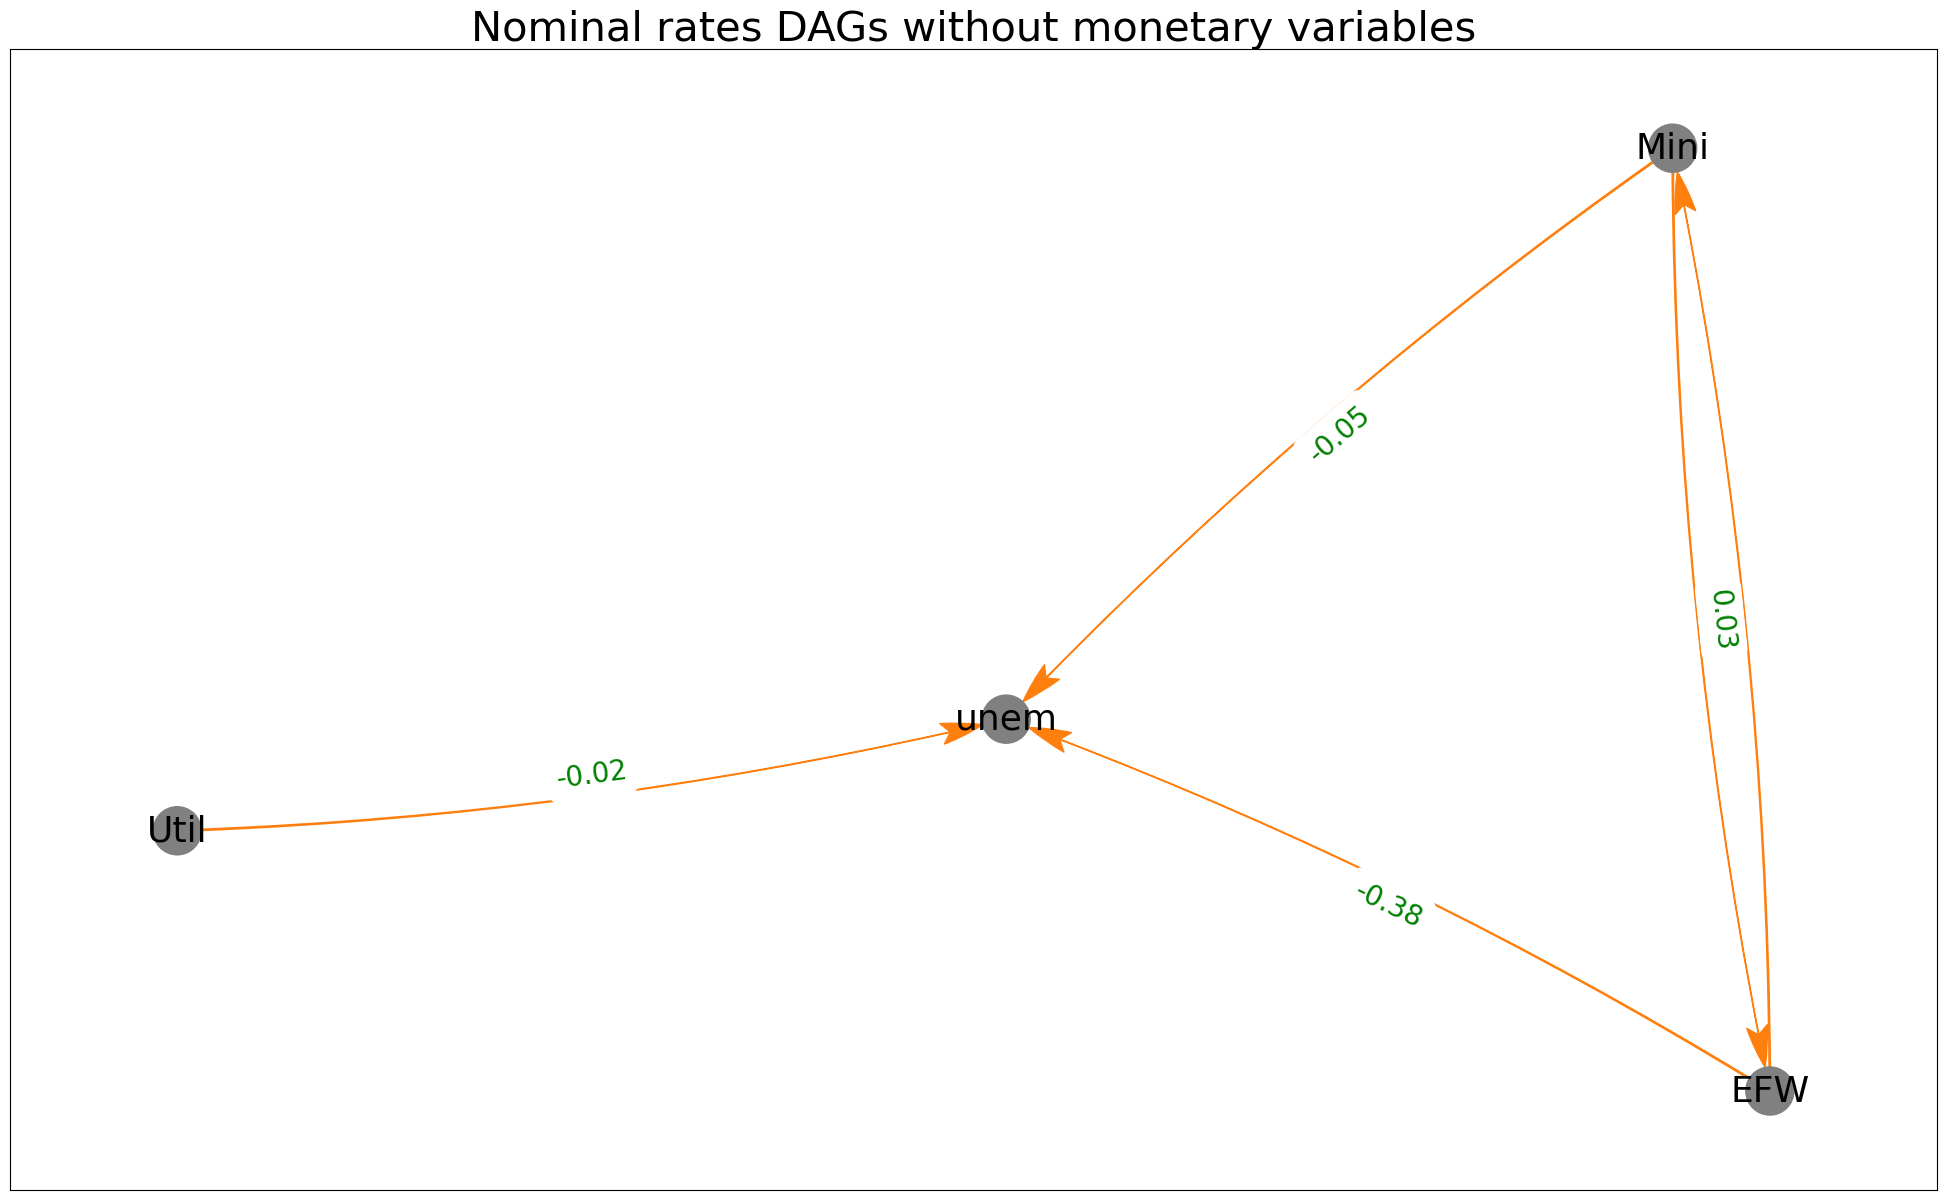

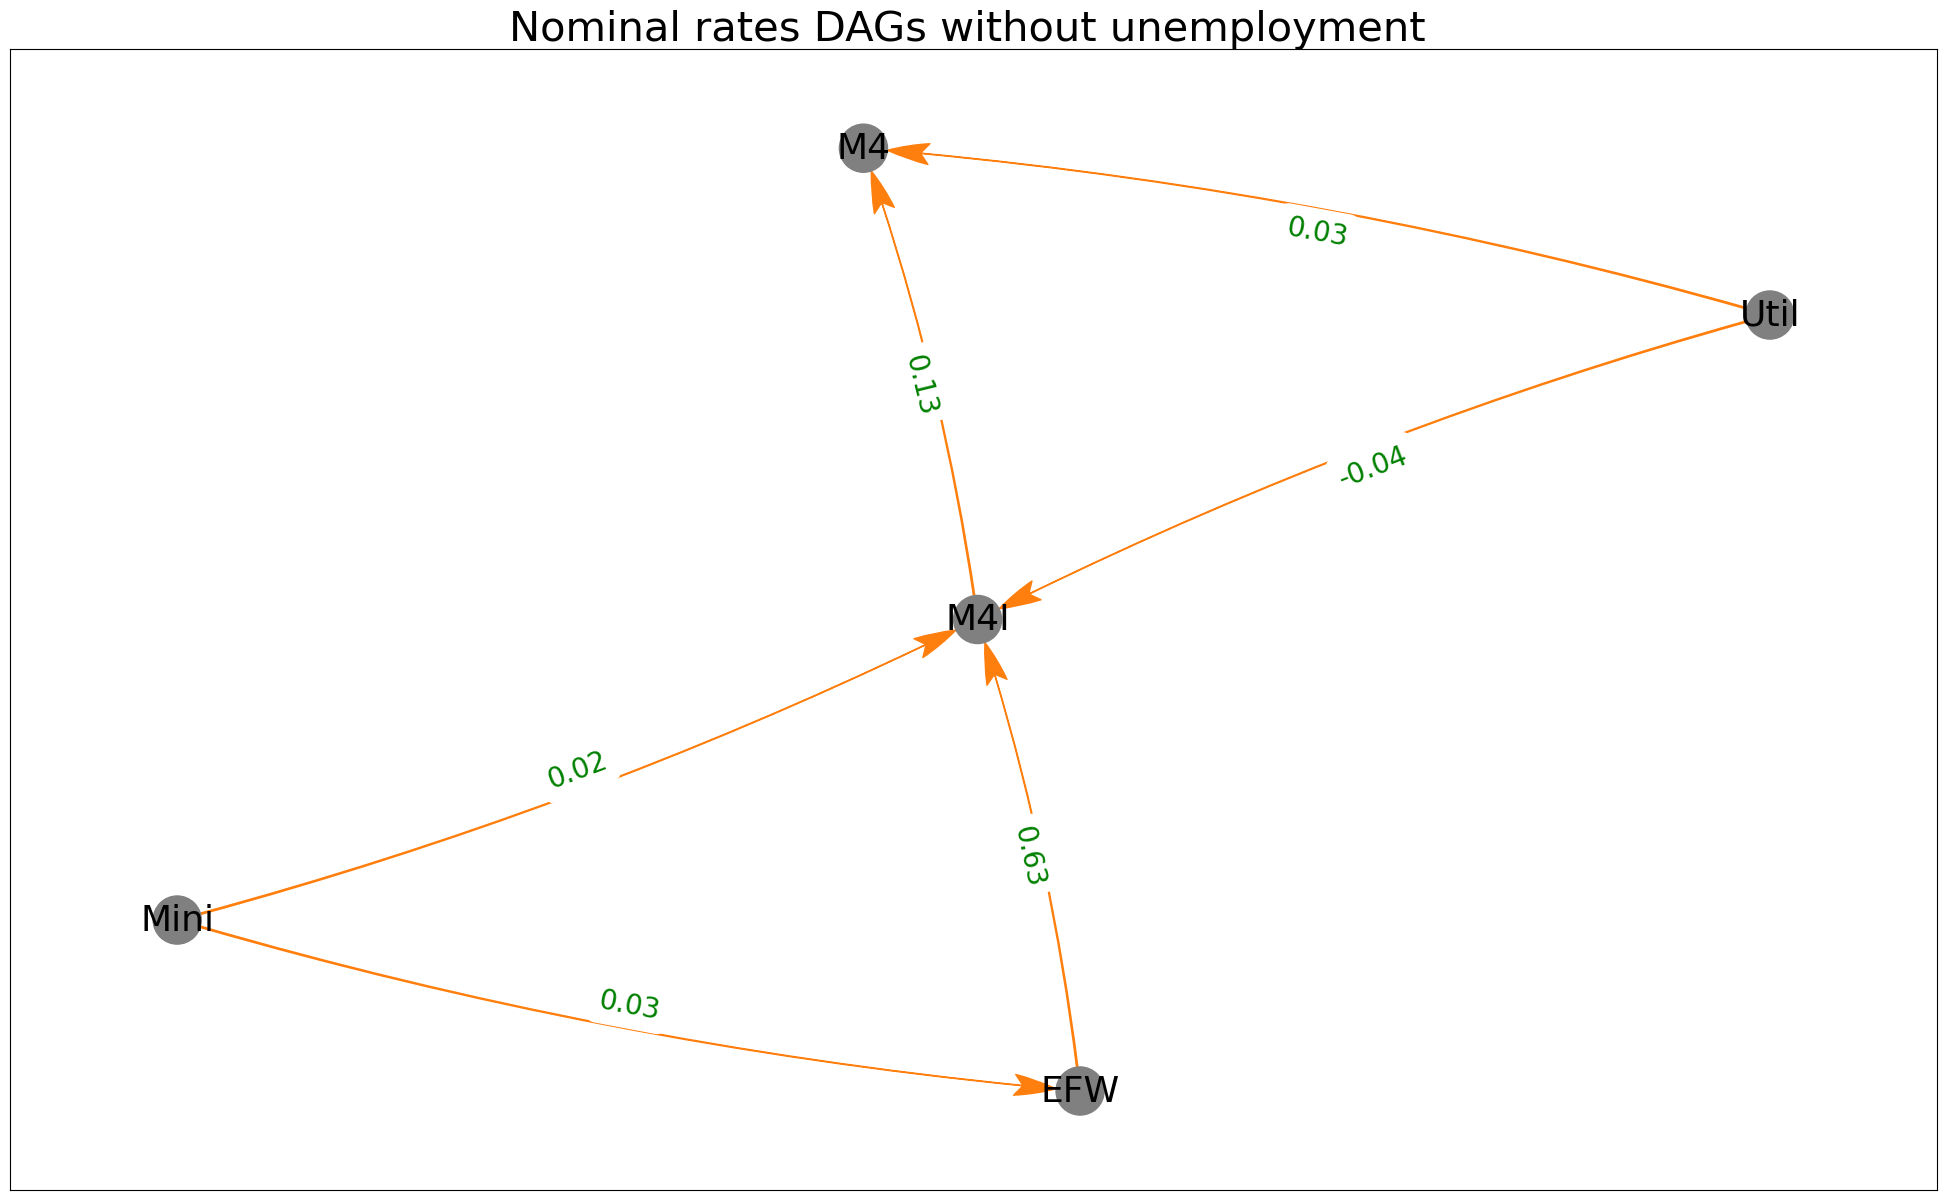

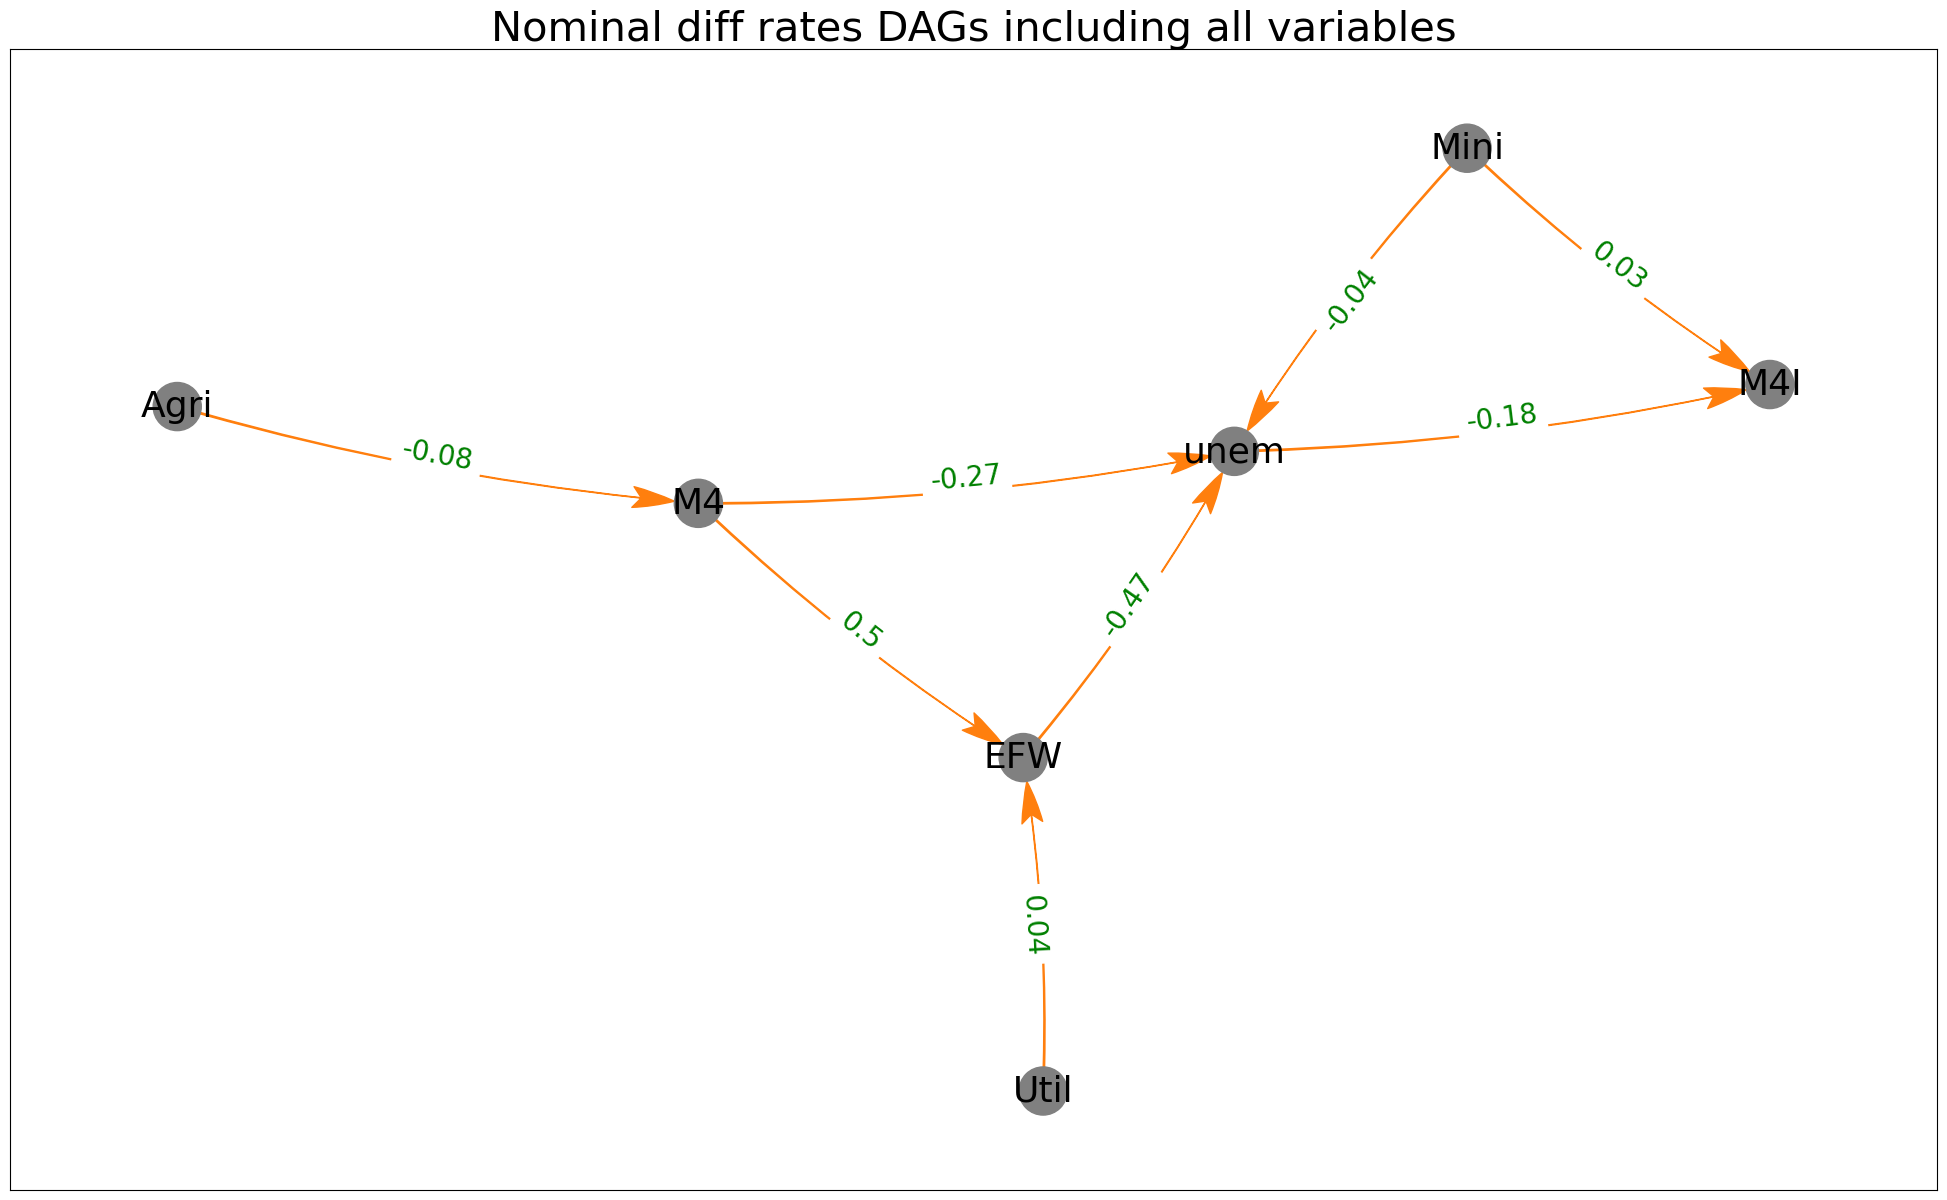

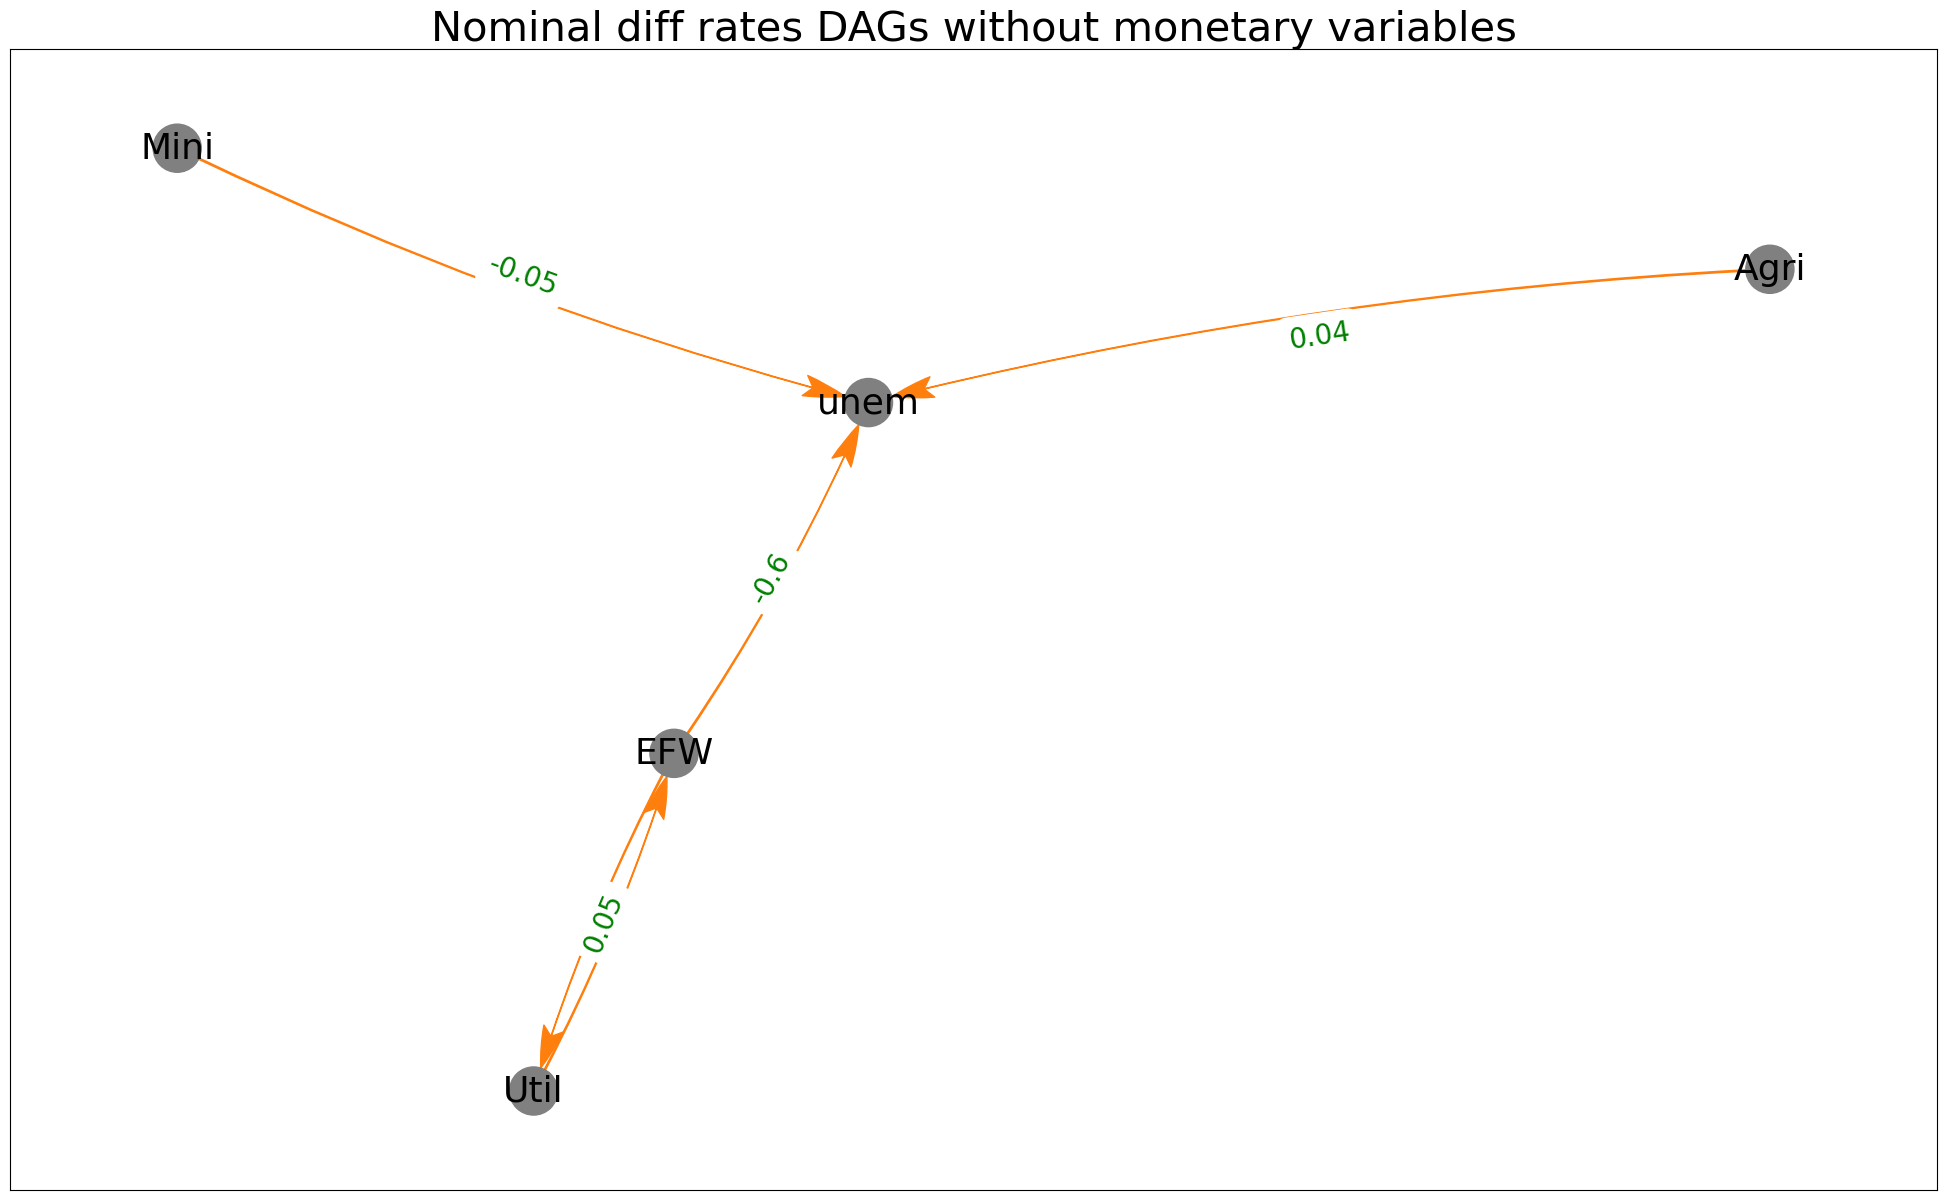

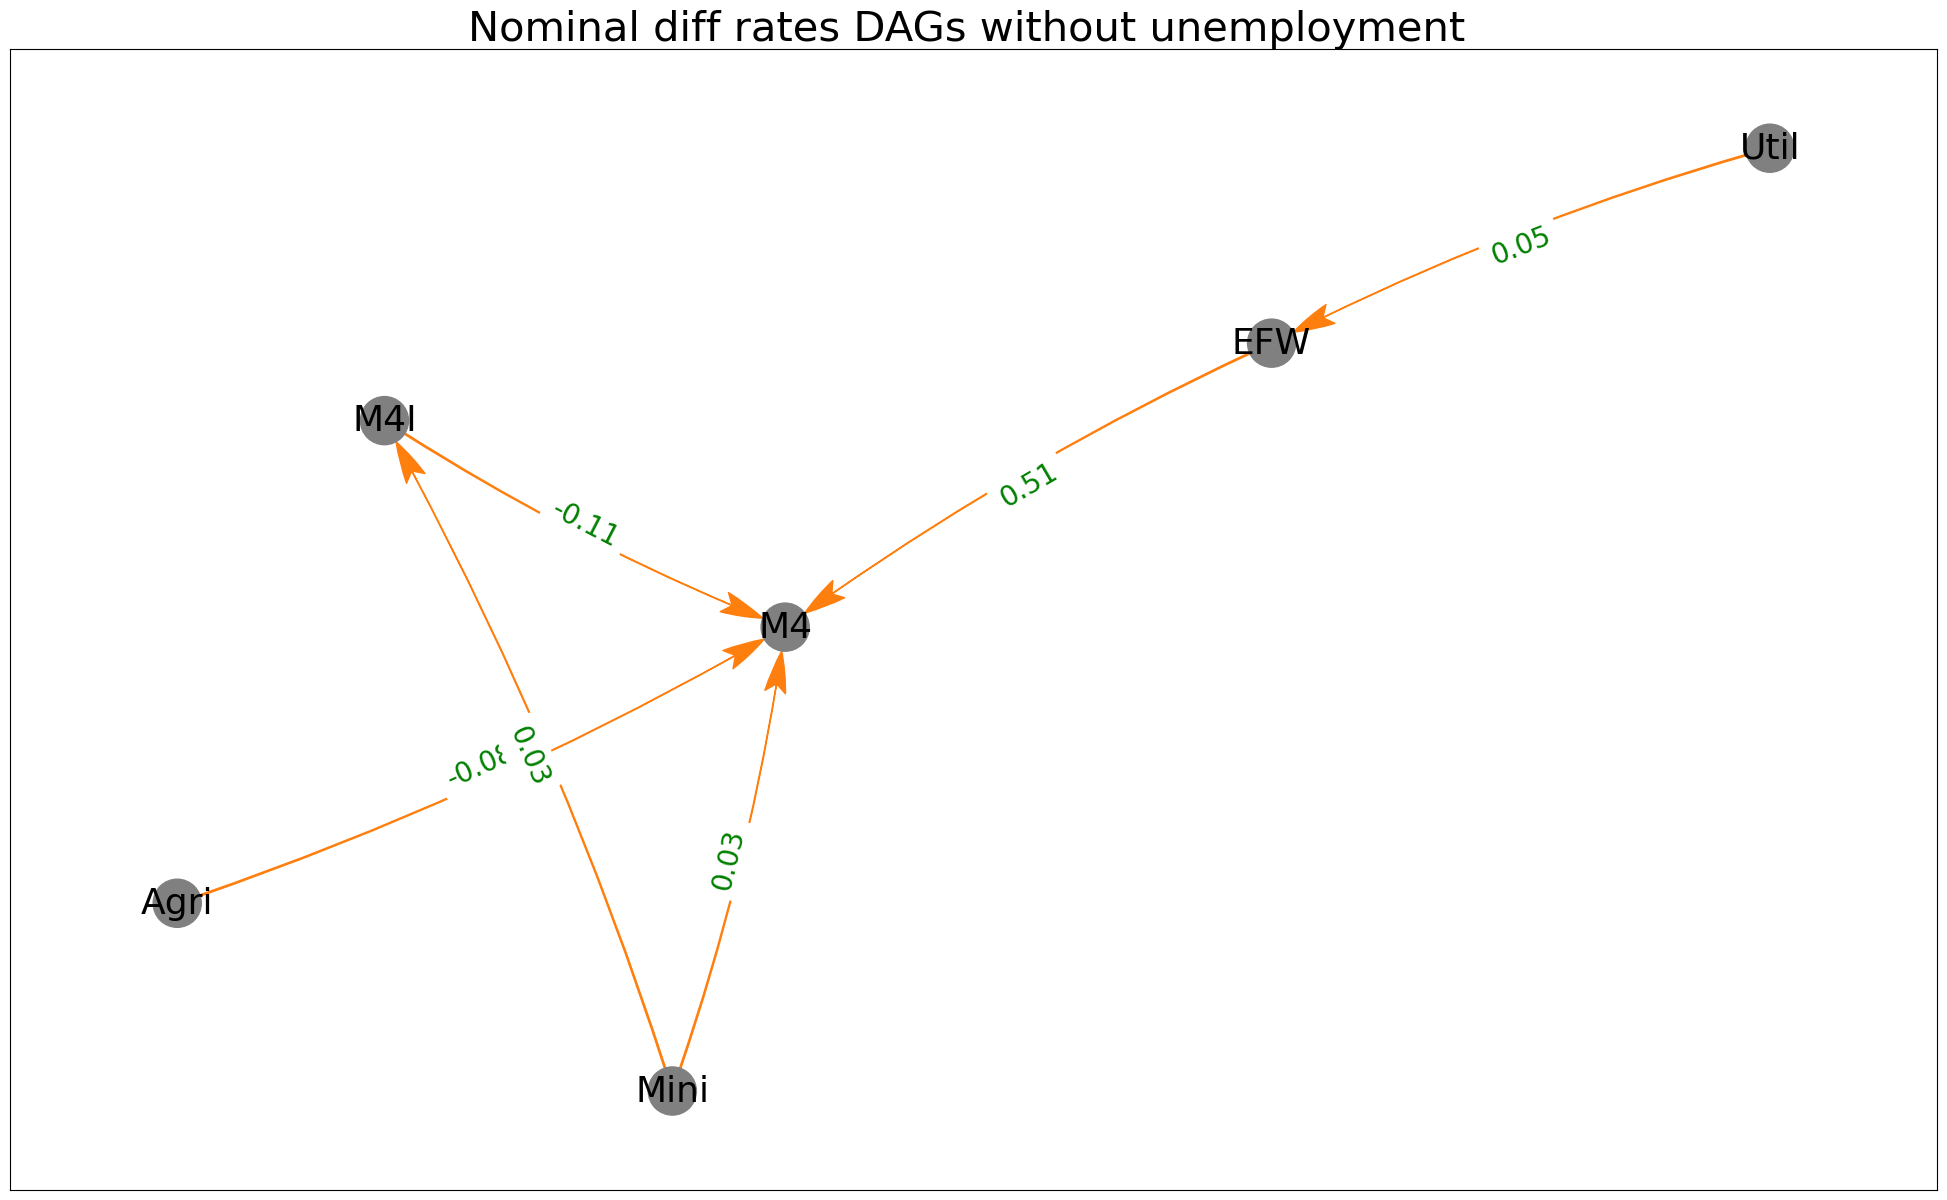

In [5]:
title = ['Nominal log DAGs including all variables',
        'Nominal log DAGs without monetary variables',
        'Nominal log DAGs without unemployment ',
        'Nominal rates DAGs including all variables',
        'Nominal rates DAGs without monetary variables',
        'Nominal rates DAGs without unemployment ',
        'Nominal diff rates DAGs including all variables',
        'Nominal diff rates DAGs without monetary variables',
        'Nominal diff rates DAGs without unemployment ']

# Plot DAGs for each dataframe
for i, key in enumerate(['Nominal log (All variables)',
                         'Nominal log (without Monetary)',
                         'Nominal log (without unem)',
                         'Nominal rates (All variables)',
                         'Nominal rates (without Monetary)',
                         'Nominal rates (without unem)',
                         'Nominal diff rates (All variables)',
                         'Nominal diff rates (without Monetary)',
                         'Nominal diff rates (without unem)']):
    plot_df = full_DAG_dict[key]
    c = PC(plot_df)
    max_cond_vars = len(plot_df.keys()) - 2
    model = c.estimate(return_type='pdag', variant='orig', significance_level=0.01,
                       max_cond_vars=max_cond_vars, ci_test='pearsonr')
    edges = model.edges

    # Plot the DAG
    graph_DAG(edges, plot_df, title=title[i])


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


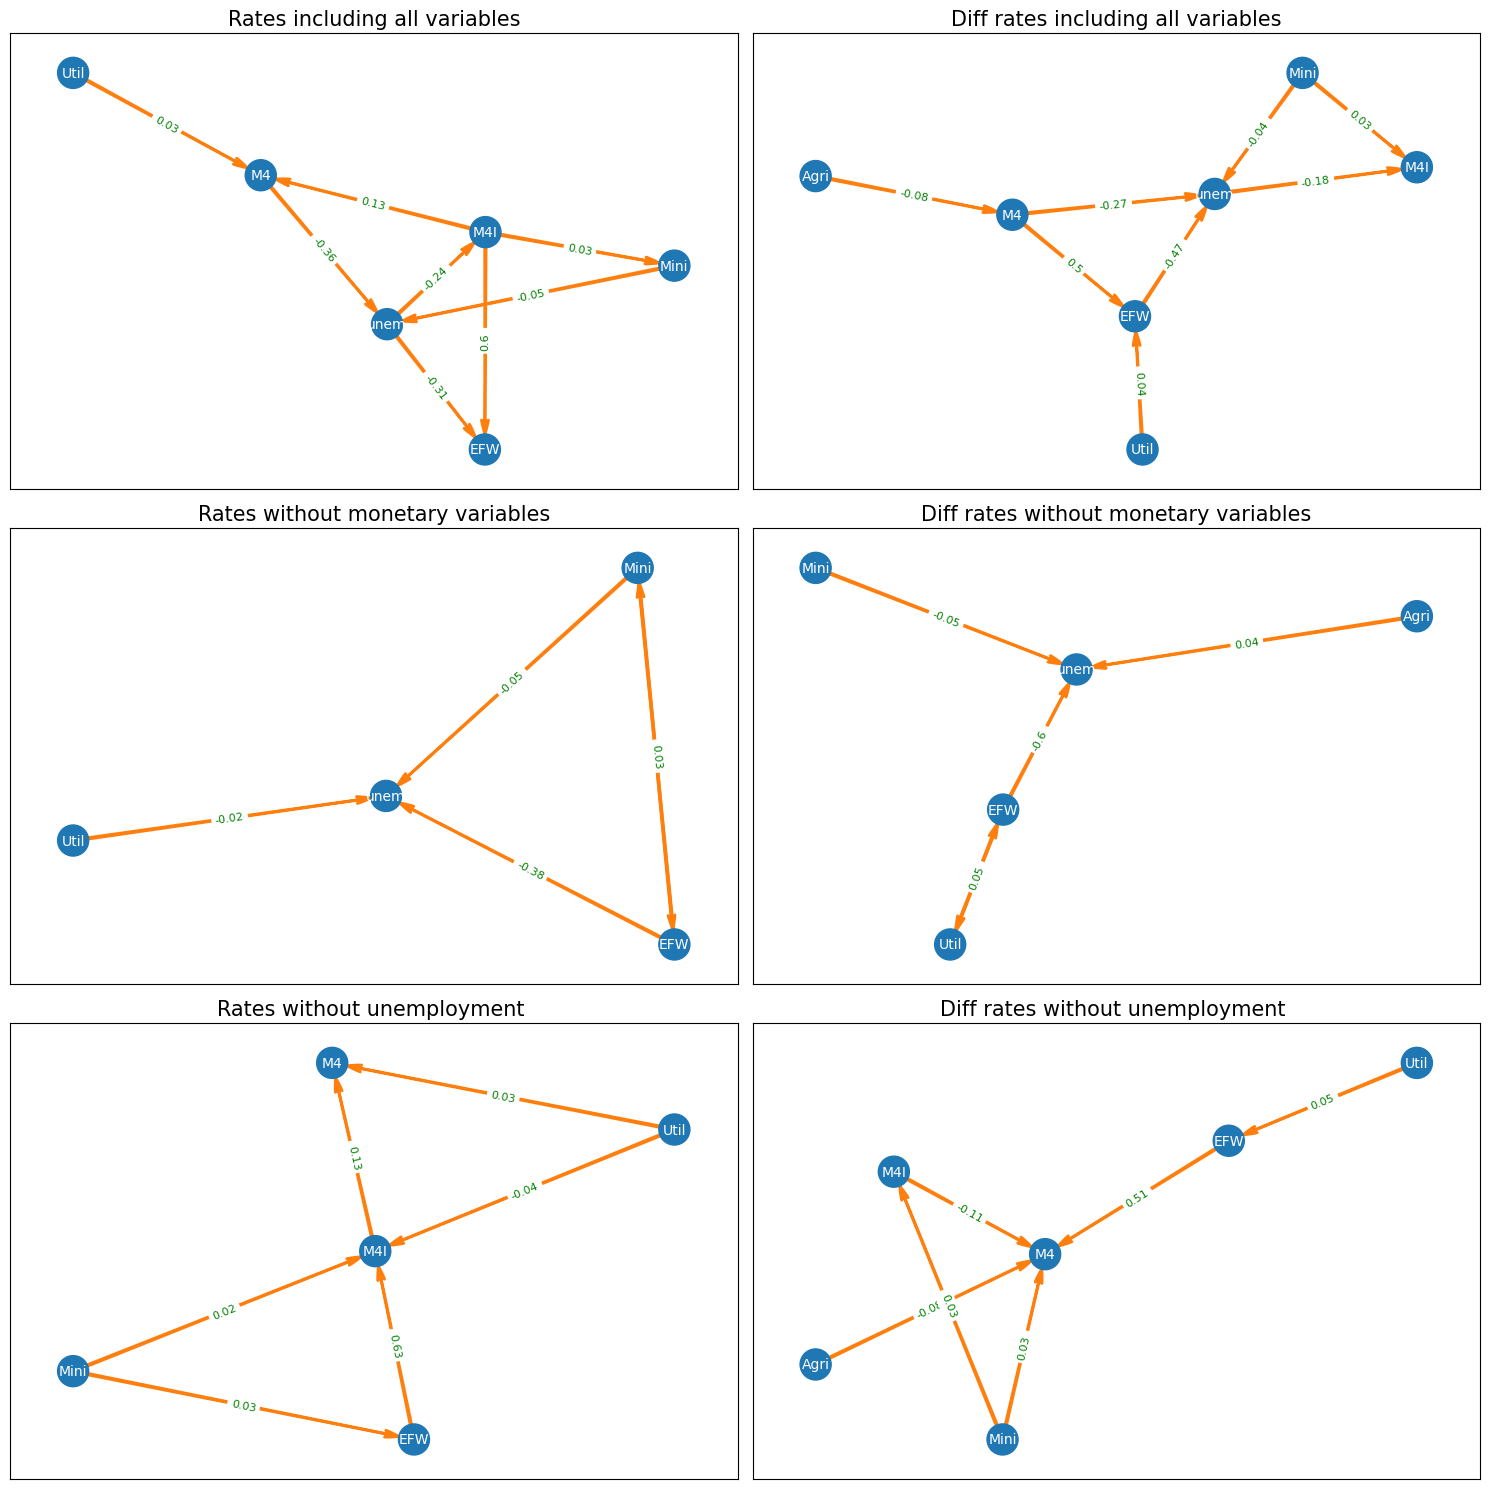

In [246]:
title = [
        'Rates including all variables',
        'Diff rates including all variables',
        'Rates without monetary variables',
        'Diff rates without monetary variables',
        'Rates without unemployment ',        
        'Diff rates without unemployment ']

# Number of rows and columns for the subplot grid
n_rows = (len(title) + 1) // 2
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot DAGs for each dataframe
for i, key in enumerate([
                         'Nominal rates (All variables)',
                         'Nominal diff rates (All variables)',
                         'Nominal rates (without Monetary)',
                         'Nominal diff rates (without Monetary)',
                         'Nominal rates (without unem)',                        
                         'Nominal diff rates (without unem)']):
    plot_df = full_DAG_dict[key]
    c = PC(plot_df)
    max_cond_vars = len(plot_df.keys()) - 2
    model = c.estimate(return_type='pdag', variant='orig', significance_level=0.01,
                       max_cond_vars=max_cond_vars, ci_test='pearsonr')
    edges = model.edges

    # Plot the DAG
    ax=axes[i]
    graph_DAG(edges, plot_df, title=title[i], ax=ax)
    
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save the figure as a picture
plt.savefig('dags_grid.png', dpi=300, bbox_inches='tight')

Import dataframes for and fit the models (WLS and PooledOLS)

In [6]:
full_df_rates_cluster = pd.read_csv('full_df_rates_cluster.csv')
full_df_rates_cluster.drop(columns=['Unnamed: 0'], inplace=True)

full_df_diff_cluster = pd.read_csv('full_df_diff_cluster.csv')
full_df_diff_cluster.drop(columns=['Unnamed: 0'], inplace=True)

full_df_log_cluster = pd.read_csv('full_df_log_cluster.csv')
full_df_log_cluster.drop(columns=['Unnamed: 0'], inplace=True)

In [260]:
from abbeyFunctions import graph_DAG_cluster, create_cluster_dags, determine_p_value

In [270]:
full_df_with_cluster = {}

full_df_with_cluster['Rates'] = full_df_rates_cluster.dropna().set_index(['FIPS', 'TimePeriod'])
full_df_with_cluster['Diff rates'] = full_df_diff_cluster.dropna().set_index(['FIPS', 'TimePeriod'])

In [271]:
# List of dataframes
dataframes = list(full_df_with_cluster.values())

# List of p-values for each dataframe
p_values_list = [0.1, 0.05, 0.01, 0.001]

# Define names for the output files based on dataframes
output_names = [f'clusters_b{i+1}' for i in range(len(dataframes))]

In [272]:
from matplotlib.backends.backend_pdf import PdfPages

In [286]:
def graph_DAG_cluster(edges, df, title="", algorithm="parallel", ax=None, sig_vals=[0.05, 0.01, 0.001], pp=None):
    graph = nx.DiGraph()

    def build_edge_labels(edges, df, sig_vals):
        edge_labels = {}
        for edge in edges:
            controls = [key for key in df.keys() if key not in edge]
            controls = list(set(controls))
            keep_controls = []
            for control in controls:
                control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
                if (control, edge[1]) in control_edges:
                    keep_controls.append(control)

            pcorr = df.partial_corr(x=edge[0], y=edge[1], covar=keep_controls, method="pearson")
            label = str(round(pcorr["r"][0], 2))
            pvalue = pcorr["p-val"][0]

            for sig_val in sig_vals:
                if pvalue < sig_val:
                    label = label + "*"

            edge_labels[edge] = label
        return edge_labels

    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 12))

    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    graph.nodes()
    plt.tight_layout()
    pos = graphviz_layout(graph, prog='neato')

    edge_labels = build_edge_labels(edges, df, sig_vals=sig_vals)

    edge_labels2 = []
    for u, v, d in graph.edges(data=True):
        if pos[u][0] > pos[v][0]:
            if (v, u) in edge_labels.keys():
                edge_labels2.append(((u, v,), f'{edge_labels[u, v]}\n\n\n{edge_labels[(v, u)]}'))
        if (v, u) not in edge_labels.keys():
            edge_labels2.append(((u, v,), f'{edge_labels[(u, v)]}'))
    edge_labels = dict(edge_labels2)

    nx.draw_networkx(graph, pos, node_color=color_map, node_size=1200,
                     with_labels=True, arrows=True,
                     font_color="white",
                     font_size=10, alpha=1,
                     width=2, edge_color="C1",
                     arrowstyle="Fancy, head_length=2, head_width=1.5, tail_width=.1",
                     ax=ax)
    nx.draw_networkx_edge_labels(graph,
                                 pos=pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=8,
                                 ax=ax)

    # Add title to the DAG
    ax.set_title(title)

    # Save to PDF if a PdfPages object is provided
    if pp:
        pp.savefig(ax.figure, bbox_inches='tight')

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

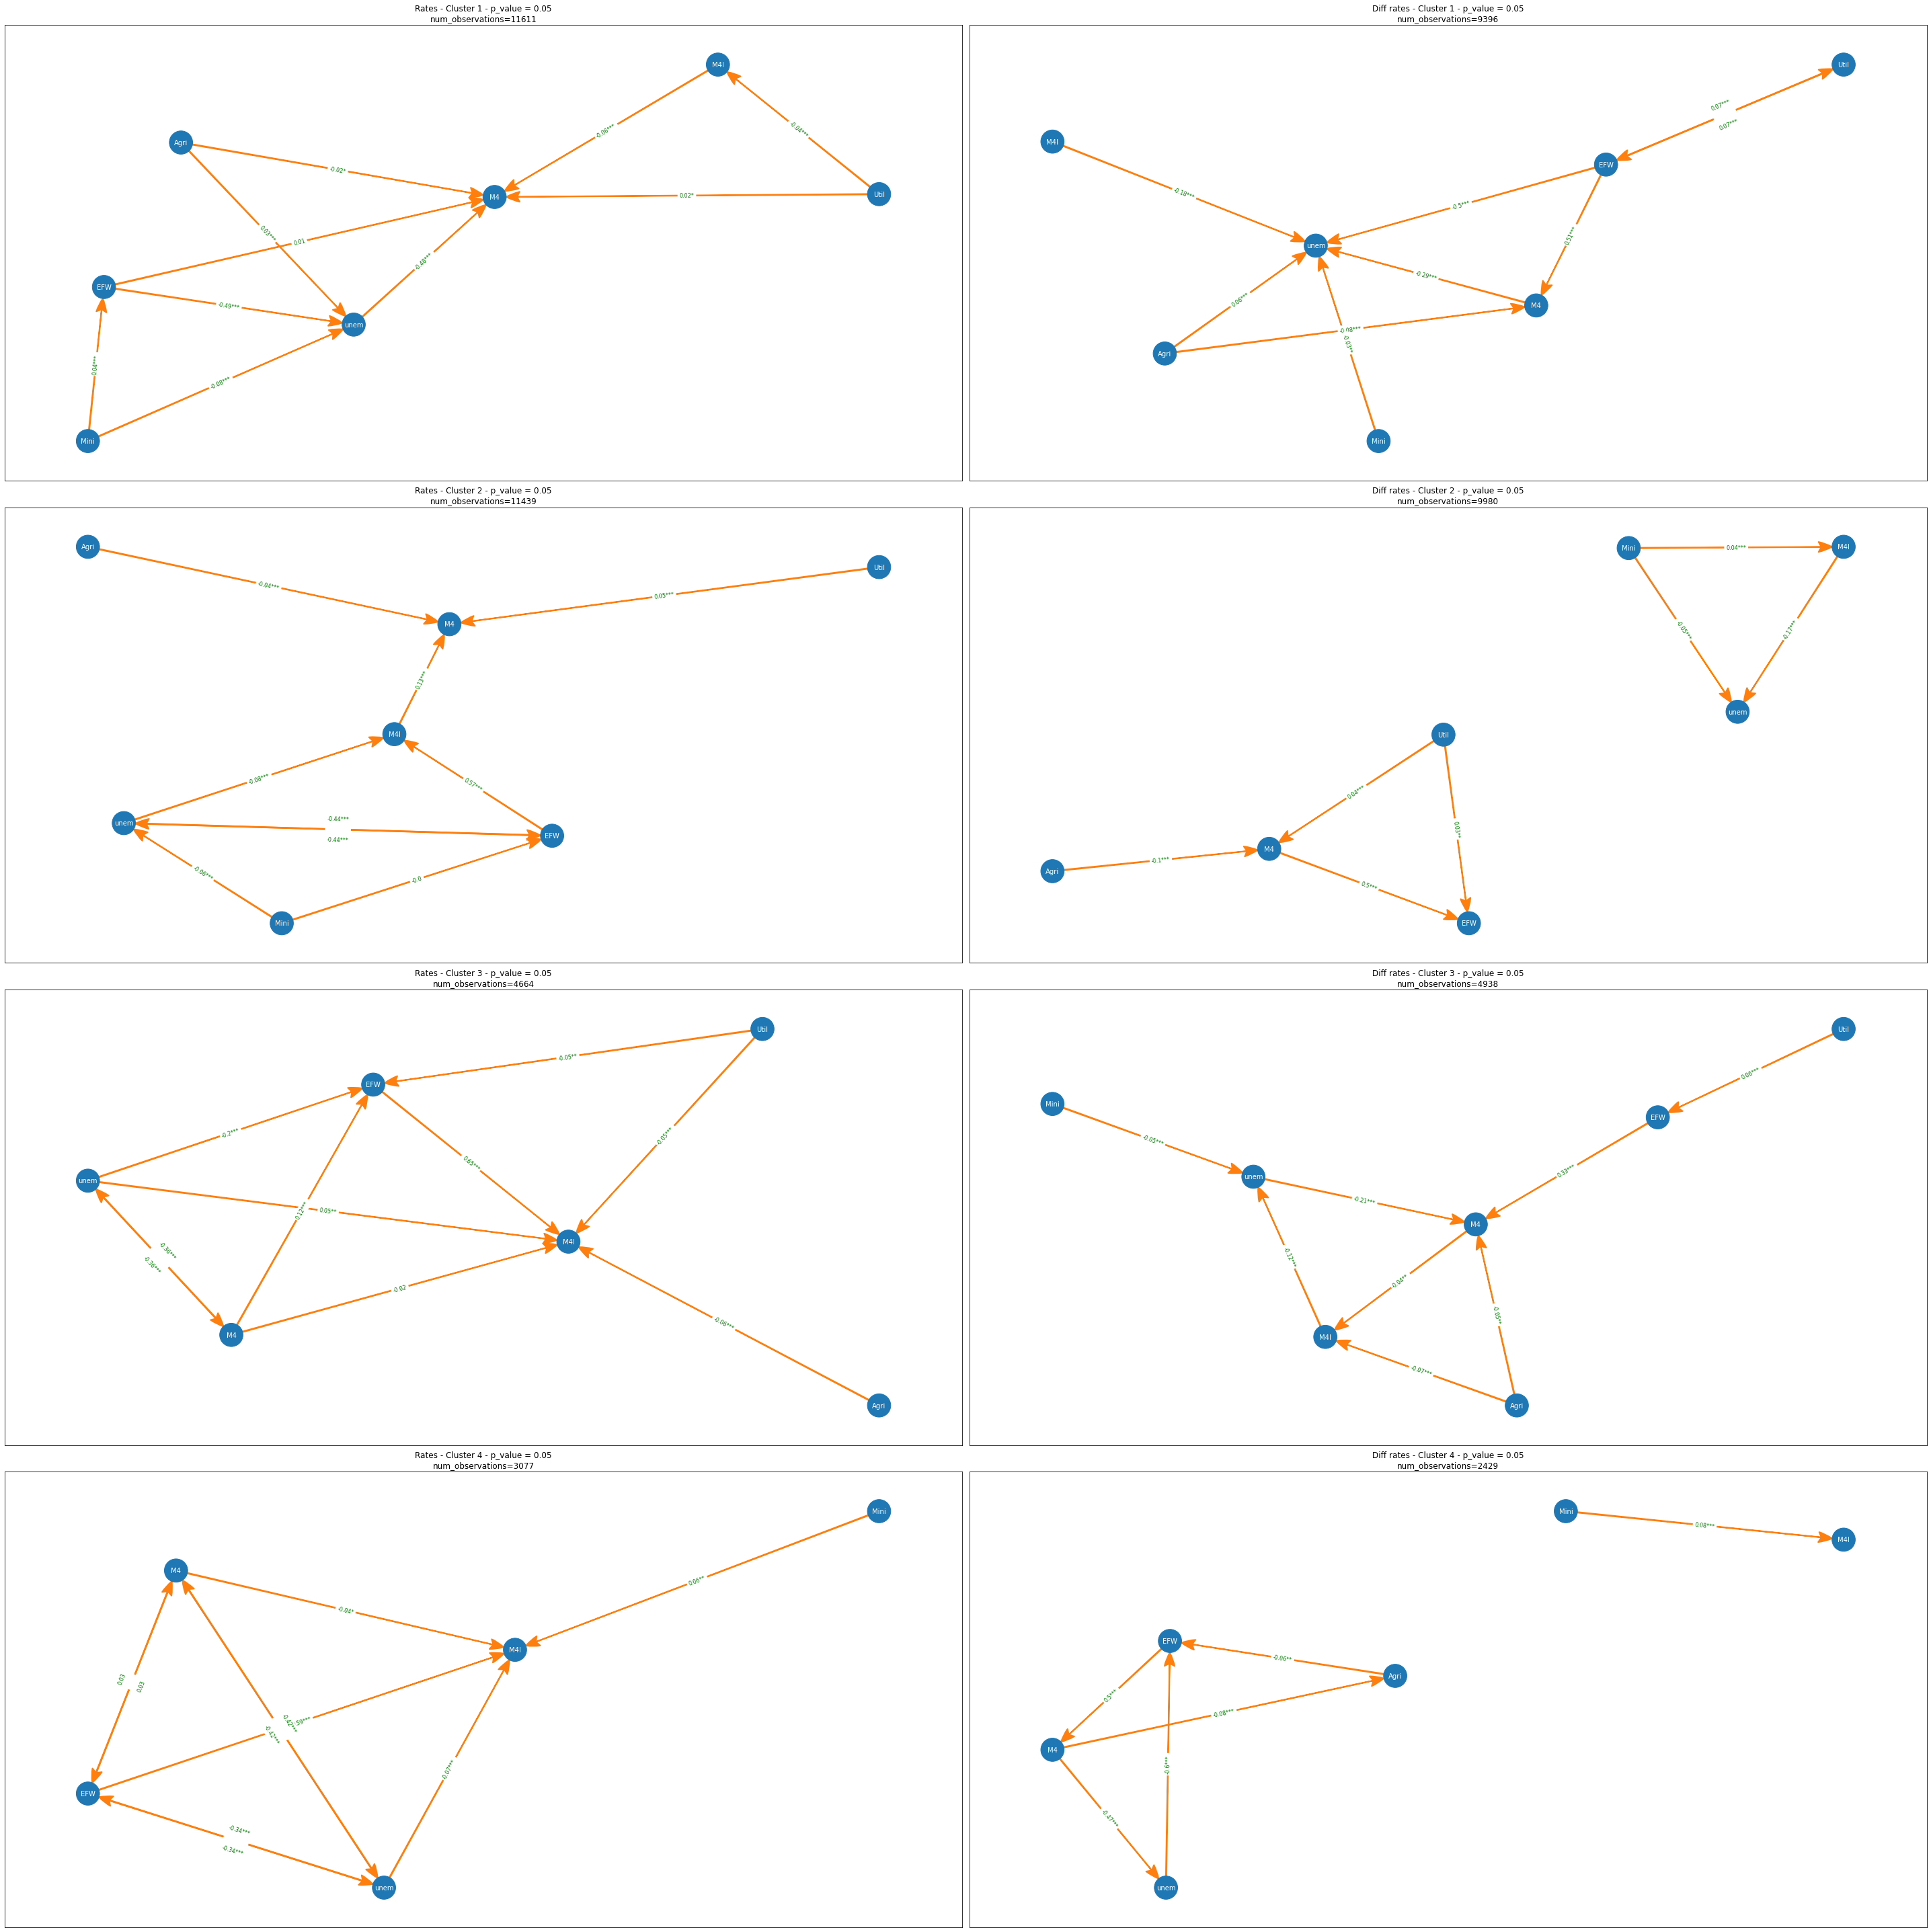

In [287]:
# Specify the absolute path for the output PDF file
pdf_file_path = f"DAGOutputs_{len(dataframes)}_dataframes.pdf"
pp = PdfPages(pdf_file_path)

# Grid for the subplots
fig, axes = plt.subplots(4, len(dataframes), figsize=(20*len(dataframes), 40))

# Different PC algorithms to test
algorithms = ["orig"]

dataframe_names = {
    "Dataframe 1": "Rates",
    "Dataframe 2": "Diff rates"
}

# Iterate over each dataframe
for idx, dataframe in enumerate(dataframes):
    # Get clustered dataframes for the current dataframe
    clustered_dfs = create_cluster_dags(dataframe)

    # Iterate over clustered dataframes and determine p-values dynamically
    for cluster_idx, cluster_df in enumerate(clustered_dfs):
        n = cluster_df.shape[0]  # Number of observations for the current cluster
        p_value = determine_p_value(n)

        # Iterate over different PC algorithms
        for algorithm in algorithms:
            c = PC(cluster_df)
            model = c.estimate(return_type='pdag', variant=algorithm, significance_level=p_value, ci_test='pearsonr')
            edges = model.edges

            graph_DAG_cluster(edges, cluster_df, title=f'{dataframe_names["Dataframe "+str(idx+1)]} - Cluster {cluster_idx + 1} - p_value = {p_value}\nnum_observations={n}'
                      , algorithm=algorithm, ax=axes[cluster_idx, idx], pp=pp)

# Save the figure to the PDF
# pp.savefig(fig, bbox_inches='tight')

plt.tight_layout()

plt.savefig('dags_clusters.png', dpi=300, bbox_inches='tight')

pp.close()

Here we use a function to fit the models and compare their results side by side.

In [7]:
# Convert boolean columns to integer columns
def convert_bool_to_int(df):
    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(int)
    return df

data_cluster_dict = {
    'Nominal rates with clusters': convert_bool_to_int(pd.get_dummies(full_df_rates_cluster, columns=['clusters'], drop_first=True)),
    'Nominal diff rates with clusters': convert_bool_to_int(pd.get_dummies(full_df_diff_cluster, columns=['clusters'], drop_first=True)),
    'Nominal log with clusters': convert_bool_to_int(pd.get_dummies(full_df_log_cluster, columns=['clusters'], drop_first=True))
}


In [8]:
result_df = analyze_wls_pooled_models(data_cluster_dict, 
                                      dependent_var='unem', 
                                      k=5, shuffle=True, random_state=42, check_rank=False)

# Display the result DataFrame
# print("\nResult DataFrame:")
display(result_df)


Nominal rates with clusters - True - WLS  \
const                                        25.691615   
Agri                                         -0.082801   
Mini                                          0.058230   
Util                                         -0.279678   
M4                                           -9.527156   
M4I                                          -6.435295   
EFW                                          -2.337628   
clusters_2.0                                 -1.148585   
clusters_3.0                                 -2.375014   
clusters_4.0                                  2.834840   
$R^2$                                         0.601775   
Avg MSE                                       3.394843   
MSE Fold 1                                    3.417207   
MSE Fold 2                                    3.318913   
MSE Fold 3                                    3.460527   
MSE Fold 4                                    3.218074   
MSE Fold 5                                    3.559495   

              Nominal rates with clusters - True - PooledOLS  \
const                                              35.029054   
Agri                                                0.011452   
Mini                                               -0.177923   
Util                                                0.008524   
M4                                                -16.654752   
M4I                                               -17.062670   
EFW                                                -3.342138   
clusters_2.0                                       -1.673946   
clusters_3.0                                       -3.140173   
clusters_4.0                                        2.692616   
$R^2$                                               0.593580   
Avg MSE                                             2.922428   
MSE Fold 1                                          3.417207   
MSE Fold 2                                          3.318913   
MSE Fold 3                                          3.460527   
MSE Fold 4                                          3.218074   
MSE Fold 5                                          3.559495   

              Nominal rates with clusters - False - WLS  \
const                                         20.071526   
Agri                                          -0.181409   
Mini                                          -0.218307   
Util                                          -0.136971   
M4                                           -10.387036   
M4I                                            0.680408   
EFW                                           -1.810157   
clusters_2.0                                        NaN   
clusters_3.0                                        NaN   
clusters_4.0                                        NaN   
$R^2$                                          0.119062   
Avg MSE                                        7.424717   
MSE Fold 1                                     7.505098   
MSE Fold 2                                     7.193835   
MSE Fold 3                                     7.378567   
MSE Fold 4                                     7.192598   
MSE Fold 5                                     7.853489   

              Nominal rates with clusters - False - PooledOLS  \
const                                               45.242405   
Agri                                                -0.018246   
Mini                                                -0.236142   
Util                                                -0.089520   
M4                                                 -16.287801   
M4I                                                 -2.181111   
EFW                                                 -4.720290   
clusters_2.0                                              NaN   
clusters_3.0                                              NaN   
clusters_4.0                                              NaN   
$R^2$                                 

In [9]:
# Compare regressions without using k-fold

result_df = wls_pooled_model_analysis(data_cluster_dict, dependent_var='unem', random_state=42, check_rank=True)
display(result_df)


Nominal rates with clusters - True - WLS  \
const                                        26.212508   
Agri                                         -0.087723   
Mini                                          0.054880   
Util                                         -0.284203   
M4                                           -9.542041   
M4I                                          -6.775937   
EFW                                          -2.404065   
clusters_2.0                                 -1.152076   
clusters_3.0                                 -2.334427   
clusters_4.0                                  2.857332   
$R^2$                                         0.583717   

              Nominal rates with clusters - True - PooledOLS  \
const                                              35.466592   
Agri                                                0.022109   
Mini                                               -0.182294   
Util                                                0.008667   
M4                                                -16.732653   
M4I                                               -16.506905   
EFW                                                -3.395469   
clusters_2.0                                       -1.678883   
clusters_3.0                                       -3.129976   
clusters_4.0                                        2.726683   
$R^2$                                               0.594291   

              Nominal rates with clusters - False - WLS  \
const                                         20.222825   
Agri                                          -0.185562   
Mini                                          -0.219240   
Util                                          -0.144792   
M4                                           -10.395132   
M4I                                            0.635662   
EFW                                           -1.829023   
clusters_2.0                                        NaN   
clusters_3.0                                        NaN   
clusters_4.0                                        NaN   
$R^2$                                          0.121913   

              Nominal rates with clusters - False - PooledOLS  \
const                                               45.895798   
Agri                                                -0.008836   
Mini                                                -0.240452   
Util                                                -0.078380   
M4                                                 -16.318828   
M4I                                                 -0.920441   
EFW                                                 -4.800148   
clusters_2.0                                              NaN   
clusters_3.0                                              NaN   
clusters_4.0                                              NaN   
$R^2$                                                0.228080   

              Nominal diff rates with clusters - True - WLS  \
const                                                   NaN   
Agri                                               0.199329   
Mini                                               0.012565   
Util                                              -0.101747   
M4                                                -0.426177   
M4I                                               -0.012934   
EFW                                               -3.532582   
clusters_2.0                                      -1.092908   
clusters_3.0                                      -0.114674   
clusters_4.0                                      -0.376749   
$R^2$                                              1.000000   

              Nominal diff rates with clusters - True - PooledOLS  \
const                                                       NaN     
Agri                                                   0.018846     
Mini                                                  -0.055669     
Util                     

Here we fit the regressions and report all the mse's from all the iterations

In [10]:
from abiFunctions import analyze_wls_pooled_models_all_mse

result_all = analyze_wls_pooled_models_all_mse(data_cluster_dict, dependent_var='unem', k=5, shuffle=True, random_state=42, check_rank=True, num_iterations=10)
display(result_all)


Nominal rates with clusters - True - WLS  \
const                                       25.691615   
Agri                                        -0.082801   
Mini                                         0.058230   
Util                                        -0.279678   
M4                                          -9.527156   
...                                               ...   
MSE Fold 46                                  3.417207   
MSE Fold 47                                  3.318913   
MSE Fold 48                                  3.460527   
MSE Fold 49                                  3.218074   
MSE Fold 50                                  3.559495   

             Nominal rates with clusters - True - PooledOLS  \
const                                             35.466311   
Agri                                               0.022149   
Mini                                              -0.182491   
Util                                               0.008584   
M4                                               -16.732825   
...                                                     ...   
MSE Fold 46                                        2.807117   
MSE Fold 47                                        2.787432   
MSE Fold 48                                        2.826155   
MSE Fold 49                                        2.806378   
MSE Fold 50                                        2.922428   

             Nominal rates with clusters - False - WLS  \
const                                        20.071526   
Agri                                         -0.181409   
Mini                                         -0.218307   
Util                                         -0.136971   
M4                                          -10.387036   
...                                                ...   
MSE Fold 46                                   7.505098   
MSE Fold 47                                   7.193835   
MSE Fold 48                                   7.378567   
MSE Fold 49                                   7.192598   
MSE Fold 50                                   7.853489   

             Nominal rates with clusters - False - PooledOLS  \
const                                              45.895681   
Agri                                               -0.008771   
Mini                                               -0.240568   
Util                                               -0.078498   
M4                                                -16.318785   
...                                                      ...   
MSE Fold 46                                         5.310990   
MSE Fold 47                                         5.283886   
MSE Fold 48                                         5.305034   
MSE Fold 49                                         5.407831   
MSE Fold 50                                         5.605799   

             Nominal diff rates with clusters - True - WLS  \
const                                                  NaN   
Agri                                              0.172864   
Mini                                              0.031111   
Util                                             -0.067051   
M4                                               -1.094996   
...                                                    ...   
MSE Fold 46                                       1.919634   
MSE Fold 47                                       1.421037   
MSE Fold 48                                       2.001833   
MSE Fold 49                                       1.931753   
MSE Fold 50                                       2.013379   

             Nominal diff rates with clusters - True - PooledOLS  \
const                                                      NaN     
Agri                                                  0.018842     
Mini                                                 -0.055732     
Util                                                  0.025297     
M4                  

Now we fit the regressions and report the results that have the least mse

In [11]:
from abiFunctions import analyze_wls_pooled_models_least_mse

result_least_mse = analyze_wls_pooled_models_least_mse(data_cluster_dict, dependent_var='unem', k=5, shuffle=True, random_state=42, check_rank=True, num_iterations=10)
display(result_least_mse)


Nominal rates with clusters - True - WLS  \
const                                        22.299315   
Agri                                         -0.186375   
Mini                                          0.067609   
Util                                         -0.083656   
M4                                           -9.717794   
M4I                                         -12.558940   
EFW                                          -1.886567   
clusters_2.0                                 -1.302110   
clusters_3.0                                 -2.622474   
clusters_4.0                                  2.776673   
$R^2$                                         0.601775   
Least MSE                                     3.218074   

              Nominal rates with clusters - True - PooledOLS  \
const                                              35.635534   
Agri                                                0.023675   
Mini                                               -0.193034   
Util                                                0.003537   
M4                                                -16.824249   
M4I                                               -15.636892   
EFW                                                -3.416849   
clusters_2.0                                       -1.675068   
clusters_3.0                                       -3.121945   
clusters_4.0                                        2.769345   
$R^2$                                               0.593580   
Least MSE                                           2.787432   

              Nominal rates with clusters - False - WLS  \
const                                         19.486365   
Agri                                          -0.122257   
Mini                                          -0.195689   
Util                                          -0.227714   
M4                                           -10.717898   
M4I                                           -3.872937   
EFW                                           -1.727630   
clusters_2.0                                        NaN   
clusters_3.0                                        NaN   
clusters_4.0                                        NaN   
$R^2$                                          0.119062   
Least MSE                                      7.192598   

              Nominal rates with clusters - False - PooledOLS  \
const                                               45.871512   
Agri                                                -0.012790   
Mini                                                -0.252237   
Util                                                -0.062308   
M4                                                 -16.413851   
M4I                                                 -0.623784   
EFW                                                 -4.796479   
clusters_2.0                                              NaN   
clusters_3.0                                              NaN   
clusters_4.0                                              NaN   
$R^2$                                                0.228420   
Least MSE                                            5.283886   

              Nominal diff rates with clusters - True - WLS  \
const                                                   NaN   
Agri                                              -0.059771   
Mini                                               0.030755   
Util                                              -0.027353   
M4                                                -2.212860   
M4I                                               -0.012553   
EFW                                               -5.456440   
clusters_2.0                                      -0.474203   
clusters_3.0                                      -0.113676   
clusters_4.0                                      -0.467846   
$R^2$                                              1.000000   
Least MSE                                          1.421

## Using OLS inplace of pooledOLS

In [12]:
from abiFunctions import analyze_wls_ols_models_least_mse

dependent_var = 'unem'

# Analyze models
model_attributes = analyze_wls_ols_models_least_mse(data_cluster_dict, dependent_var, k=5, 
                                             shuffle=True, random_state=42, 
                                             num_iterations=10)

# Accessing results as a list
results_list = []
for attributes in model_attributes:
    results_list.append({
        'Dataset': attributes['Dataset'],
        'Clusters': attributes['Clusters'],
        'Model': attributes['Model'],
        'Beta Estimates': attributes['Beta Estimates'].values.tolist(),
        'Least MSE': attributes['Least MSE'],
        'R^2': attributes['R^2']
    })

result_df = pd.DataFrame()
for attributes in model_attributes:
    dataset_name = attributes['Dataset']
    clusters = attributes['Clusters']
    model_name = attributes['Model']
    beta_estimates = attributes['Beta Estimates']
    least_mse = attributes['Least MSE']
    r_squared = attributes['R^2']
    mse_series = pd.Series([r_squared, least_mse], index=["$R^2$", "Least MSE"])
    combined_series = pd.concat([beta_estimates, mse_series], axis=0)
    result_df = pd.concat([result_df, combined_series], axis=1)
    result_df.rename(columns={result_df.columns[-1]: f"{dataset_name} - {clusters} - {model_name}"}, inplace=True)

result_df


Nominal rates with clusters - True - WLS  \
const                                        22.299315   
Agri                                         -0.186375   
Mini                                          0.067609   
Util                                         -0.083656   
M4                                           -9.717794   
M4I                                         -12.558940   
EFW                                          -1.886567   
clusters_2.0                                 -1.302110   
clusters_3.0                                 -2.622474   
clusters_4.0                                  2.776673   
$R^2$                                         0.601775   
Least MSE                                     3.218074   

              Nominal rates with clusters - True - OLS  \
const                                        35.635534   
Agri                                          0.023675   
Mini                                         -0.193034   
Util                                          0.003537   
M4                                          -16.824249   
M4I                                         -15.636892   
EFW                                          -3.416849   
clusters_2.0                                 -1.675068   
clusters_3.0                                 -3.121945   
clusters_4.0                                  2.769345   
$R^2$                                         0.593580   
Least MSE                                     2.787432   

              Nominal rates with clusters - False - WLS  \
const                                         19.486365   
Agri                                          -0.122257   
Mini                                          -0.195689   
Util                                          -0.227714   
M4                                           -10.717898   
M4I                                           -3.872937   
EFW                                           -1.727630   
clusters_2.0                                        NaN   
clusters_3.0                                        NaN   
clusters_4.0                                        NaN   
$R^2$                                          0.119062   
Least MSE                                      7.192598   

              Nominal rates with clusters - False - OLS  \
const                                         45.871512   
Agri                                          -0.012790   
Mini                                          -0.252237   
Util                                          -0.062308   
M4                                           -16.413851   
M4I                                           -0.623784   
EFW                                           -4.796479   
clusters_2.0                                        NaN   
clusters_3.0                                        NaN   
clusters_4.0                                        NaN   
$R^2$                                          0.228420   
Least MSE                                      5.283886   

              Nominal diff rates with clusters - True - WLS  \
const                                                   NaN   
Agri                                              -0.059771   
Mini                                               0.030755   
Util                                              -0.027353   
M4                                                -2.212860   
M4I                                               -0.012553   
EFW                                               -5.456440   
clusters_2.0                                      -0.474203   
clusters_3.0                                      -0.113676   
clusters_4.0                                      -0.467846   
$R^2$                                              1.000000   
Least MSE                                          1.421037   

              Nominal diff rates with clusters - True - OLS  \
const                                                   NaN   
Agri                  

Now we create a dictionary to store the results for the regressions. This time we vary the k-folds and compare the results as k increases.

In [13]:
from abiFunctions import analyze_wls_ols_models_with_varying_folds

dependent_var = 'unem'

# Analyze models with varying number of folds
results_dict = analyze_wls_ols_models_with_varying_folds(data_cluster_dict, dependent_var, start_k=5, max_k=10, 
                                             shuffle=True, random_state=42, 
                                             num_iterations=10)


In [14]:
df_rates = results_dict['Nominal rates with clusters']

df_diff_rates = results_dict['Nominal diff rates with clusters']

df_log = results_dict['Nominal log with clusters']

Now we plot the results for ease of comparisons on bar charts.

In [15]:
from abiFunctions import plot_model_comparisons
# Plot for nominal rates with clusters
# plot_model_comparisons(results_dict['Nominal rates with clusters'], 'Nominal rates')

In [16]:
# Plot for nominal diff rates with clusters
# plot_model_comparisons(results_dict['Nominal diff rates with clusters'], 'Nominal diff rates')

## Using plotly to create dynamic line plots

In [17]:
from abiFunctions import plot_model_comparisons_with_dropdowns
fig = plot_model_comparisons_with_dropdowns(results_dict)
fig.write_html("model_comparisons_nominal_nominaldiff.html")

### wls and ols for all dataframes

In [18]:
from abiFunctions import wls_ols_with_varying_folds

dependent_var = 'unem'

# Analyze models with varying number of folds
wls_ols_dict = wls_ols_with_varying_folds(data_cluster_dict, dependent_var, start_k=5, max_k=10, 
                                             shuffle=True, random_state=42, 
                                             num_iterations=3)


## Updated OLS WLS model plots

In [19]:
from abiFunctions import plot_wls_ols_with_dropdowns

fig_wls_ols = plot_wls_ols_with_dropdowns(wls_ols_dict)
fig_wls_ols.write_html("wls_ols_model_comparisons.html")

## Investigating WLS regression and plots for different dataframes (Nominal rates and Nominal differenced rtates)

In [20]:
from abiFunctions import run_regression_combinations, plot_combined_results

# Example usage for multiple dataframes
df_rates = data_cluster_dict['Nominal rates with clusters']
dependent_var1 = 'unem'
independent_vars1 = ['Agri', 'Mini', 'Util', 'M4', 'M4I']
always_include1 = ['EFW', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']  # Example with specific cluster column
never_include1 = []

df_diff = data_cluster_dict['Nominal diff rates with clusters']
dependent_var2 = 'unem'
independent_vars2 = ['Agri', 'Mini', 'Util', 'M4', 'M4I']
always_include2 = ['EFW']
never_include2 = ['clusters_2.0', 'clusters_3.0', 'clusters_4.0']

In [21]:
results_df1 = run_regression_combinations(df_rates, dependent_var1, independent_vars1, 
                                          always_include1, never_include1, df_name='Nominal rates', include_constant=True)
results_df2 = run_regression_combinations(df_diff, dependent_var2, independent_vars2, 
                                          always_include2, never_include2, df_name='Nominal diff rates', include_constant=False)

In [22]:
plot_combined_results([results_df1, results_df2], 'combined_results.html')

## WLS regressions using k-fold

Here we run the regresion combinations by using the k-fold approach and report the results of the average of the best three mse's. The results are recorded in a plot for ease of visualization.

In [23]:
df_rates = data_cluster_dict['Nominal rates with clusters']
dv1 = 'unem'
iv1 = ['Agri', 'Mini', 'Util']
ai1 = ['EFW', 'M4', 'M4I', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']
ni1 = []

df_diff = data_cluster_dict['Nominal diff rates with clusters']
dv2 = 'unem'
iv2 = ['Agri', 'Mini', 'Util']
ai2 = ['EFW', 'M4', 'M4I']
ni2 = ['clusters_2.0', 'clusters_3.0', 'clusters_4.0']

dv3 = 'unem'
iv3 = ['Agri', 'Mini', 'Util']
ai3 = ['EFW', 'M4', 'M4I']
ni3 = ['clusters_2.0', 'clusters_3.0', 'clusters_4.0']

dv4 = 'unem'
iv4 = ['Agri', 'Mini', 'Util']
ai4 = ['EFW', 'M4', 'M4I', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']
ni4 = []


In [24]:
from abiFunctions import run_regression_combinations_kfold, plot_combined_results_kfold
results_wls_rates = run_regression_combinations_kfold(df_rates, dv1, iv1, 
                                          ai1, ni1, df_name='Nominal rates wls', include_constant=True, n_splits=5, random_state=42)
results_wls_diff_rates = run_regression_combinations_kfold(df_diff, dv2, iv2, 
                                          ai2, ni2, df_name='Nominal diff rates wls', include_constant=False, n_splits=5, random_state=42)
results_wls_rates_no_clusters = run_regression_combinations_kfold(df_rates, dv3, iv3, 
                                          ai3, ni3, df_name='Nominal rates(no clusters) wls', include_constant=True, n_splits=5, random_state=42)


In [25]:
plot_combined_results_kfold([results_wls_rates, results_wls_rates_no_clusters, 
                             results_wls_diff_rates], 'combined_results_kfold_wls.html')

## Investigating wls and ols regressions

In the following sets of codes, we try to investigate by comparing results of ols and wls regressions. Specifically we compare ols regressions with and without clusters. The comparisons also are done with nominal rates and differenced rates.

In [26]:
# Define the data and variables to be used

df_rates = data_cluster_dict['Nominal rates with clusters']
df_diff = data_cluster_dict['Nominal diff rates with clusters']


dv = 'unem'
iv = ['Agri', 'Mini', 'Util']

#Include clusters and efw
ai1 = ['EFW', 'M4', 'M4I', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']
ni1 = []

#Exclude clusters include EFW
ai2 = ['EFW', 'M4', 'M4I']
ni2 = ['clusters_2.0', 'clusters_3.0', 'clusters_4.0']

#Include clusters and exclude efw
ai3 = ['M4', 'M4I', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']
ni3 = ['EFW']


#Exclude clusters and EFW
ai4 = ['M4', 'M4I']
ni4 = ['EFW', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']


iv2 = ['Agri', 'Mini', 'Util', 'EFW', 'M4', 'M4I', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']
ai5 = []
ni5 = []

In [27]:
# import itertools
# import numpy as np
# import pandas as pd
# import statsmodels.api as sm
# from sklearn.model_selection import KFold

# def ols_wls_combinations_kfold(df, dependent_var, independent_vars, model_type='ols', 
#                                always_include=None, never_include=None, df_name='df', 
#                                include_constant=False, n_splits=10, random_state=None):
#     np.random.seed(random_state)
#     df = df.replace([np.inf, -np.inf], np.nan).dropna()

#     y = df[dependent_var]

#     if model_type not in ['ols', 'wls']:
#         raise ValueError("model_type must be either 'ols' or 'wls'")

#     if model_type == 'wls':
#         # Calculate weights for WLS
#         county_unem = df.groupby('FIPS')[dependent_var].var()
#         df['weight'] = df['FIPS'].map(lambda x: 1 / county_unem.get(x, np.nan))
#         df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['weight'])

#     results = []
#     residuals_dict = {var: [] for var in [dependent_var] + independent_vars}

#     if always_include is None:
#         always_include = []
#     if never_include is None:
#         never_include = []

#     independent_vars = [var for var in independent_vars if var not in never_include]

#     for i in range(1, len(independent_vars) + 1):
#         for combo in itertools.combinations(independent_vars, i):
#             combo = list(always_include) + list(combo)
#             X = df[combo]

#             if include_constant:
#                 X = sm.add_constant(X)
#                 combo = ['const'] + combo

#             kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
#             mse_list = []
#             r_squared_list = []
#             beta_estimates = []
#             fold_residuals = {var: [] for var in [dependent_var] + combo if var != 'const'}

#             for train_index, test_index in kf.split(X):
#                 X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
#                 y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

#                 if model_type == 'ols':
#                     model = sm.OLS(y_train, X_train).fit()
#                 elif model_type == 'wls':
#                     weights = df['weight'].iloc[train_index].reset_index(drop=True)
#                     model = sm.WLS(y_train, X_train, weights=weights).fit()

#                 y_pred = model.predict(X_test)
#                 mse = np.mean((y_test - y_pred) ** 2)
#                 mse_list.append(mse)
#                 r_squared = model.rsquared
#                 r_squared_list.append(r_squared)
#                 beta_estimates.append(model.params)
                
#                 residuals_y = y_test - y_pred
#                 fold_residuals[dependent_var].extend(residuals_y)

#                 # Calculate and store residuals for independent variables
#                 for var in combo:
#                     if var != 'const':
#                         residuals_X = X_test[var] - model.predict(X_test)
#                         fold_residuals[var].extend(residuals_X)

#             top_3_mse = sorted(mse_list)[:3]
#             avg_top_3_mse = np.mean(top_3_mse)
#             avg_beta_estimates = np.mean(beta_estimates, axis=0)
#             avg_r_squared = np.mean(r_squared_list)

#             result = {
#                 'DataFrame': df_name,
#                 'Model': ', '.join(combo),
#                 'r-squared': avg_r_squared,
#                 'avg_top_3_mse': avg_top_3_mse,
#                 'Variables': '<br>'.join(
#                     [f'{combo[idx]}: {avg_beta_estimates[idx]:.4f}' for idx in range(len(combo))])
#             }
#             for idx, var in enumerate(combo):
#                 result[var] = avg_beta_estimates[idx]
#             results.append(result)

#             # Store residuals for the model
#             for var in fold_residuals:
#                 if var in residuals_dict:
#                     residuals_dict[var].extend(fold_residuals[var])
#                 else:
#                     residuals_dict[var] = fold_residuals[var]

#     # Make sure all lists in residuals_dict have the same length
#     max_length = max(len(lst) for lst in residuals_dict.values())
#     for var in residuals_dict:
#         if len(residuals_dict[var]) < max_length:
#             residuals_dict[var].extend([np.nan] * (max_length - len(residuals_dict[var])))

#     results_df = pd.DataFrame(results)
#     return results_df, residuals_dict

In [28]:
from abiFunctions import ols_wls_single_regression_kfold

In [29]:
# #rates, wls, clusters, efw
# results_wls_rates_clusters_efw, residuals_wls_rates_clusters_efw = ols_wls_combinations_kfold(df_rates, dv, iv, 
#                                                                            model_type='wls', 
#                                                                            always_include=ai1, 
#                                                                            never_include=ni1, 
#                                                                            df_name='Rates wls(w/clusters, w/efw)', 
#                                                                            include_constant=True, 
#                                                                            n_splits=5, 
#                                                                            random_state=42)

# #rates, wls, no clusters, efw
# results_wls_rates_no_clusters_efw, residuals_wls_rates_no_clusters_efw = ols_wls_combinations_kfold(df_rates, dv, iv, 
#                                                                            model_type='wls', 
#                                                                            always_include=ai2, 
#                                                                            never_include=ni2, 
#                                                                            df_name='Rates wls(w/o clusters, w/efw)', 
#                                                                            include_constant=True, 
#                                                                            n_splits=5, 
#                                                                            random_state=42)

# #rates, wls, clusters, no efw
# results_wls_rates_clusters_no_efw, residuals_wls_rates_clusters_no_efw = ols_wls_combinations_kfold(df_rates, dv, iv, 
#                                                                            model_type='wls', 
#                                                                            always_include=ai3, 
#                                                                            never_include=ni3, 
#                                                                            df_name='Rates wls(w/clusters, w/o efw)', 
#                                                                            include_constant=True, 
#                                                                            n_splits=5, 
#                                                                            random_state=42)

# #rates, wls, no clusters, no efw
# results_wls_rates_no_clusters_no_efw, residuals_wls_rates_no_clusters_no_efw = ols_wls_combinations_kfold(df_rates, dv, iv, 
#                                                                            model_type='wls', 
#                                                                            always_include=ai4, 
#                                                                            never_include=ni4, 
#                                                                            df_name='Rates wls(w/o clusters, w/o efw)', 
#                                                                            include_constant=True, 
#                                                                            n_splits=5, 
#                                                                            random_state=42)


# #rates, ols, clusters, efw
# results_ols_rates_clusters_efw, residuals_ols_rates_clusters_efw = ols_wls_combinations_kfold(df_rates, dv, iv, 
#                                                                            model_type='ols', 
#                                                                            always_include=ai1, 
#                                                                            never_include=ni1, 
#                                                                            df_name='Rates ols(w/clusters, w/efw)', 
#                                                                            include_constant=True, 
#                                                                            n_splits=5, 
#                                                                            random_state=42)

# #rates, ols, no clusters, efw
# results_ols_rates_no_clusters_efw, residuals_ols_rates_no_clusters_efw = ols_wls_combinations_kfold(df_rates, dv, iv, 
#                                                                                                    model_type='ols', 
#                                                                                                    always_include=ai2, 
#                                                                                                    never_include=ni2, 
#                                                                                                    df_name='Rates ols(w/o clusters, w/efw)', 
#                                                                                                    include_constant=True, 
#                                                                                                    n_splits=5, 
#                                                                                                    random_state=42)
# #rates, ols, clusters, no efw
# results_ols_rates_clusters_no_efw, residuals_ols_rates_clusters_no_efw = ols_wls_combinations_kfold(df_rates, dv, iv, 
#                                                                                                    model_type='ols', 
#                                                                                                    always_include=ai3, 
#                                                                                                    never_include=ni3, 
#                                                                                                    df_name='Rates ols(w/clusters, w/o efw)', 
#                                                                                                    include_constant=True, 
#                                                                                                    n_splits=5, 
#                                                                                                    random_state=42)


# #rates, ols, no clusters, no efw
# results_ols_rates_no_clusters_no_efw, residuals_ols_rates_no_clusters_no_efw = ols_wls_combinations_kfold(df_rates, dv, iv, 
#                                                                                                    model_type='ols', 
#                                                                                                    always_include=ai4, 
#                                                                                                    never_include=ni4, 
#                                                                                                    df_name='Rates ols(w/o clusters, w/o efw)', 
#                                                                                                    include_constant=True, 
#                                                                                                    n_splits=5, 
#                                                                                                    random_state=42)


# #diff rates, ols, cluster, efw
# results_ols_diff_rates_clusters_efw, residuals_ols_diff_rates_clusters_efw = ols_wls_combinations_kfold(df_diff, dv, iv, 
#                                                                                      model_type='ols', 
#                                                                                      always_include=ai1, 
#                                                                                      never_include=ni1, 
#                                                                                      df_name='Diff rates ols(w/clusters, w/efw)', 
#                                                                                      include_constant=False, 
#                                                                                      n_splits=5, 
#                                                                                      random_state=42)



# #diff rates, ols, no clusters, efw
# results_ols_diff_rates_no_clusters_efw, residuals_ols_diff_rates_no_clusters_efw = ols_wls_combinations_kfold(df_diff, dv, iv, 
#                                                                                                              model_type='ols', 
#                                                                                                              always_include=ai2, 
#                                                                                                              never_include=ni2, 
#                                                                                                              df_name='Diff rates ols(w/o clusters, w/efw)', 
#                                                                                                              include_constant=False, 
#                                                                                                              n_splits=5, 
#                                                                                                              random_state=42) 

# #diff rates, ols, clusters, no efw
# results_ols_diff_rates_clusters_no_efw, residuals_ols_diff_rates_clusters_no_efw = ols_wls_combinations_kfold(df_diff, dv, iv, 
#                                                                                                              model_type='ols', 
#                                                                                                              always_include=ai3, 
#                                                                                                              never_include=ni3, 
#                                                                                                              df_name='Diff rates ols(w/clusters, w/o efw)', 
#                                                                                                              include_constant=False, 
#                                                                                                              n_splits=5, 
#                                                                                                              random_state=42) 


# #diff rates, ols, no clusters, no efw
# results_ols_diff_rates_no_clusters_no_efw, residuals_ols_diff_rates_no_clusters_no_efw = ols_wls_combinations_kfold(df_diff, dv, iv, 
#                                                                                                              model_type='ols', 
#                                                                                                              always_include=ai4, 
#                                                                                                              never_include=ni4, 
#                                                                                                              df_name='Diff rates ols(w/o clusters, w/o efw)', 
#                                                                                                              include_constant=False, 
#                                                                                                              n_splits=5, 
#                                                                                                              random_state=42) 


# # Combine the results and residuals into dictionaries
# results_dict = {
#     'Rates wls(w/clusters, w/efw)': results_wls_rates_clusters_efw,
#     'Rates wls(w/o clusters, w/efw)': results_wls_rates_no_clusters_efw,
#     'Rates wls(w/clusters, w/o efw)': results_wls_rates_clusters_no_efw,
#     'Rates wls(w/o clusters, w/o efw)': results_wls_rates_no_clusters_no_efw,
#     'Rates ols(w/clusters, w/efw)': results_ols_rates_clusters_efw,
#     'Rates ols(w/o clusters, w/efw)': results_ols_rates_no_clusters_efw,
#     'Rates ols(w/clusters, w/o efw)': results_ols_rates_clusters_no_efw,
#     'Rates ols(w/o clusters, w/o efw)': results_ols_rates_no_clusters_no_efw,
#     'Diff rates ols(w/clusters, w/efw)': results_ols_diff_rates_clusters_efw,
#     'Diff rates ols(w/o clusters, w/efw)': results_ols_diff_rates_no_clusters_efw,
#     'Diff rates ols(w/clusters, w/o efw)': results_ols_diff_rates_clusters_no_efw,
#     'Diff rates ols(w/o clusters, w/o efw)': results_ols_diff_rates_no_clusters_no_efw
# }

# residuals_dict = {
#     'Rates wls(w/clusters, w/efw)': residuals_wls_rates_clusters_efw,
#     'Rates wls(w/o clusters, w/efw)': residuals_wls_rates_no_clusters_efw,
#     'Rates wls(w/clusters, w/o efw)': residuals_wls_rates_clusters_no_efw,
#     'Rates wls(w/o clusters, w/o efw)': residuals_wls_rates_no_clusters_no_efw,
#     'Rates ols(w/clusters, w/efw)': residuals_ols_rates_clusters_efw,
#     'Rates ols(w/o clusters, w/efw)': residuals_ols_rates_no_clusters_efw,
#     'Rates ols(w/clusters, w/o efw)': residuals_ols_rates_clusters_no_efw,
#     'Rates ols(w/o clusters, w/o efw)': residuals_ols_rates_no_clusters_no_efw,
#     'Diff rates ols(w/clusters, w/efw)': residuals_ols_diff_rates_clusters_efw,
#     'Diff rates ols(w/o clusters, w/efw)': residuals_ols_diff_rates_no_clusters_efw,
#     'Diff rates ols(w/clusters, w/o efw)': residuals_ols_diff_rates_clusters_no_efw,
#     'Diff rates ols(w/o clusters, w/o efw)': residuals_ols_diff_rates_no_clusters_no_efw
# }

### regression combination k-fold for tabulating results

In [79]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold

def ols_wls_combinations_kfold(df, dependent_var, independent_vars, model_type='ols', 
                               always_include=None, never_include=None, df_name='df', 
                               include_constant=False, n_splits=10, random_state=None):
    np.random.seed(random_state)
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    y = df[dependent_var]

    if model_type not in ['ols', 'wls']:
        raise ValueError("model_type must be either 'ols' or 'wls'")

    if model_type == 'wls':
        # Calculate weights for WLS
        county_unem = df.groupby('FIPS')[dependent_var].var()
        df['weight'] = df['FIPS'].map(lambda x: 1 / county_unem.get(x, np.nan))
        df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['weight'])

    results = []
    residuals_dict = {var: [] for var in [dependent_var] + independent_vars}

    if always_include is None:
        always_include = []
    if never_include is None:
        never_include = []

    independent_vars = [var for var in independent_vars if var not in never_include]

    for i in range(1, len(independent_vars) + 1):
        for combo in itertools.combinations(independent_vars, i):
            combo = list(always_include) + list(combo)
            X = df[combo]

            if include_constant:
                X = sm.add_constant(X)
                combo = ['const'] + combo

            kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            mse_list = []
            r_squared_list = []
            beta_estimates = []
            std_errors = []
            p_values = []
            fold_residuals = {var: [] for var in [dependent_var] + combo if var != 'const'}

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
                y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

                if model_type == 'ols':
                    model = sm.OLS(y_train, X_train).fit()
                elif model_type == 'wls':
                    weights = df['weight'].iloc[train_index].reset_index(drop=True)
                    model = sm.WLS(y_train, X_train, weights=weights).fit()

                y_pred = model.predict(X_test)
                mse = np.mean((y_test - y_pred) ** 2)
                mse_list.append(mse)
                r_squared = model.rsquared
                r_squared_list.append(r_squared)
                beta_estimates.append(model.params)
                std_errors.append(model.bse)
                p_values.append(model.pvalues)
                
                residuals_y = y_test - y_pred
                fold_residuals[dependent_var].extend(residuals_y)

                # Calculate and store residuals for independent variables
                for var in combo:
                    if var != 'const':
                        residuals_X = X_test[var] - model.predict(X_test)
                        fold_residuals[var].extend(residuals_X)

            top_3_mse = sorted(mse_list)[:3]
            avg_top_3_mse = np.mean(top_3_mse)
            avg_beta_estimates = np.mean(beta_estimates, axis=0)
            avg_std_errors = np.mean(std_errors, axis=0)
            avg_p_values = np.mean(p_values, axis=0)
            avg_r_squared = np.mean(r_squared_list)

            result = {
                'DataFrame': df_name,
                'Model': ', '.join(combo),
                'r-squared': avg_r_squared,
                'avg_top_3_mse': avg_top_3_mse,
                'Variables': '<br>'.join(
                    [f'{combo[idx]}: {avg_beta_estimates[idx]:.4f} (SE: {avg_std_errors[idx]:.4f}, p: {avg_p_values[idx]:.4f})' for idx in range(len(combo))])
            }
            for idx, var in enumerate(combo):
                result[var] = avg_beta_estimates[idx]
                result[f'{var}_SE'] = avg_std_errors[idx]
                result[f'{var}_p'] = avg_p_values[idx]
            results.append(result)

            # Store residuals for the model
            for var in fold_residuals:
                if var in residuals_dict:
                    residuals_dict[var].extend(fold_residuals[var])
                else:
                    residuals_dict[var] = fold_residuals[var]

    # Make sure all lists in residuals_dict have the same length
    max_length = max(len(lst) for lst in residuals_dict.values())
    for var in residuals_dict:
        if len(residuals_dict[var]) < max_length:
            residuals_dict[var].extend([np.nan] * (max_length - len(residuals_dict[var])))

    results_df = pd.DataFrame(results)
    return results_df, residuals_dict

### All possible combinations of the regressions

In [80]:
results_rates_wls, residuals_rates_wls = ols_wls_combinations_kfold(df_rates, dv, iv2, 
                                                                           model_type='wls', 
                                                                           always_include=ai5, 
                                                                           never_include=ni5, 
                                                                           df_name='Rates wls', 
                                                                           include_constant=True, 
                                                                           n_splits=5, 
                                                                           random_state=42)

results_rates_ols, residuals_rates_ols = ols_wls_combinations_kfold(df_rates, dv, iv2, 
                                                                           model_type='ols', 
                                                                           always_include=ai5, 
                                                                           never_include=ni5, 
                                                                           df_name='Rates ols', 
                                                                           include_constant=True, 
                                                                           n_splits=5, 
                                                                           random_state=42)

results_diff_rates_ols, residuals_diff_rates_ols = ols_wls_combinations_kfold(df_diff, dv, iv2, 
                                                                           model_type='ols', 
                                                                           always_include=ai5, 
                                                                           never_include=ni5, 
                                                                           df_name='Diff rates ols', 
                                                                           include_constant=False, 
                                                                           n_splits=5, 
                                                                           random_state=42)

# Combine the results and residuals into dictionaries
results_dict_all = {
    'Rates wls': results_rates_wls,
    'Rates ols': results_rates_ols,
    'Diff rates ols': results_diff_rates_ols
}

residuals_dict_all = {
    'Rates wls': residuals_rates_wls,
    'Rates ols': residuals_rates_ols,
    'Diff rates ols': results_diff_rates_ols
}

### Testing function for difference in means

In [108]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold

def ols_wls_combinations_kfold(df, dependent_var, independent_vars, model_type='ols', 
                               always_include=None, never_include=None, df_name='df', 
                               include_constant=False, n_splits=10, random_state=None):
    np.random.seed(random_state)
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    y = df[dependent_var]

    if model_type not in ['ols', 'wls']:
        raise ValueError("model_type must be either 'ols' or 'wls'")

    if model_type == 'wls':
        # Calculate weights for WLS
        county_unem = df.groupby('FIPS')[dependent_var].var()
        df['weight'] = df['FIPS'].map(lambda x: 1 / county_unem.get(x, np.nan))
        df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['weight'])

    results = []
    residuals_dict = {var: [] for var in [dependent_var] + independent_vars}

    if always_include is None:
        always_include = []
    if never_include is None:
        never_include = []

    independent_vars = [var for var in independent_vars if var not in never_include]

    for i in range(1, len(independent_vars) + 1):
        for combo in itertools.combinations(independent_vars, i):
            combo = list(always_include) + list(combo)
            X = df[combo]

            if include_constant:
                X = sm.add_constant(X)
                combo = ['const'] + combo

            kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            mse_list = []
            r_squared_list = []
            beta_estimates = []
            std_errors = []
            p_values = []
            fold_residuals = {var: [] for var in [dependent_var] + combo if var != 'const'}

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
                y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

                if model_type == 'ols':
                    model = sm.OLS(y_train, X_train).fit()
                elif model_type == 'wls':
                    weights = df['weight'].iloc[train_index].reset_index(drop=True)
                    model = sm.WLS(y_train, X_train, weights=weights).fit()

                y_pred = model.predict(X_test)
                mse = np.mean((y_test - y_pred) ** 2)
                mse_list.append(mse)
                r_squared = model.rsquared
                r_squared_list.append(r_squared)
                beta_estimates.append(model.params)
                std_errors.append(model.bse)
                p_values.append(model.pvalues)
                
                residuals_y = y_test - y_pred
                fold_residuals[dependent_var].extend(residuals_y)

                # Calculate and store residuals for independent variables
                for var in combo:
                    if var != 'const':
                        residuals_X = X_test[var] - model.predict(X_test)
                        fold_residuals[var].extend(residuals_X)

            top_3_mse = sorted(mse_list)[:3]
            avg_top_3_mse = np.mean(top_3_mse)
            avg_beta_estimates = np.mean(beta_estimates, axis=0)
            avg_std_errors = np.mean(std_errors, axis=0)
            avg_p_values = np.mean(p_values, axis=0)
            avg_r_squared = np.mean(r_squared_list)

            result = {
                'DataFrame': df_name,
                'Model': ', '.join(combo),
                'r-squared': avg_r_squared,
                'avg_top_3_mse': avg_top_3_mse,
                'Variables': '<br>'.join(
                    [f'{combo[idx]}: {avg_beta_estimates[idx]:.4f} (SE: {avg_std_errors[idx]:.4f}, p: {avg_p_values[idx]:.4f})' for idx in range(len(combo))])
            }
            for idx, var in enumerate(combo):
                if var == 'const' and not include_constant:
                    result[var] = np.nan
                    result[f'{var}_SE'] = np.nan
                    result[f'{var}_p'] = np.nan
                else:
                    result[var] = avg_beta_estimates[idx]
                    result[f'{var}_SE'] = avg_std_errors[idx]
                    result[f'{var}_p'] = avg_p_values[idx]
            results.append(result)

            # Store residuals for the model
            for var in fold_residuals:
                if var in residuals_dict:
                    residuals_dict[var].extend(fold_residuals[var])
                else:
                    residuals_dict[var] = fold_residuals[var]

    # Make sure all lists in residuals_dict have the same length
    max_length = max(len(lst) for lst in residuals_dict.values())
    for var in residuals_dict:
        if len(residuals_dict[var]) < max_length:
            residuals_dict[var].extend([np.nan] * (max_length - len(residuals_dict[var])))

    results_df = pd.DataFrame(results)
    return results_df, residuals_dict


In [109]:
results_rates_wls, residuals_rates_wls = ols_wls_combinations_kfold(df_rates, dv, iv2, 
                                                                           model_type='wls', 
                                                                           always_include=ai5, 
                                                                           never_include=ni5, 
                                                                           df_name='Rates wls', 
                                                                           include_constant=True, 
                                                                           n_splits=5, 
                                                                           random_state=42)

results_rates_ols, residuals_rates_ols = ols_wls_combinations_kfold(df_rates, dv, iv2, 
                                                                           model_type='ols', 
                                                                           always_include=ai5, 
                                                                           never_include=ni5, 
                                                                           df_name='Rates ols', 
                                                                           include_constant=True, 
                                                                           n_splits=5, 
                                                                           random_state=42)

results_diff_rates_ols, residuals_diff_rates_ols = ols_wls_combinations_kfold(df_diff, dv, iv2, 
                                                                           model_type='ols', 
                                                                           always_include=ai5, 
                                                                           never_include=ni5, 
                                                                           df_name='Diff rates ols', 
                                                                           include_constant=False, 
                                                                           n_splits=5, 
                                                                           random_state=42)

# Combine the results and residuals into dictionaries
results_dict_all = {
    'Rates wls': results_rates_wls,
    'Rates ols': results_rates_ols,
    'Diff rates ols': results_diff_rates_ols
}

residuals_dict_all = {
    'Rates wls': residuals_rates_wls,
    'Rates ols': residuals_rates_ols,
    'Diff rates ols': results_diff_rates_ols
}

In [110]:
from scipy.stats import t

def compare_regression_results(results_df1, results_df2):
    comparison_dict = {}

    for index1, row1 in results_df1.iterrows():
        for index2, row2 in results_df2.iterrows():
            model1 = row1['Model']
            model2 = row2['Model']
            
            key = f"{model1} vs {model2}"
            comparison_dict[key] = {}

            variables = set(row1['Model'].split(', ')) & set(row2['Model'].split(', '))
            for var in variables:
                if var == 'const':
                    continue  # Skip constant as it's set to NaN

                mean1 = row1[var]
                mean2 = row2[var]
                se1 = row1[f'{var}_SE']
                se2 = row2[f'{var}_SE']

                # Calculate difference in means
                diff_in_means = mean1 - mean2
                
                # Calculate standard error of the difference in means
                se_diff = np.sqrt(se1**2 + se2**2)
                
                # Calculate t-statistic
                t_stat = diff_in_means / se_diff
                
                # Calculate degrees of freedom using the Welch-Satterthwaite equation
                df = (se1**2 / len(results_df1) + se2**2 / len(results_df2))**2 / (
                    (se1**2 / len(results_df1))**2 / (len(results_df1) - 1) +
                    (se2**2 / len(results_df2))**2 / (len(results_df2) - 1))
                
                # Calculate p-value
                p_value = 2 * (1 - t.cdf(np.abs(t_stat), df))

                comparison_dict[key][var] = {
                    'mean1': mean1,
                    'mean2': mean2,
                    'diff_in_means': diff_in_means,
                    't_stat': t_stat,
                    'p_value': p_value
                }

    return comparison_dict


In [179]:
import pandas as pd
import numpy as np

def display_comparisons(comparison_dict, comparisons, column_names):
    def p_value_to_stars(p):
        if p < 0.01:
            return '***'
        elif p < 0.05:
            return '**'
        elif p < 0.1:
            return '*'
        else:
            return ''

    # Initialize a dictionary to collect data
    comparison_data = {name: {} for name in column_names}

    # Iterate over the specified comparisons
    for comparison, col_name in zip(comparisons, column_names):
        if comparison in comparison_dict:
            metrics = comparison_dict[comparison]
            for var, values in metrics.items():
                diff_in_means = values['diff_in_means']
                t_stat = values['t_stat']
                p_value = values['p_value']
                stars = p_value_to_stars(p_value)

                comparison_data[col_name][var] = f"{diff_in_means:.4f}{stars}<br>({t_stat:.2f})"

    # Create a DataFrame from the comparison data
    comparison_df = pd.DataFrame(comparison_data).reset_index().rename(columns={'index': 'Variable'})

    # Legend for the stars
    legend = """
    <br>
    <b>Legend:</b><br>
    ***: p < 0.01<br>
    **: p < 0.05<br>
    *: p < 0.1<br>
    : p >= 0.1
    """

    return comparison_df, legend

## Comparing the difference in means

### Rates ols: k-fold vs full

In [237]:
# Compare results
comparison_dict = compare_regression_results(results_rates_ols, results_rates_ols_full)

In [238]:

comparisons = [
    'const, M4, M4I vs const, M4, M4I',
    'const, Agri, Mini, Util vs const, Agri, Mini, Util',
    'const, Agri, Mini, Util, M4, M4I vs const, Agri, Mini, Util, M4, M4I',
    'const, Agri, Mini, Util, EFW, M4, M4I vs const, Agri, Mini, Util, EFW, M4, M4I',
    'const, Agri, Mini, Util, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0 vs const, Agri, Mini, Util, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0',
    'const, Agri, Mini, Util, EFW, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0 vs const, Agri, Mini, Util, EFW, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0'
]

column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]


comparison_df, legend = display_comparisons(comparison_dict, comparisons, column_names)
# Display the DataFrame and the legend
from IPython.display import display, HTML
display(HTML(comparison_df.to_html(escape=False, index=False) + legend))


### Rates wls: k-fold vs full

In [194]:
# Compare results
rates_wls_vs_rates_wls = compare_regression_results(results_rates_wls, results_rates_wls_full)

In [195]:
comparisons = [
    'const, M4, M4I vs const, M4, M4I',
    'const, Agri, Mini, Util vs const, Agri, Mini, Util',
    'const, Agri, Mini, Util, M4, M4I vs const, Agri, Mini, Util, M4, M4I',
    'const, Agri, Mini, Util, EFW, M4, M4I vs const, Agri, Mini, Util, EFW, M4, M4I',
    'const, Agri, Mini, Util, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0 vs const, Agri, Mini, Util, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0',
    'const, Agri, Mini, Util, EFW, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0 vs const, Agri, Mini, Util, EFW, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0'
]

column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]


ratesols_vs_wls, legend = display_comparisons(rates_ols_vs_rates_wls, comparisons, column_names)

# Display the DataFrame and the legend
display(HTML(ratesols_vs_wls.to_html(escape=False, index=False) + legend))

### Differenced rates ols: k-fold vs full

In [196]:
# Compare results
diff_rates_means = compare_regression_results(results_diff_rates_ols, results_diff_rates_ols_full)

In [198]:
comparisons = [
    'M4, M4I vs M4, M4I',
    'Agri, Mini, Util vs Agri, Mini, Util',
    'Agri, Mini, Util, M4, M4I vs Agri, Mini, Util, M4, M4I',
    'Agri, Mini, Util, EFW, M4, M4I vs Agri, Mini, Util, EFW, M4, M4I',
    'Agri, Mini, Util, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0 vs Agri, Mini, Util, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0',
    'Agri, Mini, Util, EFW, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0 vs Agri, Mini, Util, EFW, M4, M4I, clusters_2.0, clusters_3.0, clusters_4.0'
]

column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]


diff_rates_, legend = display_comparisons(diff_rates_means, comparisons, column_names)

# Display the DataFrame and the legend
display(HTML(diff_rates_.to_html(escape=False, index=False) + legend))

### TABLES

### Rates OLS results

In [81]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

def filter_results_table(results_dict, df_name, variable_combinations):
    # Extract the relevant dataframe from the results dictionary
    df_results = pd.DataFrame(results_dict[df_name])
    
    # Convert 'Model' column to sets of variables for easier comparison
    df_results['Model'] = df_results['Model'].apply(lambda x: set(x.split(', ')))
    
    # Convert each set of variables in variable_combinations to sets for comparison
    variable_combinations = [set(combo) for combo in variable_combinations]
    
    # Filter the DataFrame for rows where the 'Model' matches any of the variable combinations
    filtered_df = df_results[
        df_results['Model'].apply(lambda x: any(x == combo for combo in variable_combinations))
    ]
    
    return filtered_df

def significance_stars(p_value):
    if p_value < 0.01:
        return '***'
    elif p_value < 0.05:
        return '**'
    elif p_value < 0.1:
        return '*'
    else:
        return ''

def format_estimate(beta, std_error, p_value):
    stars = significance_stars(p_value)
    if pd.notna(std_error):
        return f"{beta:.4f}{stars}<br>({std_error:.4f})"
    return f"{beta:.4f}{stars}"

def display_results_table(filtered_df, variable_combinations, column_names=None, exclude_rows=None):
    if filtered_df.empty:
        print("No matching results found.")
        return
    
    # Dynamically determine variables and metrics from the filtered DataFrame
    variables_and_metrics = filtered_df.columns.tolist()
    variables_and_metrics.remove('Model')  # Remove 'Model' as it's used for filtering
    variables_and_metrics.remove('DataFrame')  # Remove 'DataFrame' as it's not a variable/metric

    # Initialize the result DataFrame with the index of all potential variables and metrics
    results_table = pd.DataFrame(index=variables_and_metrics)
    
    # Use custom column names if provided, otherwise use the variable combinations
    if column_names:
        assert len(column_names) == len(variable_combinations), "Length of column_names must match variable_combinations"
        model_columns = column_names
    else:
        model_columns = [', '.join(combo) for combo in variable_combinations]
    
    # Add each model's results to the table
    for model_vars, model_name in zip(variable_combinations, model_columns):
        model_data = filtered_df[filtered_df['Model'].apply(lambda x: x == model_vars)]
        
        if not model_data.empty:
            model_data = model_data.iloc[0]
            for var in variables_and_metrics:
                if var in model_data.index and not var.endswith('_SE') and not var.endswith('_p'):
                    # Skip adding data for excluded rows
                    if exclude_rows and var in exclude_rows:
                        continue
                    beta = model_data[var]
                    std_error = model_data.get(f'{var}_SE', np.nan)
                    p_value = model_data.get(f'{var}_p', np.nan)
                    
                    # Store formatted estimate even if std_error or p_value is NaN
                    results_table.loc[var, model_name] = format_estimate(beta, std_error, p_value)
    
    # Drop rows that have names ending with '_SE' or '_p'
    results_table = results_table[~results_table.index.str.endswith(('_SE', '_p'))]
    
    # Drop rows with all NaN values
    results_table.dropna(how='all', inplace=True)
    
    # Apply CSS styling to center align column headers
    results_table_styled = results_table.style.set_table_styles([
        {'selector': 'th.col_heading', 'props': [('text-align', 'center')]}
    ])
    
    # Display the results table with centered column headers
    display(results_table_styled)
    
    # Add the legend for significance stars
    legend_html = """
    <br><br>
    <strong>Significance legend:</strong><br>
    <strong>*</strong> p < 0.1<br>
    <strong>**</strong> p < 0.05<br>
    <strong>***</strong> p < 0.01
    """
    display(HTML(legend_html))

In [82]:
df_rates_ols = 'Rates ols'
variable_combinations = [
    {'const', 'M4', 'M4I'},
    {'const', 'Agri', 'Mini', 'Util'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW' ,'clusters_2.0', 'clusters_3.0', 'clusters_4.0'}
]
column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

filtered_results_table = filter_results_table(results_dict_all, df_rates_ols, variable_combinations)
display_results_table(filtered_results_table, variable_combinations, column_names, exclude_rows)

### Rates WLS results

In [83]:
df_rates_wls = 'Rates wls'

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

results_wls_table = filter_results_table(results_dict_all, df_rates_wls, variable_combinations)
display_results_table(results_wls_table, variable_combinations, column_names, exclude_rows)

### Differenced Rates OLS Results

In [84]:
df_diff_rates_ols = 'Diff rates ols'

variable_combinations = [
    {'M4', 'M4I'},
    {'Agri', 'Mini', 'Util'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW' ,'clusters_2.0', 'clusters_3.0', 'clusters_4.0'}
]
column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

diff_rates_ols_table = filter_results_table(results_dict_all, df_diff_rates_ols, variable_combinations)
display_results_table(diff_rates_ols_table, variable_combinations, column_names, exclude_rows)

In [36]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm

def ols_wls_combinations(df, dependent_var, independent_vars, model_type='ols', 
                         always_include=None, never_include=None, df_name='df', 
                         include_constant=False):
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    y = df[dependent_var]

    if model_type not in ['ols', 'wls']:
        raise ValueError("model_type must be either 'ols' or 'wls'")

    if model_type == 'wls':
        # Calculate weights for WLS
        county_unem = df.groupby('FIPS')[dependent_var].var()
        df['weight'] = df['FIPS'].map(lambda x: 1 / county_unem.get(x, np.nan))
        df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['weight'])

    results = []
    residuals_dict = {var: [] for var in [dependent_var] + independent_vars}

    if always_include is None:
        always_include = []
    if never_include is None:
        never_include = []

    independent_vars = [var for var in independent_vars if var not in never_include]

    for i in range(1, len(independent_vars) + 1):
        for combo in itertools.combinations(independent_vars, i):
            combo = list(always_include) + list(combo)
            X = df[combo]

            if include_constant:
                X = sm.add_constant(X)
                combo = ['const'] + combo

            if model_type == 'ols':
                model = sm.OLS(y, X).fit()
            elif model_type == 'wls':
                weights = df['weight']
                model = sm.WLS(y, X, weights=weights).fit()

            beta_estimates = model.params
            std_errors = model.bse
            p_values = model.pvalues
            r_squared = model.rsquared

            result = {
                'DataFrame': df_name,
                'Model': ', '.join(combo),
                'r-squared': r_squared,
                'Variables': '<br>'.join(
                    [f'{combo[idx]}: {beta_estimates[idx]:.4f} (SE: {std_errors[idx]:.4f}, p: {p_values[idx]:.4f})' for idx in range(len(combo))])
            }
            for idx, var in enumerate(combo):
                result[var] = beta_estimates[idx]
                result[f'{var}_SE'] = std_errors[idx]
                result[f'{var}_p'] = p_values[idx]
            results.append(result)

            # Store residuals for the model
            y_pred = model.predict(X)
            residuals_y = y - y_pred
            residuals_dict[dependent_var].extend(residuals_y)

            for var in combo:
                if var != 'const':
                    residuals_X = X[var] - model.predict(X)
                    residuals_dict[var].extend(residuals_X)

    # Make sure all lists in residuals_dict have the same length
    max_length = max(len(lst) for lst in residuals_dict.values())
    for var in residuals_dict:
        if len(residuals_dict[var]) < max_length:
            residuals_dict[var].extend([np.nan] * (max_length - len(residuals_dict[var])))

    results_df = pd.DataFrame(results)
    return results_df, residuals_dict

In [37]:
# Convert residuals_dict entries to dataframes
# residuals_df_dict = {key: pd.DataFrame(value) for key, value in residuals_dict.items()}

# Single regressions

In [38]:
# import numpy as np
# import pandas as pd
# import statsmodels.api as sm
# from sklearn.model_selection import KFold

# def ols_wls_single_regression_kfold(df, dependent_var, independent_vars, model_type='ols', 
#                                     always_include=None, never_include=None, df_name='df', 
#                                     include_constant=False, n_splits=10, random_state=None):
#     np.random.seed(random_state)
#     df = df.replace([np.inf, -np.inf], np.nan).dropna()

#     y = df[dependent_var]

#     if model_type not in ['ols', 'wls']:
#         raise ValueError("model_type must be either 'ols' or 'wls'")

#     if model_type == 'wls':
#         # Calculate weights for WLS
#         county_unem = df.groupby('FIPS')[dependent_var].var()
#         df['weight'] = df['FIPS'].map(lambda x: 1 / county_unem.get(x, np.nan))
#         df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['weight'])

#     results = []
#     residuals_dict = {var: [] for var in [dependent_var] + independent_vars}

#     if always_include is None:
#         always_include = []
#     if never_include is None:
#         never_include = []

#     independent_vars = [var for var in independent_vars if var not in never_include]

#     # Only use the predefined combination of variables
#     combo = list(always_include) + independent_vars
#     X = df[combo]

#     if include_constant:
#         X = sm.add_constant(X)
#         combo = ['const'] + combo

#     kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
#     mse_list = []
#     r_squared_list = []
#     beta_estimates = []
#     fold_residuals = {var: [] for var in [dependent_var] + combo if var != 'const'}

#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
#         y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

#         if model_type == 'ols':
#             model = sm.OLS(y_train, X_train).fit()
#         elif model_type == 'wls':
#             weights = df['weight'].iloc[train_index].reset_index(drop=True)
#             model = sm.WLS(y_train, X_train, weights=weights).fit()

#         y_pred = model.predict(X_test)
#         mse = np.mean((y_test - y_pred) ** 2)
#         mse_list.append(mse)
#         r_squared = model.rsquared
#         r_squared_list.append(r_squared)
#         beta_estimates.append(model.params)
        
#         residuals_y = y_test - y_pred
#         fold_residuals[dependent_var].extend(residuals_y)

#         # Calculate and store residuals for independent variables
#         for var in combo:
#             if var != 'const':
#                 residuals_X = X_test[var] - model.predict(X_test)
#                 fold_residuals[var].extend(residuals_X)

#     top_3_mse = sorted(mse_list)[:3]
#     avg_top_3_mse = np.mean(top_3_mse)
#     avg_beta_estimates = np.mean(beta_estimates, axis=0)
#     avg_r_squared = np.mean(r_squared_list)

#     result = {
#         'DataFrame': df_name,
#         'Model': ', '.join(combo),
#         'r-squared': avg_r_squared,
#         'avg_top_3_mse': avg_top_3_mse,
#         'Variables': '<br>'.join(
#             [f'{combo[idx]}: {avg_beta_estimates[idx]:.4f}' for idx in range(len(combo))]),
#         'Model_Type': model_type
#     }
#     for idx, var in enumerate(combo):
#         result[var] = avg_beta_estimates[idx]
#     results.append(result)

#     # Store residuals for the model
#     for var in fold_residuals:
#         if var in residuals_dict:
#             residuals_dict[var].extend(fold_residuals[var])
#         else:
#             residuals_dict[var] = fold_residuals[var]

#     # Make sure all lists in residuals_dict have the same length
#     max_length = max(len(lst) for lst in residuals_dict.values())
#     for var in residuals_dict:
#         if len(residuals_dict[var]) < max_length:
#             residuals_dict[var].extend([np.nan] * (max_length - len(residuals_dict[var])))

#     results_df = pd.DataFrame(results)
#     residuals_df = pd.DataFrame(residuals_dict)
#     return results_df, residuals_df


In [39]:
from abiFunctions import ols_wls_single_regression_kfold

# Define the different models to run
models_to_run = [
    (df_rates, dv, iv, 'wls', ai1, ni1, 'Rates wls(w/clusters, w/efw)', True),
    (df_rates, dv, iv, 'wls', ai2, ni2, 'Rates wls(w/o clusters, w/efw)', True),
    (df_rates, dv, iv, 'wls', ai3, ni3, 'Rates wls(w/clusters, w/o efw)', True),
    (df_rates, dv, iv, 'wls', ai4, ni4, 'Rates wls(w/o clusters, w/o efw)', True),
    (df_rates, dv, iv, 'ols', ai1, ni1, 'Rates ols(w/clusters, w/efw)', True),
    (df_rates, dv, iv, 'ols', ai2, ni2, 'Rates ols(w/o clusters, w/efw)', True),
    (df_rates, dv, iv, 'ols', ai3, ni3, 'Rates ols(w/clusters, w/o efw)', True),
    (df_rates, dv, iv, 'ols', ai4, ni4, 'Rates ols(w/o clusters, w/o efw)', True),
    (df_diff, dv, iv, 'ols', ai1, ni1, 'Diff rates ols(w/clusters, w/efw)', False),
    (df_diff, dv, iv, 'ols', ai2, ni2, 'Diff rates ols(w/o clusters, w/efw)', False),
    (df_diff, dv, iv, 'ols', ai3, ni3, 'Diff rates ols(w/clusters, w/o efw)', False),
    (df_diff, dv, iv, 'ols', ai4, ni4, 'Diff rates ols(w/o clusters, w/o efw)', False)
]

# Collect the results
all_results = []
for model in models_to_run:
    result_df, residuals_df = ols_wls_single_regression_kfold(*model, n_splits=5, random_state=42)
    all_results.append(result_df)

# Concatenate all results into a single DataFrame
results_combined = pd.concat(all_results, ignore_index=True)


In [40]:
from abiFunctions import build_skeleton, graph_undirected_DAG, convert_to_directed, plot_dag_for_dataframe
from abiFunctions import plot_dags_in_grid

### Full regressions for DAGS no k-fold

In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def ols_wls_single_regression(df, dependent_var, independent_vars, model_type='ols', 
                              always_include=None, never_include=None, df_name='df', 
                              include_constant=False):
    np.random.seed(None)
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    if model_type not in ['ols', 'wls']:
        raise ValueError("model_type must be either 'ols' or 'wls'")

    if model_type == 'wls':
        # Calculate weights for WLS
        county_unem = df.groupby('FIPS')[dependent_var].var()
        df['weight'] = df['FIPS'].map(lambda x: 1 / county_unem.get(x, np.nan))
        df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['weight'])

    results = []

    if always_include is None:
        always_include = []
    if never_include is None:
        never_include = []

    independent_vars = [var for var in independent_vars if var not in never_include]

    # Only use the predefined combination of variables
    combo = list(always_include) + independent_vars
    X = df[combo]

    if include_constant:
        X = sm.add_constant(X)
        combo = ['const'] + combo

    y = df[dependent_var]

    # Align the indices of y and X
    common_index = y.index.intersection(X.index)
    y = y.loc[common_index].reset_index(drop=True)
    X = X.loc[common_index].reset_index(drop=True)

    if model_type == 'wls':
        weights = df.loc[common_index, 'weight'].reset_index(drop=True)
        model = sm.WLS(y, X, weights=weights).fit()
    else:
        model = sm.OLS(y, X).fit()

    beta_estimates = model.params
    std_errors = model.bse
    p_values = model.pvalues
    r_squared = model.rsquared

    result = {
        'DataFrame': df_name,
        'Model': ', '.join(combo),
        'r-squared': r_squared,
        'Variables': '<br>'.join(
            [f'{combo[idx]}: {beta_estimates[idx]:.4f} (SE: {std_errors[idx]:.4f}, p: {p_values[idx]:.4f})' for idx in range(len(combo))]),
        'Model_Type': model_type
    }
    for idx in range(len(combo)):
        result[combo[idx]] = beta_estimates[idx]
        result[f'{combo[idx]}_SE'] = std_errors[idx]
        result[f'{combo[idx]}_p'] = p_values[idx]
    results.append(result)

    # Initialize residuals_dict with all variables in combo
    residuals_dict = {var: [] for var in combo}
    residuals_dict[dependent_var] = []

    # Store residuals for the model
    y_pred = model.predict(X)
    residuals_y = y - y_pred
    residuals_dict[dependent_var].extend(residuals_y)

    for var in combo:
        if var != 'const':
            residuals_X = X[var] - model.predict(X)
            residuals_dict[var].extend(residuals_X)

    # Make sure all lists in residuals_dict have the same length
    max_length = max(len(lst) for lst in residuals_dict.values())
    for var in residuals_dict:
        if len(residuals_dict[var]) < max_length:
            residuals_dict[var].extend([np.nan] * (max_length - len(residuals_dict[var])))

    results_df = pd.DataFrame(results)
    residuals_df = pd.DataFrame(residuals_dict)
    return results_df, residuals_df

# Example usage
# results_df, residuals_df = ols_wls_single_regression(df, 'dependent_var', ['independent_var1', 'independent_var2'], model_type='ols')


In [42]:
# from abiFunctions import ols_wls_combinations_kfold

#rates, wls, clusters, efw
results_wls_rates_clusters_efw, residuals_wls_rates_clusters_efw = ols_wls_single_regression(df_rates, dv, iv, 
                                                                           model_type='wls', 
                                                                           always_include=ai1, 
                                                                           never_include=ni1, 
                                                                           df_name='Rates wls(w/clusters, w/efw)', 
                                                                           include_constant=True)

#rates, wls, no clusters, efw
results_wls_rates_no_clusters_efw, residuals_wls_rates_no_clusters_efw = ols_wls_single_regression(df_rates, dv, iv, 
                                                                           model_type='wls', 
                                                                           always_include=ai2, 
                                                                           never_include=ni2, 
                                                                           df_name='Rates wls(w/o clusters, w/efw)', 
                                                                           include_constant=True)

#rates, wls, clusters, no efw
results_wls_rates_clusters_no_efw, residuals_wls_rates_clusters_no_efw = ols_wls_single_regression(df_rates, dv, iv, 
                                                                           model_type='wls', 
                                                                           always_include=ai3, 
                                                                           never_include=ni3, 
                                                                           df_name='Rates wls(w/clusters, w/o efw)', 
                                                                           include_constant=True)

#rates, wls, no clusters, no efw
results_wls_rates_no_clusters_no_efw, residuals_wls_rates_no_clusters_no_efw = ols_wls_single_regression(df_rates, dv, iv, 
                                                                           model_type='wls', 
                                                                           always_include=ai4, 
                                                                           never_include=ni4, 
                                                                           df_name='Rates wls(w/o clusters, w/o efw)', 
                                                                           include_constant=True)


#rates, ols, clusters, efw
results_ols_rates_clusters_efw, residuals_ols_rates_clusters_efw = ols_wls_single_regression(df_rates, dv, iv, 
                                                                           model_type='ols', 
                                                                           always_include=ai1, 
                                                                           never_include=ni1, 
                                                                           df_name='Rates ols(w/clusters, w/efw)', 
                                                                           include_constant=True)

#rates, ols, no clusters, efw
results_ols_rates_no_clusters_efw, residuals_ols_rates_no_clusters_efw = ols_wls_single_regression(df_rates, dv, iv, 
                                                                                                   model_type='ols', 
                                                                                                   always_include=ai2, 
                                                                                                   never_include=ni2, 
                                                                                                   df_name='Rates ols(w/o clusters, w/efw)', 
                                                                                                   include_constant=True)
#rates, ols, clusters, no efw
results_ols_rates_clusters_no_efw, residuals_ols_rates_clusters_no_efw = ols_wls_single_regression(df_rates, dv, iv, 
                                                                                                   model_type='ols', 
                                                                                                   always_include=ai3, 
                                                                                                   never_include=ni3, 
                                                                                                   df_name='Rates ols(w/clusters, w/o efw)', 
                                                                                                   include_constant=True)


#rates, ols, no clusters, no efw
results_ols_rates_no_clusters_no_efw, residuals_ols_rates_no_clusters_no_efw = ols_wls_single_regression(df_rates, dv, iv, 
                                                                                                   model_type='ols', 
                                                                                                   always_include=ai4, 
                                                                                                   never_include=ni4, 
                                                                                                   df_name='Rates ols(w/o clusters, w/o efw)', 
                                                                                                   include_constant=True)


#diff rates, ols, cluster, efw
results_ols_diff_rates_clusters_efw, residuals_ols_diff_rates_clusters_efw = ols_wls_single_regression(df_diff, dv, iv, 
                                                                                     model_type='ols', 
                                                                                     always_include=ai1, 
                                                                                     never_include=ni1, 
                                                                                     df_name='Diff rates ols(w/clusters, w/efw)', 
                                                                                     include_constant=False)



#diff rates, ols, no clusters, efw
results_ols_diff_rates_no_clusters_efw, residuals_ols_diff_rates_no_clusters_efw = ols_wls_single_regression(df_diff, dv, iv, 
                                                                                                             model_type='ols', 
                                                                                                             always_include=ai2, 
                                                                                                             never_include=ni2, 
                                                                                                             df_name='Diff rates ols(w/o clusters, w/efw)', 
                                                                                                             include_constant=False) 

#diff rates, ols, clusters, no efw
results_ols_diff_rates_clusters_no_efw, residuals_ols_diff_rates_clusters_no_efw = ols_wls_single_regression(df_diff, dv, iv, 
                                                                                                             model_type='ols', 
                                                                                                             always_include=ai3, 
                                                                                                             never_include=ni3, 
                                                                                                             df_name='Diff rates ols(w/clusters, w/o efw)', 
                                                                                                             include_constant=False) 


#diff rates, ols, no clusters, no efw
results_ols_diff_rates_no_clusters_no_efw, residuals_ols_diff_rates_no_clusters_no_efw = ols_wls_single_regression(df_diff, dv, iv, 
                                                                                                             model_type='ols', 
                                                                                                             always_include=ai4, 
                                                                                                             never_include=ni4, 
                                                                                                             df_name='Diff rates ols(w/o clusters, w/o efw)', 
                                                                                                             include_constant=False) 


# Combine the results and residuals into dictionaries
results_dict_single_reg = {
    'Rates wls(w/clusters, w/efw)': results_wls_rates_clusters_efw,
    'Rates wls(w/o clusters, w/efw)': results_wls_rates_no_clusters_efw,
    'Rates wls(w/clusters, w/o efw)': results_wls_rates_clusters_no_efw,
    'Rates wls(w/o clusters, w/o efw)': results_wls_rates_no_clusters_no_efw,
    'Rates ols(w/clusters, w/efw)': results_ols_rates_clusters_efw,
    'Rates ols(w/o clusters, w/efw)': results_ols_rates_no_clusters_efw,
    'Rates ols(w/clusters, w/o efw)': results_ols_rates_clusters_no_efw,
    'Rates ols(w/o clusters, w/o efw)': results_ols_rates_no_clusters_no_efw,
    'Diff rates ols(w/clusters, w/efw)': results_ols_diff_rates_clusters_efw,
    'Diff rates ols(w/o clusters, w/efw)': results_ols_diff_rates_no_clusters_efw,
    'Diff rates ols(w/clusters, w/o efw)': results_ols_diff_rates_clusters_no_efw,
    'Diff rates ols(w/o clusters, w/o efw)': results_ols_diff_rates_no_clusters_no_efw
}

residuals_dict_single_reg = {
    'Rates wls(w/clusters, w/efw)': residuals_wls_rates_clusters_efw,
    'Rates wls(w/o clusters, w/efw)': residuals_wls_rates_no_clusters_efw,
    'Rates wls(w/clusters, w/o efw)': residuals_wls_rates_clusters_no_efw,
    'Rates wls(w/o clusters, w/o efw)': residuals_wls_rates_no_clusters_no_efw,
    'Rates ols(w/clusters, w/efw)': residuals_ols_rates_clusters_efw,
    'Rates ols(w/o clusters, w/efw)': residuals_ols_rates_no_clusters_efw,
    'Rates ols(w/clusters, w/o efw)': residuals_ols_rates_clusters_no_efw,
    'Rates ols(w/o clusters, w/o efw)': residuals_ols_rates_no_clusters_no_efw,
    'Diff rates ols(w/clusters, w/efw)': residuals_ols_diff_rates_clusters_efw,
    'Diff rates ols(w/o clusters, w/efw)': residuals_ols_diff_rates_no_clusters_efw,
    'Diff rates ols(w/clusters, w/o efw)': residuals_ols_diff_rates_clusters_no_efw,
    'Diff rates ols(w/o clusters, w/o efw)': residuals_ols_diff_rates_no_clusters_no_efw
}

In [43]:
# Convert residuals_dict entries to dataframes
resid_df_dict_single = {key: pd.DataFrame(value) for key, value in residuals_dict_single_reg.items()}

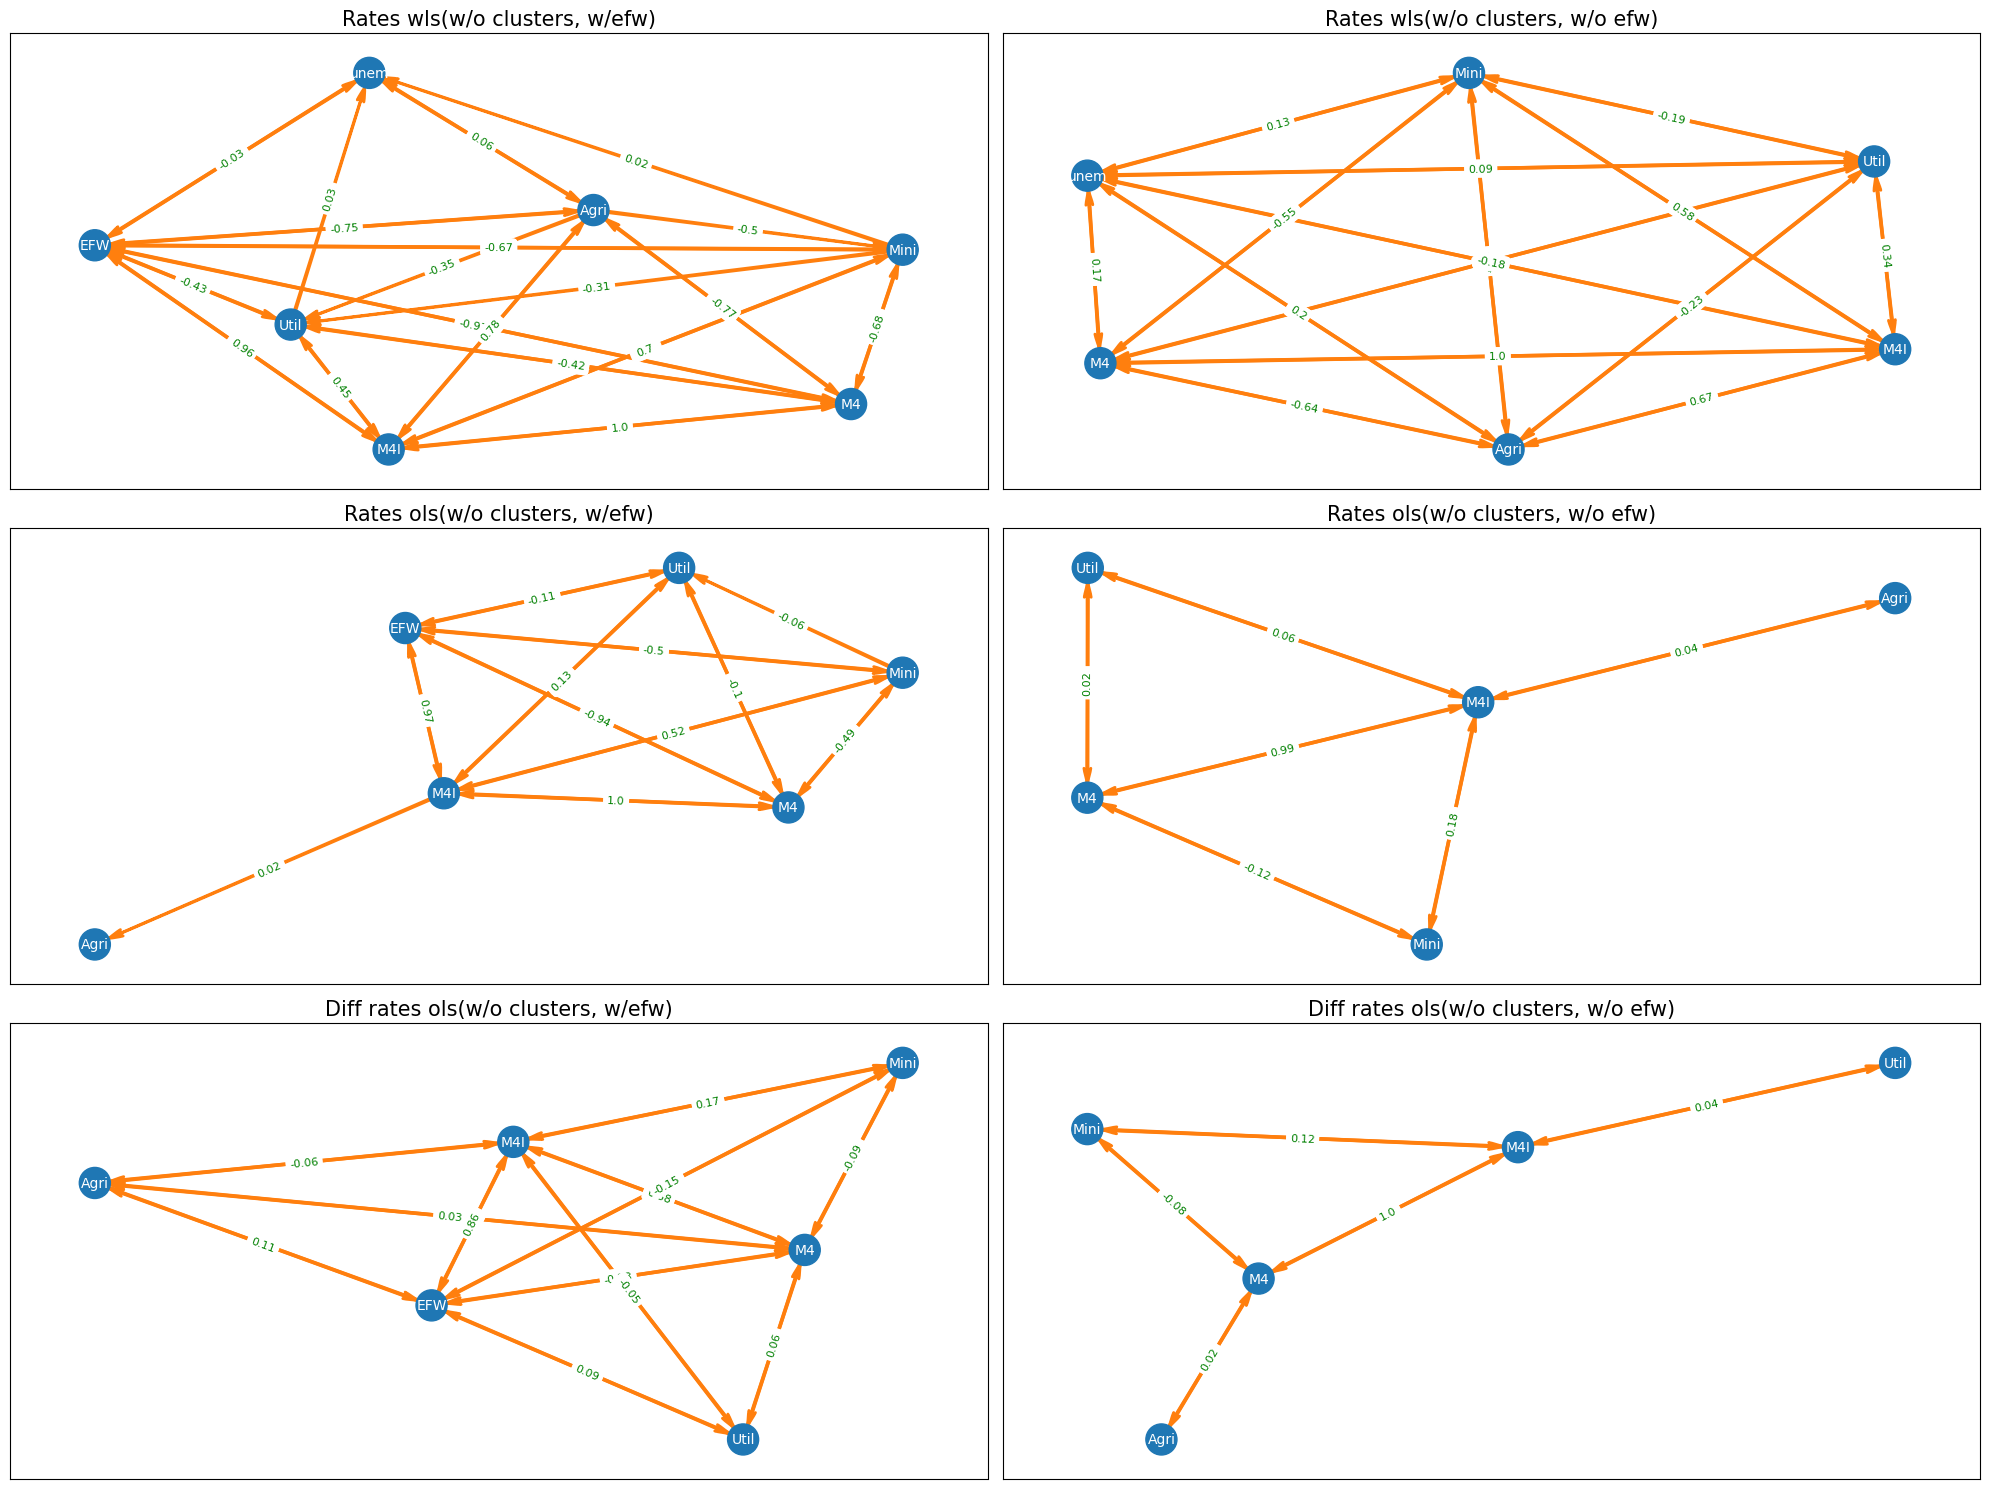

In [56]:
dag_dict_single = {
#     'Rates wls(w/clusters, w/efw)': residuals_df_dict['Rates wls(w/clusters, w/efw)'],
    'Rates wls(w/o clusters, w/efw)': resid_df_dict_single['Rates wls(w/o clusters, w/efw)'],
#     'Rates wls(w/clusters, w/o efw)': residuals_df_dict['Rates wls(w/clusters, w/o efw)'],
    'Rates wls(w/o clusters, w/o efw)': resid_df_dict_single['Rates wls(w/o clusters, w/o efw)'],
#     'Rates ols(w/clusters, w/efw)': residuals_df_dict['Rates ols(w/clusters, w/efw)'],
    'Rates ols(w/o clusters, w/efw)': resid_df_dict_single['Rates ols(w/o clusters, w/efw)'],
#     'Rates ols(w/clusters, w/o efw)': residuals_df_dict['Rates ols(w/clusters, w/o efw)'],
    'Rates ols(w/o clusters, w/o efw)': resid_df_dict_single['Rates ols(w/o clusters, w/o efw)'],
#     'Diff rates ols(w/clusters, w/efw)': residuals_df_dict['Diff rates ols(w/clusters, w/efw)'],
    'Diff rates ols(w/o clusters, w/efw)': resid_df_dict_single['Diff rates ols(w/o clusters, w/efw)'],
#     'Diff rates ols(w/clusters, w/o efw)': residuals_df_dict['Diff rates ols(w/clusters, w/o efw)'],
    'Diff rates ols(w/o clusters, w/o efw)': resid_df_dict_single['Diff rates ols(w/o clusters, w/o efw)']}

excl = []
incl = ['unem', 'Agri', 'Mini', 'Util', 'EFW', 'M4', 'M4I']

plot_dags_in_grid(dag_dict_single, include_columns=incl, exclude_columns=excl)


### Full regressions combinations for tabulating results without k-folds

In [45]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm

def ols_wls_combinations_full(df, dependent_var, independent_vars, model_type='ols', 
                         always_include=None, never_include=None, df_name='df', 
                         include_constant=False):
    np.random.seed(None)
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    y = df[dependent_var]

    if model_type not in ['ols', 'wls']:
        raise ValueError("model_type must be either 'ols' or 'wls'")

    if model_type == 'wls':
        # Calculate weights for WLS
        county_unem = df.groupby('FIPS')[dependent_var].var()
        df['weight'] = df['FIPS'].map(lambda x: 1 / county_unem.get(x, np.nan))
        df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['weight'])

    results = []
    residuals_dict = {var: [] for var in [dependent_var] + independent_vars}

    if always_include is None:
        always_include = []
    if never_include is None:
        never_include = []

    independent_vars = [var for var in independent_vars if var not in never_include]

    for i in range(1, len(independent_vars) + 1):
        for combo in itertools.combinations(independent_vars, i):
            combo = list(always_include) + list(combo)
            X = df[combo]

            if include_constant:
                X = sm.add_constant(X)
                combo = ['const'] + combo

            # Align the indices of y and X
            common_index = y.index.intersection(X.index)
            y_common = y.loc[common_index].reset_index(drop=True)
            X_common = X.loc[common_index].reset_index(drop=True)

            if model_type == 'ols':
                model = sm.OLS(y_common, X_common).fit()
            elif model_type == 'wls':
                weights = df.loc[common_index, 'weight'].reset_index(drop=True)
                model = sm.WLS(y_common, X_common, weights=weights).fit()

            beta_estimates = model.params
            std_errors = model.bse
            p_values = model.pvalues
            r_squared = model.rsquared
            y_pred = model.predict(X_common)
            mse = np.mean((y_common - y_pred) ** 2)

            result = {
                'DataFrame': df_name,
                'Model': ', '.join(combo),
                'r-squared': r_squared,
                'MSE': mse,
                'Variables': '<br>'.join(
                    [f'{combo[idx]}: {beta_estimates[idx]:.4f} (SE: {std_errors[idx]:.4f}, p: {p_values[idx]:.4f})' for idx in range(len(combo))])
            }
            for idx, var in enumerate(combo):
                result[var] = beta_estimates[idx]
                result[f'{var}_SE'] = std_errors[idx]
                result[f'{var}_p'] = p_values[idx]
            results.append(result)

            # Store residuals for the model
            residuals_y = y_common - y_pred
            residuals_dict[dependent_var].extend(residuals_y)

            # Calculate and store residuals for independent variables
            for var in combo:
                if var != 'const':
                    residuals_X = X_common[var] - model.predict(X_common)
                    residuals_dict[var].extend(residuals_X)

    # Make sure all lists in residuals_dict have the same length
    max_length = max(len(lst) for lst in residuals_dict.values())
    for var in residuals_dict:
        if len(residuals_dict[var]) < max_length:
            residuals_dict[var].extend([np.nan] * (max_length - len(residuals_dict[var])))

    results_df = pd.DataFrame(results)
    residuals_df = pd.DataFrame(residuals_dict)
    return results_df, residuals_df

# Example usage
# results_df, residuals_df = ols_wls_combinations(df, 'dependent_var', ['independent_var1', 'independent_var2'], model_type='ols')


In [46]:
results_rates_wls_full, residuals_rates_wls_full = ols_wls_combinations_full(df_rates, dv, iv2, 
                                                                           model_type='wls', 
                                                                           always_include=ai5, 
                                                                           never_include=ni5, 
                                                                           df_name='Rates wls', 
                                                                           include_constant=True)

results_rates_ols_full, residuals_rates_ols_full = ols_wls_combinations_full(df_rates, dv, iv2, 
                                                                           model_type='ols', 
                                                                           always_include=ai5, 
                                                                           never_include=ni5, 
                                                                           df_name='Rates ols', 
                                                                           include_constant=True)

results_diff_rates_ols_full, residuals_diff_rates_ols_full = ols_wls_combinations_full(df_diff, dv, iv2, 
                                                                           model_type='ols', 
                                                                           always_include=ai5, 
                                                                           never_include=ni5, 
                                                                           df_name='Diff rates ols', 
                                                                           include_constant=False)

# Combine the results and residuals into dictionaries
results_dict_all_full = {
    'Rates wls': results_rates_wls_full,
    'Rates ols': results_rates_ols_full,
    'Diff rates ols': results_diff_rates_ols_full
}

residuals_dict_all = {
    'Rates wls': residuals_rates_wls_full,
    'Rates ols': residuals_rates_ols_full,
    'Diff rates ols': results_diff_rates_ols_full
}

In [228]:
df_rates_ols_full = 'Rates ols'
variable_combinations = [
    {'const', 'M4', 'M4I'},
    {'const', 'Agri', 'Mini', 'Util'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW' ,'clusters_2.0', 'clusters_3.0', 'clusters_4.0'}
]
column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

filtered_full = filter_results_table(results_dict_all_full, df_rates_ols_full, variable_combinations)
display_results_table(filtered_full, variable_combinations, column_names, exclude_rows)

In [224]:
df_rates_wls_full = 'Rates wls'

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

results_wls_full = filter_results_table(results_dict_all_full, df_rates_wls_full, variable_combinations)
display_results_table(results_wls_full, variable_combinations, column_names, exclude_rows)

In [233]:
df_diff_rates_ols_full = 'Diff rates ols'

variable_combinations_diff = [
    {'M4', 'M4I'},
    {'Agri', 'Mini', 'Util'},
    {'Agri', 'Mini', 'Util', 'M4', 'M4I'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW' ,'clusters_2.0', 'clusters_3.0', 'clusters_4.0'}]

column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

diff_rates_ols_full = filter_results_table(results_dict_all_full, df_diff_rates_ols_full, variable_combinations_diff)
display_results_table(diff_rates_ols_full, variable_combinations_diff, column_names, exclude_rows)

### K-fold regressions for DAGS

In [50]:
# from abiFunctions import ols_wls_combinations_kfold

#rates, wls, clusters, efw
results_wls_rates_clusters_efw, residuals_wls_rates_clusters_efw = ols_wls_single_regression_kfold(df_rates, dv, iv, 
                                                                           model_type='wls', 
                                                                           always_include=ai1, 
                                                                           never_include=ni1, 
                                                                           df_name='Rates wls(w/clusters, w/efw)', 
                                                                           include_constant=True, 
                                                                           n_splits=5, 
                                                                           random_state=42)

#rates, wls, no clusters, efw
results_wls_rates_no_clusters_efw, residuals_wls_rates_no_clusters_efw = ols_wls_single_regression_kfold(df_rates, dv, iv, 
                                                                           model_type='wls', 
                                                                           always_include=ai2, 
                                                                           never_include=ni2, 
                                                                           df_name='Rates wls(w/o clusters, w/efw)', 
                                                                           include_constant=True, 
                                                                           n_splits=5, 
                                                                           random_state=42)

#rates, wls, clusters, no efw
results_wls_rates_clusters_no_efw, residuals_wls_rates_clusters_no_efw = ols_wls_single_regression_kfold(df_rates, dv, iv, 
                                                                           model_type='wls', 
                                                                           always_include=ai3, 
                                                                           never_include=ni3, 
                                                                           df_name='Rates wls(w/clusters, w/o efw)', 
                                                                           include_constant=True, 
                                                                           n_splits=5, 
                                                                           random_state=42)

#rates, wls, no clusters, no efw
results_wls_rates_no_clusters_no_efw, residuals_wls_rates_no_clusters_no_efw = ols_wls_single_regression_kfold(df_rates, dv, iv, 
                                                                           model_type='wls', 
                                                                           always_include=ai4, 
                                                                           never_include=ni4, 
                                                                           df_name='Rates wls(w/o clusters, w/o efw)', 
                                                                           include_constant=True, 
                                                                           n_splits=5, 
                                                                           random_state=42)


#rates, ols, clusters, efw
results_ols_rates_clusters_efw, residuals_ols_rates_clusters_efw = ols_wls_single_regression_kfold(df_rates, dv, iv, 
                                                                           model_type='ols', 
                                                                           always_include=ai1, 
                                                                           never_include=ni1, 
                                                                           df_name='Rates ols(w/clusters, w/efw)', 
                                                                           include_constant=True, 
                                                                           n_splits=5, 
                                                                           random_state=42)

#rates, ols, no clusters, efw
results_ols_rates_no_clusters_efw, residuals_ols_rates_no_clusters_efw = ols_wls_single_regression_kfold(df_rates, dv, iv, 
                                                                                                   model_type='ols', 
                                                                                                   always_include=ai2, 
                                                                                                   never_include=ni2, 
                                                                                                   df_name='Rates ols(w/o clusters, w/efw)', 
                                                                                                   include_constant=True, 
                                                                                                   n_splits=5, 
                                                                                                   random_state=42)
#rates, ols, clusters, no efw
results_ols_rates_clusters_no_efw, residuals_ols_rates_clusters_no_efw = ols_wls_single_regression_kfold(df_rates, dv, iv, 
                                                                                                   model_type='ols', 
                                                                                                   always_include=ai3, 
                                                                                                   never_include=ni3, 
                                                                                                   df_name='Rates ols(w/clusters, w/o efw)', 
                                                                                                   include_constant=True, 
                                                                                                   n_splits=5, 
                                                                                                   random_state=42)


#rates, ols, no clusters, no efw
results_ols_rates_no_clusters_no_efw, residuals_ols_rates_no_clusters_no_efw = ols_wls_single_regression_kfold(df_rates, dv, iv, 
                                                                                                   model_type='ols', 
                                                                                                   always_include=ai4, 
                                                                                                   never_include=ni4, 
                                                                                                   df_name='Rates ols(w/o clusters, w/o efw)', 
                                                                                                   include_constant=True, 
                                                                                                   n_splits=5, 
                                                                                                   random_state=42)


#diff rates, ols, cluster, efw
results_ols_diff_rates_clusters_efw, residuals_ols_diff_rates_clusters_efw = ols_wls_single_regression_kfold(df_diff, dv, iv, 
                                                                                     model_type='ols', 
                                                                                     always_include=ai1, 
                                                                                     never_include=ni1, 
                                                                                     df_name='Diff rates ols(w/clusters, w/efw)', 
                                                                                     include_constant=False, 
                                                                                     n_splits=5, 
                                                                                     random_state=42)



#diff rates, ols, no clusters, efw
results_ols_diff_rates_no_clusters_efw, residuals_ols_diff_rates_no_clusters_efw = ols_wls_single_regression_kfold(df_diff, dv, iv, 
                                                                                                             model_type='ols', 
                                                                                                             always_include=ai2, 
                                                                                                             never_include=ni2, 
                                                                                                             df_name='Diff rates ols(w/o clusters, w/efw)', 
                                                                                                             include_constant=False, 
                                                                                                             n_splits=5, 
                                                                                                             random_state=42) 

#diff rates, ols, clusters, no efw
results_ols_diff_rates_clusters_no_efw, residuals_ols_diff_rates_clusters_no_efw = ols_wls_single_regression_kfold(df_diff, dv, iv, 
                                                                                                             model_type='ols', 
                                                                                                             always_include=ai3, 
                                                                                                             never_include=ni3, 
                                                                                                             df_name='Diff rates ols(w/clusters, w/o efw)', 
                                                                                                             include_constant=False, 
                                                                                                             n_splits=5, 
                                                                                                             random_state=42) 


#diff rates, ols, no clusters, no efw
results_ols_diff_rates_no_clusters_no_efw, residuals_ols_diff_rates_no_clusters_no_efw = ols_wls_single_regression_kfold(df_diff, dv, iv, 
                                                                                                             model_type='ols', 
                                                                                                             always_include=ai4, 
                                                                                                             never_include=ni4, 
                                                                                                             df_name='Diff rates ols(w/o clusters, w/o efw)', 
                                                                                                             include_constant=False, 
                                                                                                             n_splits=5, 
                                                                                                             random_state=42) 


# Combine the results and residuals into dictionaries
results_dict_single = {
    'Rates wls(w/clusters, w/efw)': results_wls_rates_clusters_efw,
    'Rates wls(w/o clusters, w/efw)': results_wls_rates_no_clusters_efw,
    'Rates wls(w/clusters, w/o efw)': results_wls_rates_clusters_no_efw,
    'Rates wls(w/o clusters, w/o efw)': results_wls_rates_no_clusters_no_efw,
    'Rates ols(w/clusters, w/efw)': results_ols_rates_clusters_efw,
    'Rates ols(w/o clusters, w/efw)': results_ols_rates_no_clusters_efw,
    'Rates ols(w/clusters, w/o efw)': results_ols_rates_clusters_no_efw,
    'Rates ols(w/o clusters, w/o efw)': results_ols_rates_no_clusters_no_efw,
    'Diff rates ols(w/clusters, w/efw)': results_ols_diff_rates_clusters_efw,
    'Diff rates ols(w/o clusters, w/efw)': results_ols_diff_rates_no_clusters_efw,
    'Diff rates ols(w/clusters, w/o efw)': results_ols_diff_rates_clusters_no_efw,
    'Diff rates ols(w/o clusters, w/o efw)': results_ols_diff_rates_no_clusters_no_efw
}

residuals_dict_single = {
    'Rates wls(w/clusters, w/efw)': residuals_wls_rates_clusters_efw,
    'Rates wls(w/o clusters, w/efw)': residuals_wls_rates_no_clusters_efw,
    'Rates wls(w/clusters, w/o efw)': residuals_wls_rates_clusters_no_efw,
    'Rates wls(w/o clusters, w/o efw)': residuals_wls_rates_no_clusters_no_efw,
    'Rates ols(w/clusters, w/efw)': residuals_ols_rates_clusters_efw,
    'Rates ols(w/o clusters, w/efw)': residuals_ols_rates_no_clusters_efw,
    'Rates ols(w/clusters, w/o efw)': residuals_ols_rates_clusters_no_efw,
    'Rates ols(w/o clusters, w/o efw)': residuals_ols_rates_no_clusters_no_efw,
    'Diff rates ols(w/clusters, w/efw)': residuals_ols_diff_rates_clusters_efw,
    'Diff rates ols(w/o clusters, w/efw)': residuals_ols_diff_rates_no_clusters_efw,
    'Diff rates ols(w/clusters, w/o efw)': residuals_ols_diff_rates_clusters_no_efw,
    'Diff rates ols(w/o clusters, w/o efw)': residuals_ols_diff_rates_no_clusters_no_efw
}

In [51]:
# Convert residuals_dict entries to dataframes
resid_df_dict = {key: pd.DataFrame(value) for key, value in residuals_dict_single.items()}

In [52]:
# import pandas as pd
# import plotly.graph_objects as go
# import plotly.io as pio
# import plotly.express as px

# def plot_single_results_kfold(results_dfs, file_name):
#     combined_results = pd.concat(results_dfs)
#     fig = go.Figure()

#     # Define shapes for each variable
#     variable_shapes = ['circle', 'square', 'diamond', 'cross', 'x', 'triangle-up', 'triangle-down']
#     variables = combined_results['Variables'].unique()
#     variable_shape_map = {variable: shape for variable, shape in zip(variables, variable_shapes)}

#     # Define a color palette for variables
#     color_palette = px.colors.qualitative.Plotly[:len(variables)]
#     variable_color_map = {variable: color for variable, color in zip(variables, color_palette)}

#     for df_name, group in combined_results.groupby('DataFrame'):
#         for column in group.drop(columns=['DataFrame', 'Model', 'r-squared', 'Variables', 'avg_top_3_mse', 'Model_Type']).columns:
#             for variable in variables:
#                 variable_group = group[group['Variables'] == variable]
#                 if not variable_group.empty:
#                     model_type = variable_group['Model_Type'].iloc[0]
#                     fig.add_trace(go.Scatter(
#                         x=variable_group['Model'],
#                         y=variable_group[column],
#                         mode='markers',
#                         name=f'{df_name}: {column}',
#                         text=variable_group.apply(lambda row: f"Model Type: {model_type}<br>Variables:<br>{row['Variables']}<br>R-squared: {row['r-squared']:.4f}<br>Avg Top 3 MSE: {row['avg_top_3_mse']:.4f}<br>Value: {row[column]:.4f}", axis=1),  # Set hover text with model type, variables, R-squared, Avg Top 3 MSE, and their values
#                         hoverinfo='text',  # Display hover text
#                         marker=dict(
#                             symbol=variable_shape_map[variable],  # Use shape based on variable
#                             color=variable_color_map[variable]  # Use color based on variable
#                         )
#                     ))

#     fig.update_layout(
#         title='Combined Regression Results',
#         xaxis_title='Models',
#         yaxis_title='Values',
#         legend_title='Variables',
#         autosize=False,
#         width=1600,  # Adjust the width
#         height=800,  # Adjust the height
#         margin=dict(
#             l=100,
#             r=100,
#             b=200,  # Adjust bottom margin to accommodate long x-axis labels
#             t=100
#         )
#     )

#     # Save the plot as an HTML file
#     pio.write_html(fig, file=file_name, auto_open=False)

In [53]:
from abiFunctions import plot_single_results_kfold

plot_single_results_kfold([results_wls_rates_no_clusters_efw, 
                             results_wls_rates_no_clusters_no_efw, 
                             results_ols_rates_no_clusters_efw, 
                             results_ols_rates_no_clusters_no_efw,
                             results_ols_diff_rates_no_clusters_efw,
                             results_ols_diff_rates_no_clusters_no_efw], 
                            'combined_results_kfold_wls_single.html')

# Updated plot function

### DAGs from k-fold regression results

In [220]:
import copy
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from pingouin import partial_corr
import math

p_val = 0.01

def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used):
        for c_var in control_vars:
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                test = partial_corr(data=df, x=x, y=y, covar=c_used, method="pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)

    for x in df.columns:
        for y in df.columns:
            if x != y:
                test = partial_corr(data=df, x=x, y=y, method="pearson")
                if test["p-val"].values[0] <= p_val:
                    undirected_graph[x].append(y)
                    undirected_graph[y].append(x)
                    control_vars = [z for z in df.columns if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])

    return undirected_graph

def convert_to_directed(undirected_graph):
    dag = nx.DiGraph()
    for node, edges in undirected_graph.items():
        for edge in edges:
            dag.add_edge(node, edge)
    return dag

def graph_DAG(edges, df, title="", ax=None):
    graph = nx.DiGraph()
    edge_labels = {}
    
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                keep_controls.append(control)
        pcorr = partial_corr(data=df, x=edge[0], y=edge[1], covar=keep_controls)
        if pcorr["p-val"].values[0] <= p_val:
            edge_labels[edge] = str(round(pcorr["r"].values[0], 2))
            graph.add_edge(edge[0], edge[1])

    color_map = ["C0" for _ in graph]
    pos = graphviz_layout(graph, prog='neato')
    ax.set_title(title, fontsize=15)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size=500,
                     with_labels=True, arrows=True, font_color="white",
                     font_size=10, alpha=1, width=2, edge_color="C1",
                     ax=ax, arrowstyle="Fancy, head_length=1, head_width=0.5, tail_width=0.1")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels,
                                 font_color='green', font_size=8, ax=ax)
    

def plot_dag_for_dataframe(df, exclude_columns=None, ax=None, title=None):
    if exclude_columns is not None:
        drop_columns = [col for col in exclude_columns if col in df.columns]
        df = df.drop(columns=drop_columns)

    undirected_graph = {key: [] for key in df.columns}
    undirected_graph = build_skeleton(df, undirected_graph)
    dag = convert_to_directed(undirected_graph)
    edges = list(dag.edges)

    graph_DAG(edges, df, title=title, ax=ax)

def plot_dags_in_grid(dag_dict, include_columns=None, exclude_columns=None):
    if include_columns is not None:
        include_columns = set(include_columns)
    else:
        include_columns = set()
    if exclude_columns is None:
        exclude_columns = []

    num_plots = len(dag_dict)
    num_cols = 2
    num_rows = math.ceil(num_plots / num_cols)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 15))
    axs = axs.flatten()

    for i, (dag_name, dag_df) in enumerate(dag_dict.items()):
        ax = axs[i]

        if include_columns:
            columns_to_plot = [col for col in dag_df.columns if col in include_columns]
        else:
            columns_to_plot = [col for col in dag_df.columns if col not in exclude_columns]

        plot_dag_for_dataframe(dag_df[columns_to_plot], ax=ax, title=dag_name)

    for j in range(i + 1, num_cols * num_rows):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()


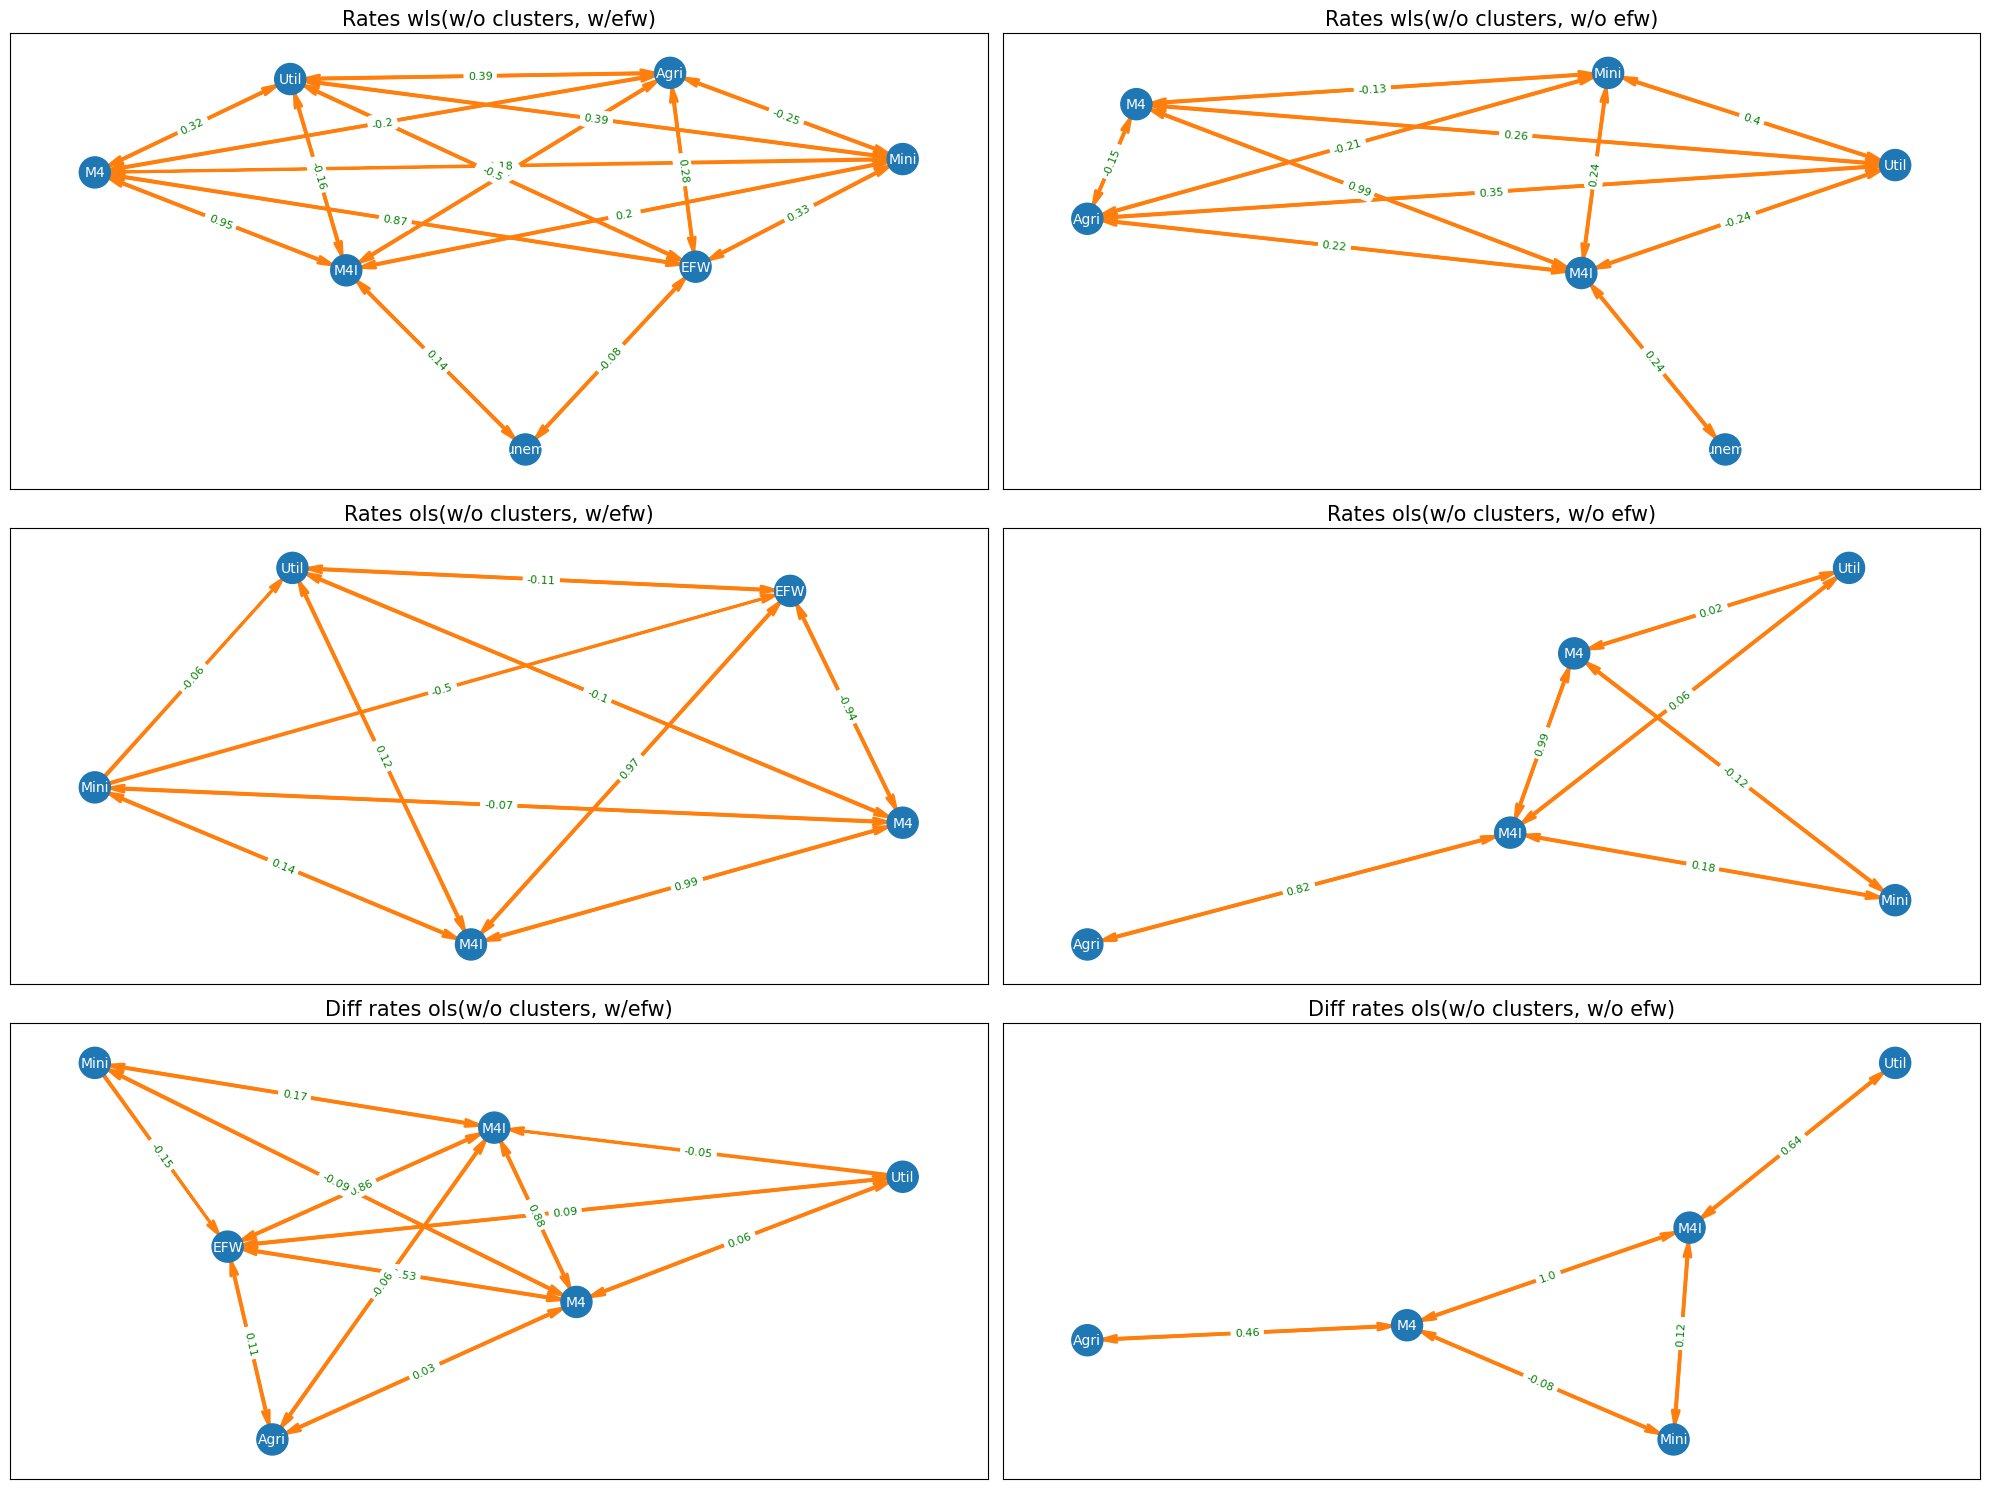

In [55]:
dag_dict = {
#     'Rates wls(w/clusters, w/efw)': residuals_df_dict['Rates wls(w/clusters, w/efw)'],
    'Rates wls(w/o clusters, w/efw)': resid_df_dict['Rates wls(w/o clusters, w/efw)'],
#     'Rates wls(w/clusters, w/o efw)': residuals_df_dict['Rates wls(w/clusters, w/o efw)'],
    'Rates wls(w/o clusters, w/o efw)': resid_df_dict['Rates wls(w/o clusters, w/o efw)'],
#     'Rates ols(w/clusters, w/efw)': residuals_df_dict['Rates ols(w/clusters, w/efw)'],
    'Rates ols(w/o clusters, w/efw)': resid_df_dict['Rates ols(w/o clusters, w/efw)'],
#     'Rates ols(w/clusters, w/o efw)': residuals_df_dict['Rates ols(w/clusters, w/o efw)'],
    'Rates ols(w/o clusters, w/o efw)': resid_df_dict['Rates ols(w/o clusters, w/o efw)'],
#     'Diff rates ols(w/clusters, w/efw)': residuals_df_dict['Diff rates ols(w/clusters, w/efw)'],
    'Diff rates ols(w/o clusters, w/efw)': resid_df_dict['Diff rates ols(w/o clusters, w/efw)'],
#     'Diff rates ols(w/clusters, w/o efw)': residuals_df_dict['Diff rates ols(w/clusters, w/o efw)'],
    'Diff rates ols(w/o clusters, w/o efw)': resid_df_dict['Diff rates ols(w/o clusters, w/o efw)']}

excl = []
incl = ['unem', 'Agri', 'Mini', 'Util', 'EFW', 'M4', 'M4I']

plot_dags_in_grid(dag_dict, include_columns=incl, exclude_columns=excl)


### Comparing DAGs for full dataframe vs k-fold

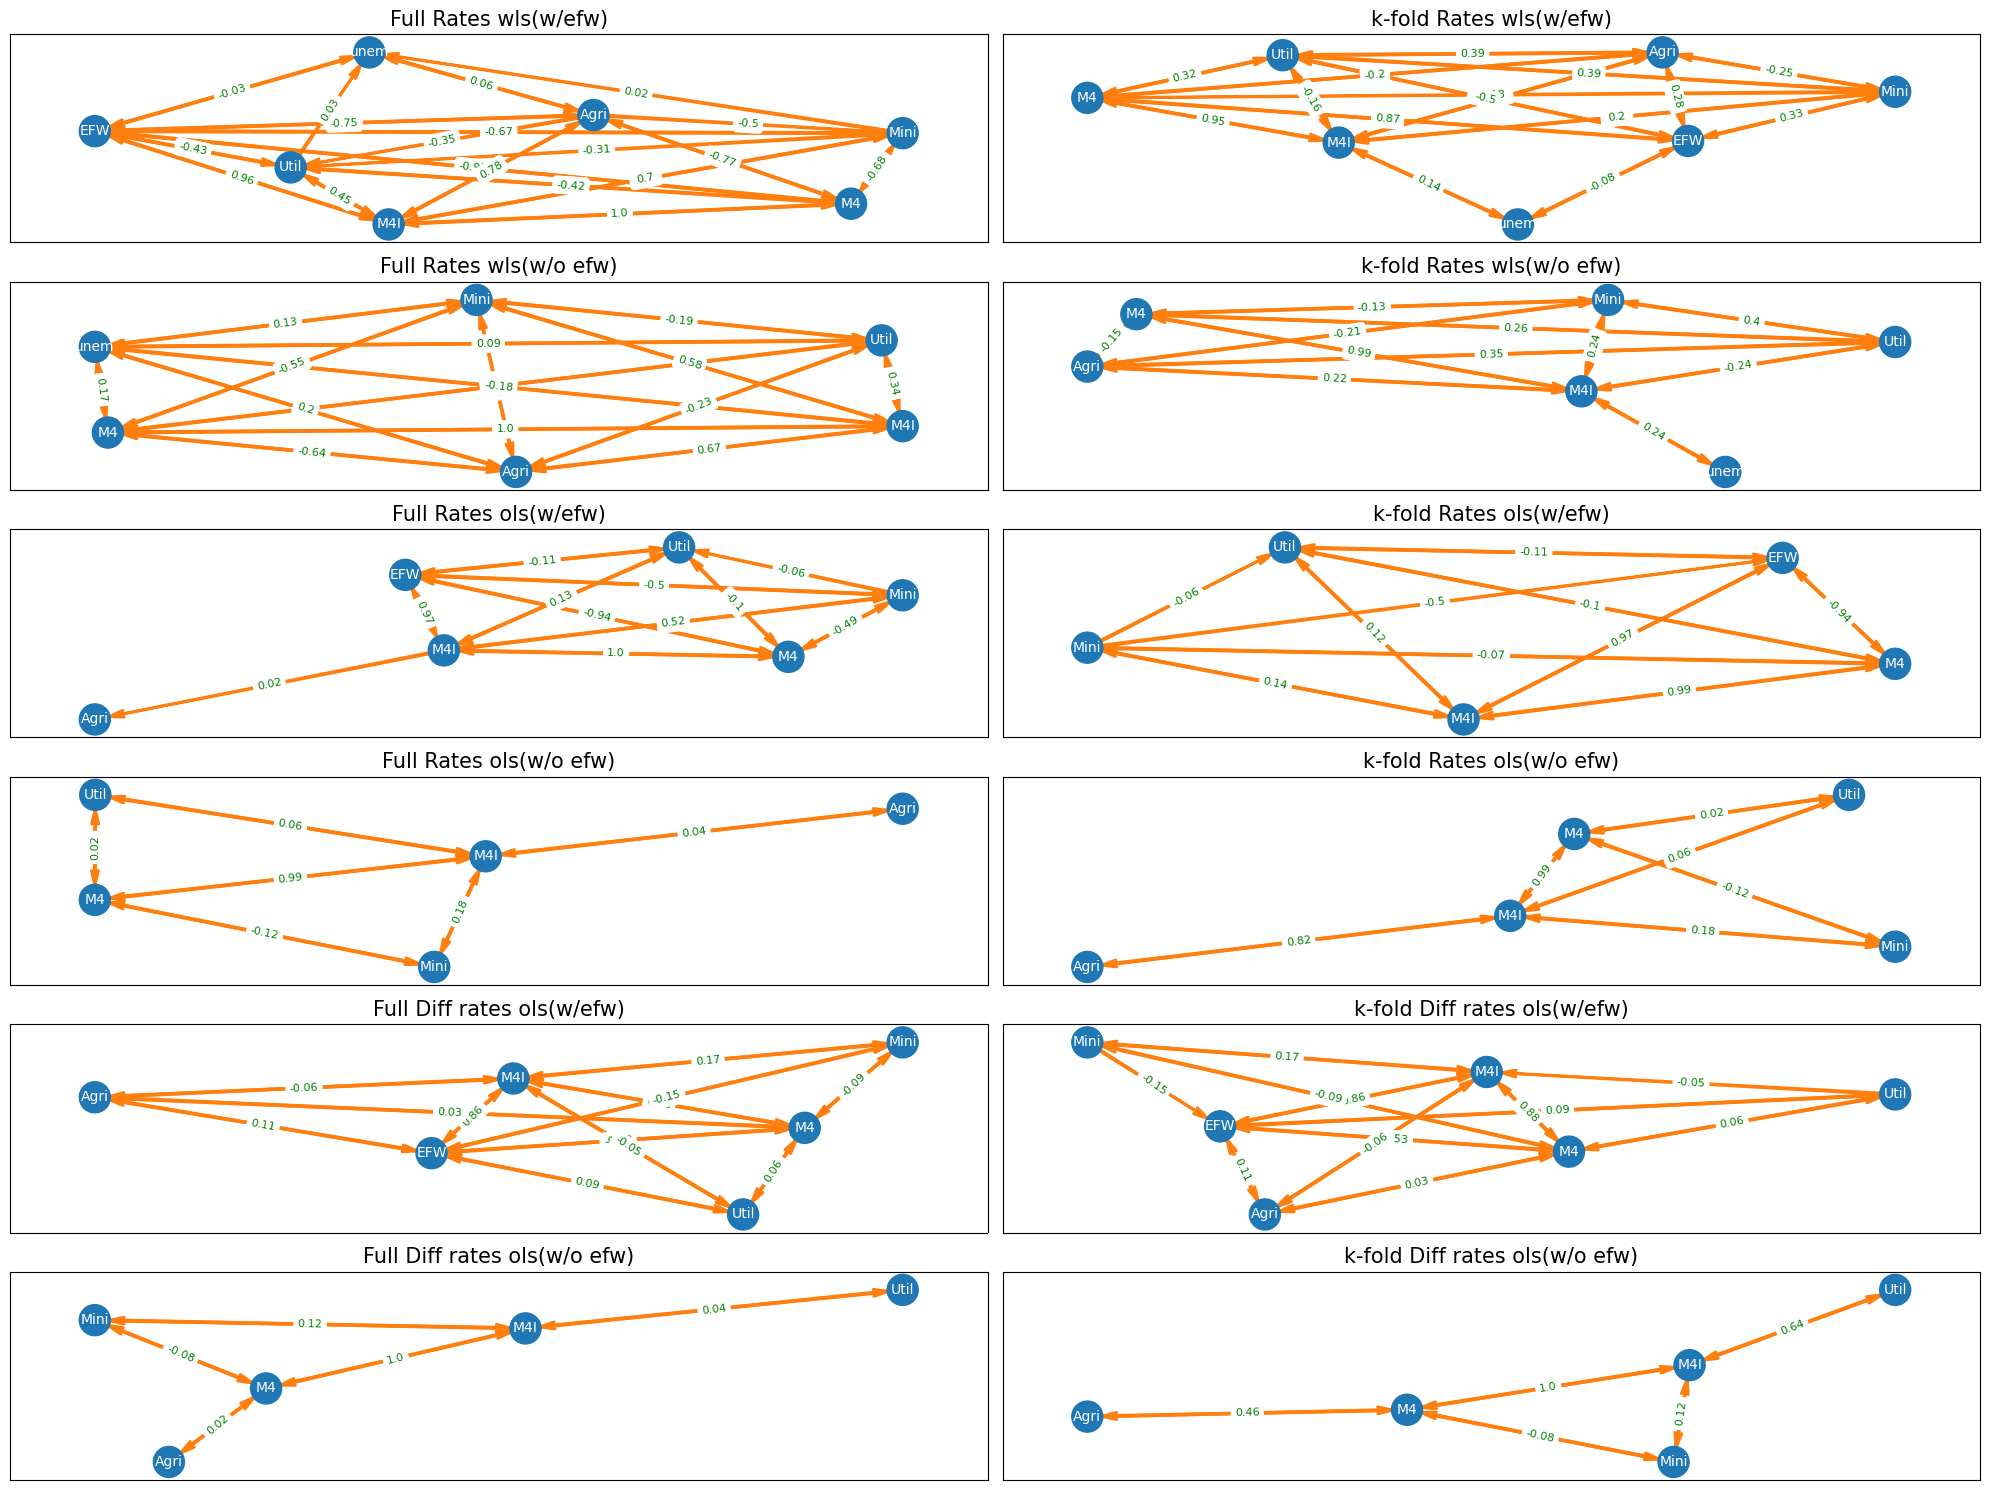

In [221]:
dag_dict = {
    'Full Rates wls(w/efw)': resid_df_dict_single['Rates wls(w/o clusters, w/efw)'],
    'k-fold Rates wls(w/efw)': resid_df_dict['Rates wls(w/o clusters, w/efw)'],
    'Full Rates wls(w/o efw)': resid_df_dict_single['Rates wls(w/o clusters, w/o efw)'],
    'k-fold Rates wls(w/o efw)': resid_df_dict['Rates wls(w/o clusters, w/o efw)'],
    'Full Rates ols(w/efw)': resid_df_dict_single['Rates ols(w/o clusters, w/efw)'],
    'k-fold Rates ols(w/efw)': resid_df_dict['Rates ols(w/o clusters, w/efw)'],
    'Full Rates ols(w/o efw)': resid_df_dict_single['Rates ols(w/o clusters, w/o efw)'],
    'k-fold Rates ols(w/o efw)': resid_df_dict['Rates ols(w/o clusters, w/o efw)'],
    'Full Diff rates ols(w/efw)': resid_df_dict_single['Diff rates ols(w/o clusters, w/efw)'],
    'k-fold Diff rates ols(w/efw)': resid_df_dict['Diff rates ols(w/o clusters, w/efw)'],
    'Full Diff rates ols(w/o efw)': resid_df_dict_single['Diff rates ols(w/o clusters, w/o efw)'],
    'k-fold Diff rates ols(w/o efw)': resid_df_dict['Diff rates ols(w/o clusters, w/o efw)']}

excl = []
incl = ['unem', 'Agri', 'Mini', 'Util', 'EFW', 'M4', 'M4I']

plot_dags_in_grid(dag_dict, include_columns=incl, exclude_columns=excl)

## Two-Stage Least Squares

In [329]:
df = df_rates.dropna()

### Manual 2SLS

In [335]:
df = sm.add_constant(df)

# First stage regression
first_stage = sm.OLS(df['M4I'], df[['const', 'M4', 'EFW', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']]).fit()
df['M4I_hat'] = first_stage.predict(df[['const', 'M4', 'EFW', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']])

# Second stage regression
second_stage = sm.OLS(df['unem'], df[['const', 'M4I_hat', 'M4', 'Agri', 'Mini', 'Util', 'EFW', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']]).fit()

# Summary of the second stage regression
second_stage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   unem   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     5568.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        09:15:12   Log-Likelihood:                -59969.
No. Observations:               30868   AIC:                         1.200e+05
Df Residuals:                   30859   BIC:                         1.200e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           37.0748      0.420     88.197      0.000      36.251      37.899
M4I_hat        -10.8848      0.124    -87.513      0.000     -11.129     -10.641
M4             -16.7384      0.212    -78.890      0.000     -17.154     -16.323
Agri             0.0224      0.013      1.717      0.086      -0.003       0.048
Mini            -0.1800      0.020     -8.901      0.000      -0.220      -0.140
Util             0.0105      0.024      0.441      0.659      -0.036       0.057
EFW             -3.6003      0.052    -69.230      0.000      -3.702      -3.498
clusters_2.0    -1.6689      0.022    -75.072      0.000      -1.712      -1.625
clusters_3.0    -3.1110      0.029   -105.867      0.000      -3.169      -3.053
clusters_4.0     2.7331      0.034     79.864      0.000       2.666       2.800
==============================================================================
Omnibus:                     6283.995   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31267.818
Skew:                           0.902   Prob(JB):                         0.00
Kurtosis:                       7.589   Cond. No.                     6.16e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.45e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Instrument = M4 and M4I

In [327]:
from linearmodels.iv import IV2SLS

model = IV2SLS.from_formula(
    'unem ~ 1 + Agri + Mini + Util + clusters_2.0 + clusters_3.0 + clusters_4.0 + [EFW ~ M4 + M4I]',
    data=df
)

results = model.fit()

results.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                   unem   R-squared:                      0.4878
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4877
No. Observations:               30868   F-statistic:                 2.608e+04
Date:                Tue, Jul 23 2024   P-value (F-stat)                0.0000
Time:                        22:58:40   Distribution:                  chi2(7)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                               
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Intercept        64.871     0.6292     103.10     0.0000      63.637      66.104
Agri             0.0444     0.0138     3.2097     0.0013      0.0173      0.0715
Mini            -0.1930     0.0234    -8.2341     0.0000     -0.2389     -0.1470
Util            -0.0330     0.0267    -1.2371     0.2161     -0.0852      0.0193
clusters_2.0    -1.6239     0.0233    -69.705     0.0000     -1.6695     -1.5782
clusters_3.0    -2.9707     0.0264    -112.38     0.0000     -3.0225     -2.9189
clusters_4.0     2.6900     0.0576     46.722     0.0000      2.5771      2.8028
EFW             -7.1445     0.0773    -92.471     0.0000     -7.2959     -6.9931
================================================================================

Endogenous: EFW
Instruments: M4, M4I
Robust Covariance (Heteroskedastic)
Debiased: False
"""

### Instrument = M4I

In [330]:
from linearmodels.iv import IV2SLS

model1 = IV2SLS.from_formula(
    'unem ~ 1 + Agri + Mini + Util + M4 + clusters_2.0 + clusters_3.0 + clusters_4.0 + [M4I ~ EFW]',
    data=df
)

results1 = model1.fit()

results1.summary


<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                   unem   R-squared:                      0.5186
Estimator:                    IV-2SLS   Adj. R-squared:                 0.5185
No. Observations:               30868   F-statistic:                 2.926e+04
Date:                Wed, Jul 24 2024   P-value (F-stat)                0.0000
Time:                        09:05:26   Distribution:                  chi2(8)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                               
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
Intercept        8.7070     0.0250     347.69     0.0000      8.6579      8.7561
Agri             0.0021     0.0134     0.1577     0.8747     -0.0242      0.0285
Mini            -0.1426     0.0231    -6.1824     0.0000     -0.1878     -0.0974
Util            -0.0648     0.0260    -2.4952     0.0126     -0.1156     -0.0139
M4              -16.933     0.1924    -87.993     0.0000     -17.310     -16.556
clusters_2.0    -1.7369     0.0224    -77.686     0.0000     -1.7807     -1.6931
clusters_3.0    -3.3110     0.0280    -118.22     0.0000     -3.3659     -3.2561
clusters_4.0     2.7427     0.0550     49.845     0.0000      2.6349      2.8506
M4I             -108.33     1.5702    -68.993     0.0000     -111.41     -105.25
================================================================================

Endogenous: M4I
Instruments: EFW
Robust Covariance (Heteroskedastic)
Debiased: False
"""

In [342]:
# df_rates, df_diff

In [349]:
drop_columns = ['clusters_2.0',
  'clusters_3.0',
  'clusters_4.0']

In [350]:
df = df_rates.set_index(['FIPS', 'TimePeriod']).dropna()
df = df.drop(columns=drop_columns)

In [358]:
df1 = df_diff.set_index(['FIPS', 'TimePeriod']).dropna()
df1 = df1.drop(columns=drop_columns)

In [351]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

{'Agri': ['Mini', 'Util', 'M4', 'M4I', 'unem', 'EFW'],
 'Mini': ['Agri', 'Util', 'M4', 'M4I', 'unem', 'EFW'],
 'Util': ['Agri', 'Mini', 'M4', 'M4I', 'unem', 'EFW'],
 'M4': ['Agri', 'Mini', 'Util', 'M4I', 'unem', 'EFW'],
 'M4I': ['Agri', 'Mini', 'Util', 'M4', 'unem', 'EFW'],
 'unem': ['Agri', 'Mini', 'Util', 'M4', 'M4I', 'EFW'],
 'EFW': ['Agri', 'Mini', 'Util', 'M4', 'M4I', 'unem']}

In [359]:
undirected_graph1 = {key:[] for key in df1.keys()}
for x in undirected_graph1:
    remaining_vars1 = [y for y in df1.keys() if y != x]
    for y in remaining_vars1:
        undirected_graph1[x].append(y)

In [352]:
import copy
p_val = .005
def build_skeleton(df, undirected_graph):    
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:

                c_used.append(c_var)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    #breakout of the for 
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
                
    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
            # first check for correlation with no controls
                test = df.partial_corr(x = x, 
                                       y = y, 
                                       covar = None,
                                       method = "pearson") 
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
            # if correlated check for deseparation controlling for other variables
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

undirected_graph = build_skeleton(df, undirected_graph)                                   
undirected_graph

{'Agri': ['M4', 'M4I'],
 'Mini': ['M4I', 'unem'],
 'Util': ['M4', 'M4I'],
 'M4': ['Agri', 'Util', 'unem', 'EFW'],
 'M4I': ['Agri', 'Mini', 'Util', 'EFW'],
 'unem': ['Mini', 'M4', 'EFW'],
 'EFW': ['M4', 'M4I', 'unem']}

In [360]:
undirected_graph1 = build_skeleton(df1, undirected_graph1)                                   
undirected_graph1

{'Agri': ['M4'],
 'Mini': ['M4I', 'unem'],
 'Util': ['EFW'],
 'M4': ['Agri', 'unem', 'EFW'],
 'M4I': ['Mini', 'unem', 'EFW'],
 'unem': ['Mini', 'M4', 'M4I', 'EFW'],
 'EFW': ['Util', 'M4', 'M4I', 'unem']}

In [353]:
import matplotlib.pyplot as plt
import networkx as nx
def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    
    # generate partial correlation matrix to draw values from
    # for graph edges
    graph = nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key.replace(" ","\n"), key2[0].replace(" ","\n"))
                edges.append(edge)

    # edge format: ("i", "j") --> from node i to node j
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, 
                     node_size = 1000,
                     with_labels=True,  arrows=False,
                     font_size = 20, alpha = 1,
                     font_color = "white",
                     ax = ax)

    plt.axis("off")
    plt.savefig("g1.png", format="PNG")
    plt.show()

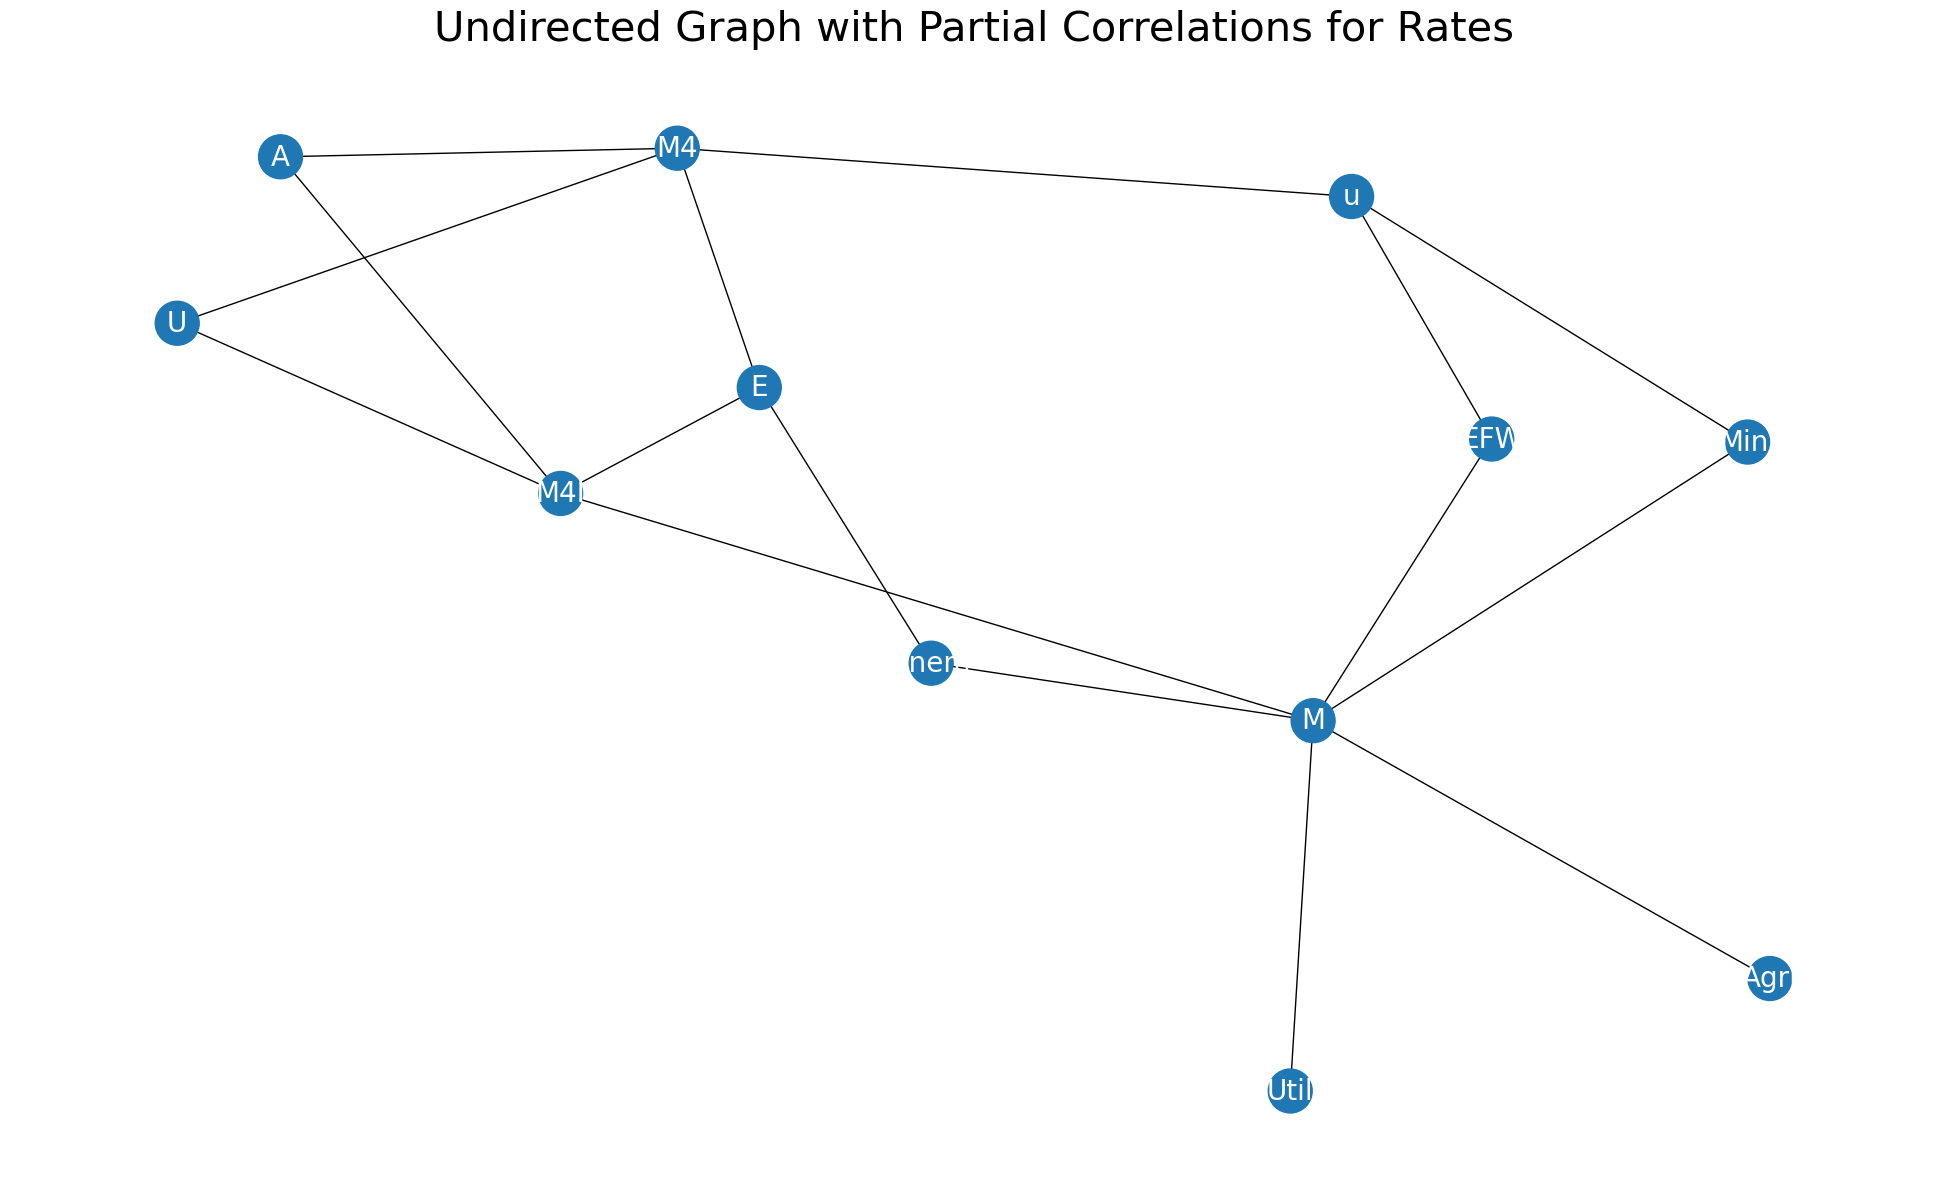

In [357]:
graph_DAG(undirected_graph, df, title = "Undirected Graph with Partial Correlations for Rates")

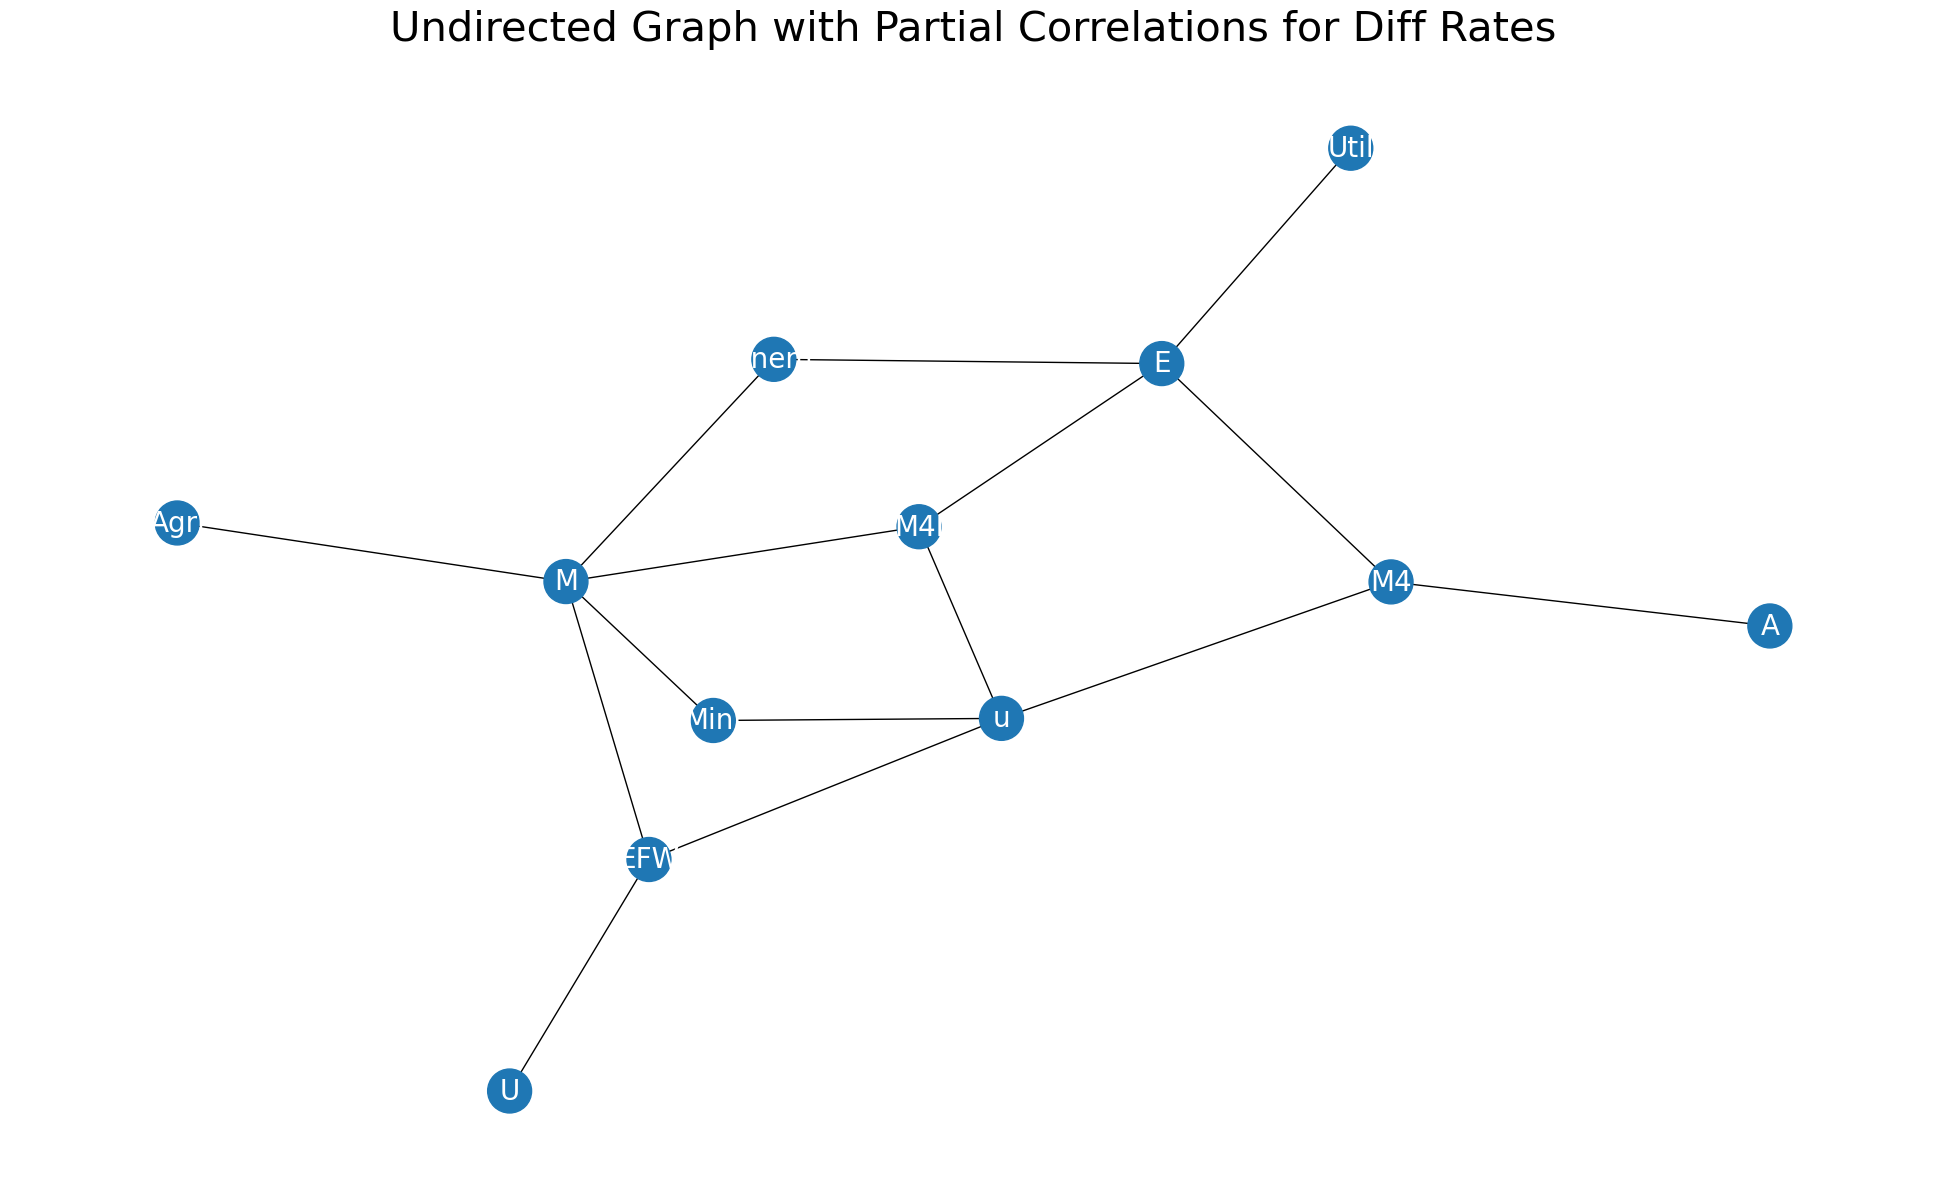

In [361]:
graph_DAG(undirected_graph1, df1, title = "Undirected Graph with Partial Correlations for Diff Rates")

In [362]:
from pgmpy.estimators import PC
c = PC(df)
max_cond_vars = len(df.keys()) - 2

model = c.estimate(return_type = "dag",variant= "parallel",#"orig", "stable"
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()

  0%|          | 0/5 [00:00<?, ?it/s]

In [371]:
from pgmpy.estimators import PC
c1 = PC(df1)
max_cond_vars1 = len(df1.keys()) - 2

model1 = c1.estimate(return_type = "dag",variant= "parallel",#"orig", "stable"
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars1, ci_test = "pearsonr")
edges1 = model1.edges()

  0%|          | 0/5 [00:00<?, ?it/s]

In [367]:
from matplotlib.patches import ArrowStyle

In [369]:
from pgmpy.estimators import PC
c = PC(df)
max_cond_vars = len(df.keys()) - 2

model = c.estimate(return_type = "dag",variant= "parallel",#"orig", "stable"
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()

def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    edge_labels = {}
    ############ Add ############
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)                
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
#         corr_matrix_heatmap(pcorr, save_fig = False, pp = None, title = "Partial Correlation")
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     # turn text black for larger variable names in homework
                     font_color = "k",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    ############ Add ############
    nx.draw_networkx_edge_labels(graph,pos,
                                edge_labels=edge_labels,
                                font_color='green',
                                font_size=20)
    
graph_DAG(edges, df, title = "Directed Acyclic Graph for Rates")

('unem', 'M4I') []
keep control: M4I
keep control: Mini
('unem', 'EFW') ['M4I', 'Mini']
keep control: Mini
keep control: unem
('M4I', 'EFW') ['Mini', 'unem']
keep control: Util
('M4I', 'M4') ['Util']
('M4I', 'Mini') []
keep control: M4I
('Util', 'M4') ['M4I']
keep control: Mini
('M4', 'unem') ['Mini']
keep control: M4
('Mini', 'unem') ['M4']
keep control: M4I
keep control: unem
('Mini', 'EFW') ['M4I', 'unem']


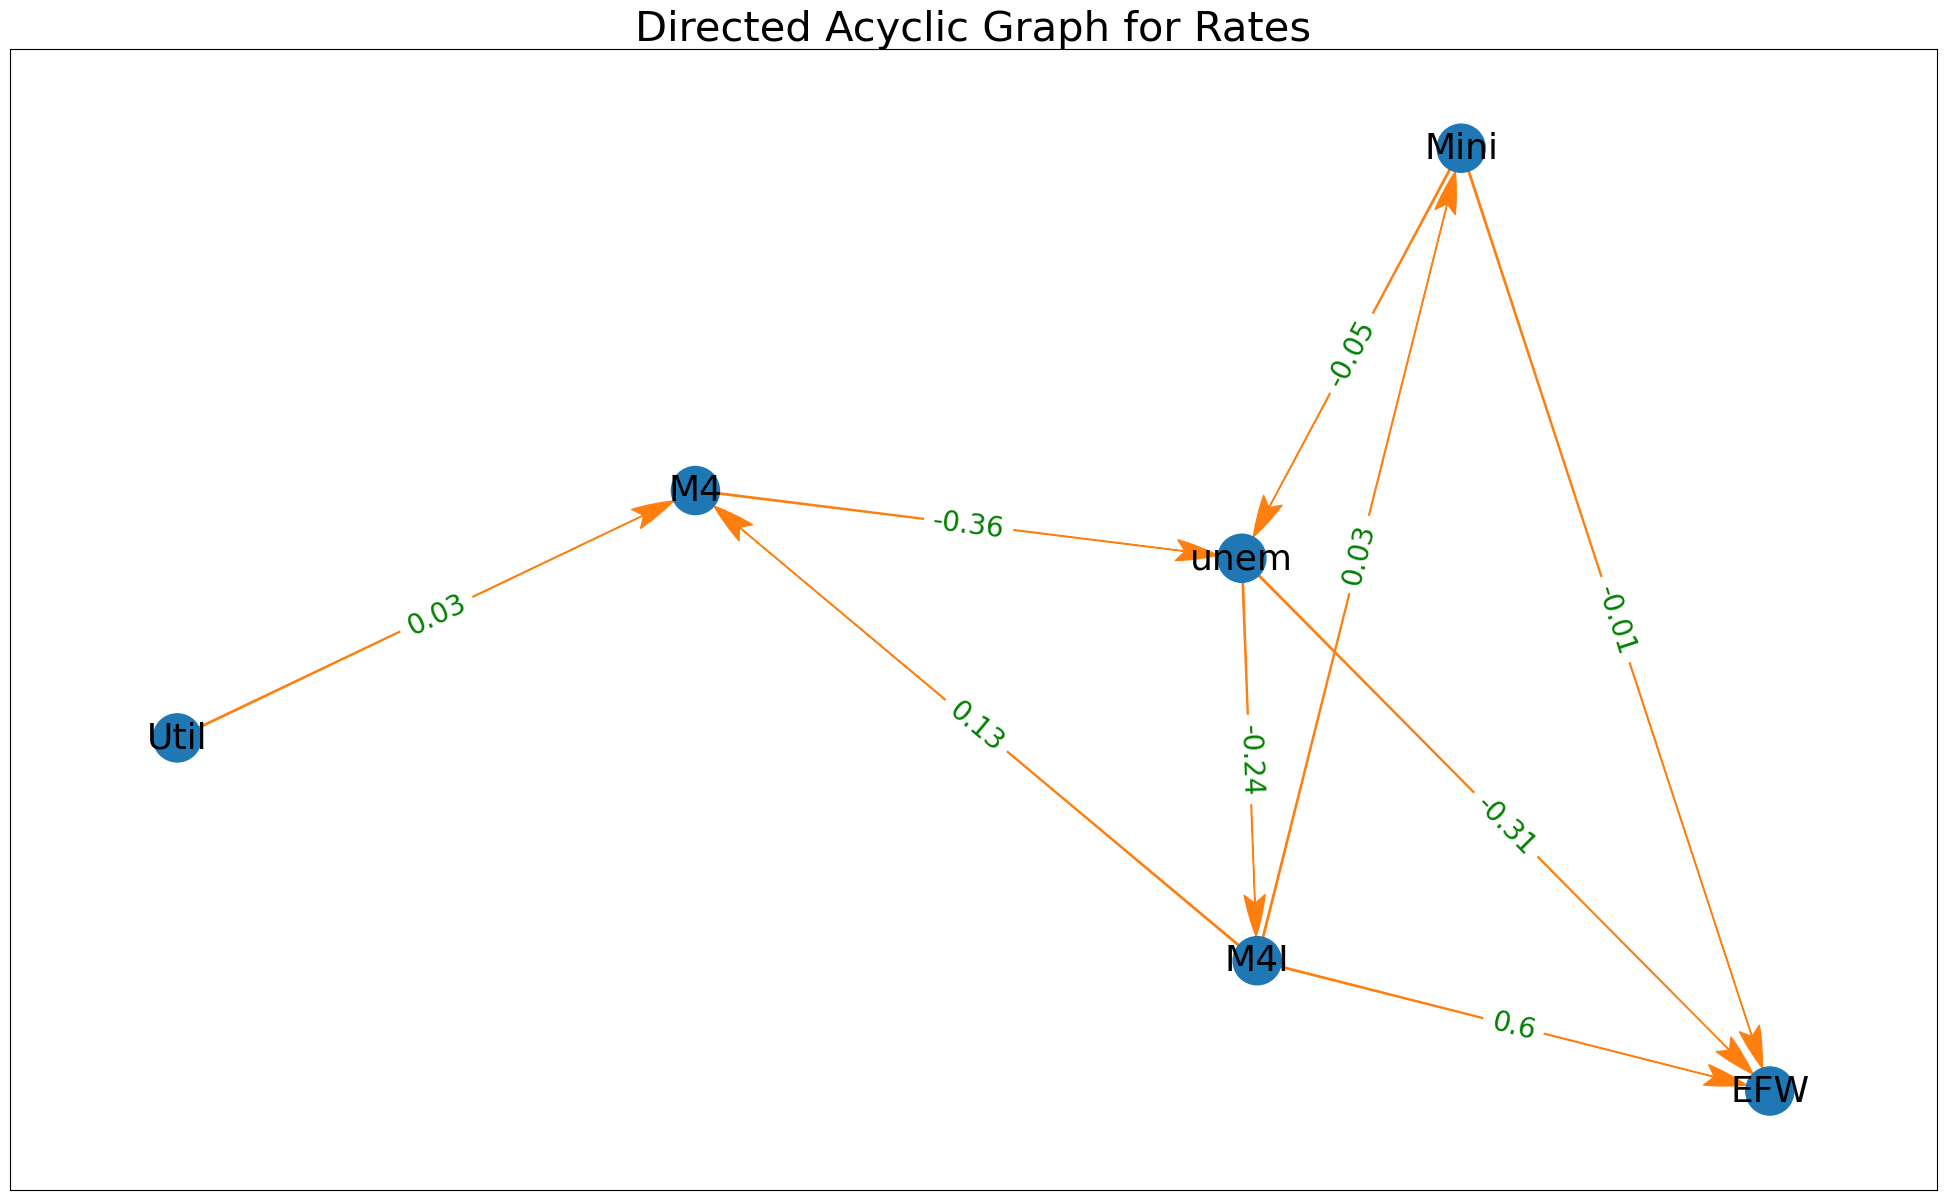

In [374]:
graph_DAG(edges, df, title = "Directed Acyclic Graph for Rates")

keep control: Util
('M4', 'EFW') ['Util']
keep control: EFW
keep control: M4I
keep control: Mini
('M4', 'unem') ['EFW', 'M4I', 'Mini']
keep control: M4
keep control: M4I
keep control: Mini
('EFW', 'unem') ['M4', 'M4I', 'Mini']
('Mini', 'M4I') []
keep control: M4
keep control: EFW
keep control: M4I
('Mini', 'unem') ['M4', 'EFW', 'M4I']
keep control: EFW
keep control: M4
keep control: Mini
('M4I', 'unem') ['EFW', 'M4', 'Mini']
keep control: M4
('Util', 'EFW') ['M4']
('Agri', 'M4') []


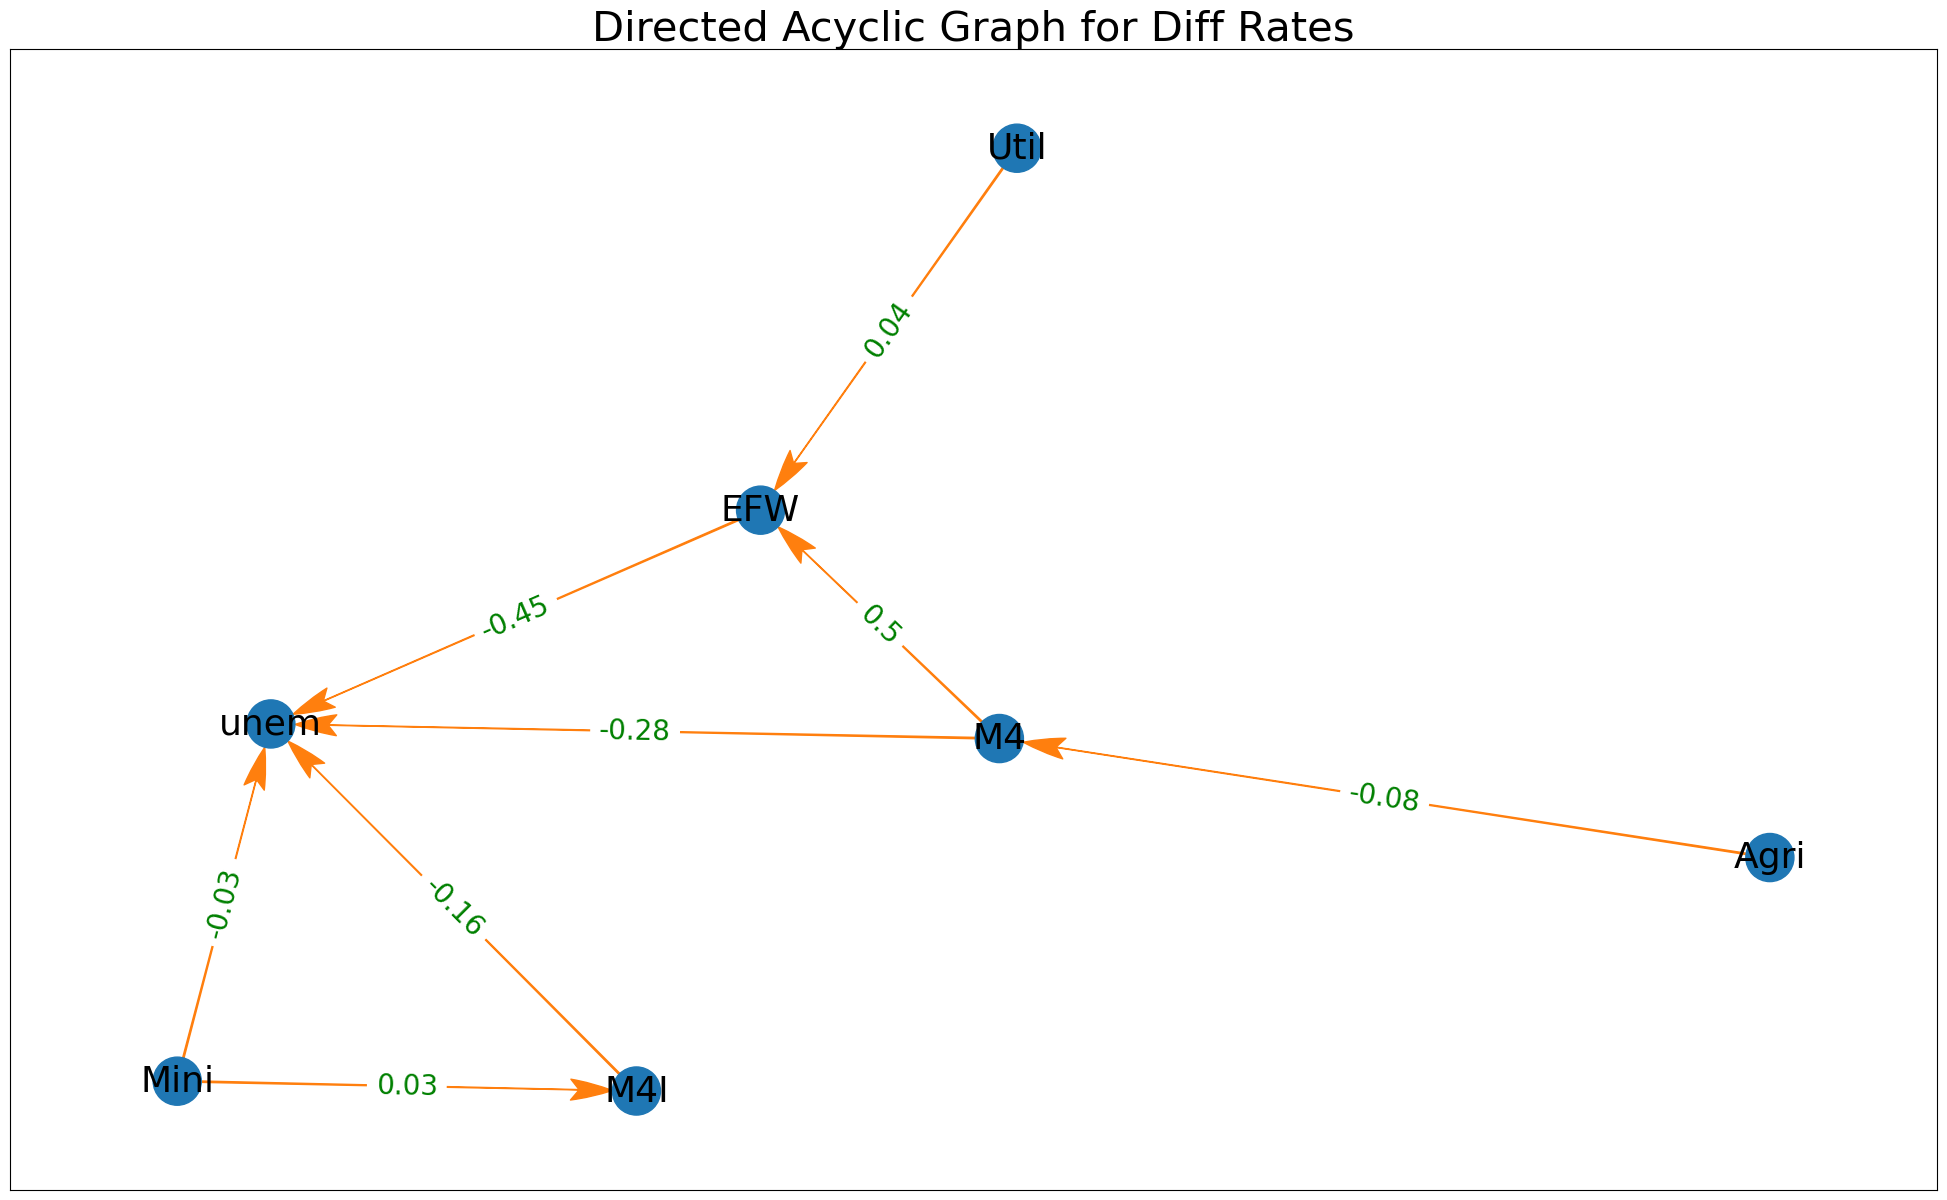

In [373]:
graph_DAG(edges1, df1, title = "Directed Acyclic Graph for Diff Rates")

In [378]:
# df_diff, df_rates

### Full regression function

In [481]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm

def calculate_residuals(df, y_var, X_vars, model_type='ols', weights=None, include_constant=False):
    residuals = {}
    for var in [y_var] + X_vars:
        other_vars = [v for v in [y_var] + X_vars if v != var]
        X = df[other_vars].copy()
        if include_constant:
            X = sm.add_constant(X, has_constant='add')
        y = df[[var]]
        
        if model_type == 'ols':
            model = sm.OLS(y, X)
        elif model_type == 'wls':
            model = sm.WLS(y, X, weights=weights)
        
        results = model.fit()
        residuals[f"$\\epsilon_{{{var}}}$"] = results.resid
    return pd.DataFrame(residuals)

def ols_wls_combinations_full(df, dependent_var, independent_vars, model_type='ols', 
                              always_include=None, never_include=None, df_name='df', 
                              include_constant=False):
    np.random.seed(None)
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    if model_type not in ['ols', 'wls']:
        raise ValueError("model_type must be either 'ols' or 'wls'")

    if model_type == 'wls':
        county_unem = df.groupby('FIPS')[dependent_var].var()
        df['weight'] = df['FIPS'].map(lambda x: 1 / county_unem.get(x, np.nan))
        df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['weight'])
        weights = df['weight']
    else:
        weights = None

    if always_include is None:
        always_include = []
    if never_include is None:
        never_include = []

    independent_vars = [var for var in independent_vars if var not in never_include]

    results = []
    residuals_dict = {}

    for i in range(1, len(independent_vars) + 1):
        for combo in itertools.combinations(independent_vars, i):
            combo = list(always_include) + list(combo)
            X = df[combo].copy()

            if include_constant:
                X = sm.add_constant(X, has_constant='add')

            common_index = df.index.intersection(X.index)
            y_common = df.loc[common_index, dependent_var]
            X_common = X.loc[common_index]

            if model_type == 'ols':
                model = sm.OLS(y_common, X_common).fit()
            elif model_type == 'wls':
                weights_common = weights.loc[common_index]
                model = sm.WLS(y_common, X_common, weights=weights_common).fit()

            beta_estimates = model.params
            std_errors = model.bse
            p_values = model.pvalues
            r_squared = model.rsquared
            y_pred = model.predict(X_common)
            mse = np.mean((y_common - y_pred) ** 2)

            # Format the variables in a readable manner
            formatted_vars = [
                f'{var}: {beta_estimates[idx + int(include_constant)]:.4f} (SE: {std_errors[idx + int(include_constant)]:.4f}, p: {p_values[idx + int(include_constant)]:.4f})'
                for idx, var in enumerate(combo)
            ]

            result = {
                'DataFrame': df_name,
                'Model': ', '.join(['const'] + combo) if include_constant else ', '.join(combo),
                'r-squared': r_squared,
                'MSE': mse,
                'Variables': '<br>'.join(formatted_vars)
            }

            for idx, var in enumerate(combo):
                result[var] = beta_estimates[idx + int(include_constant)]
                result[f'{var}_SE'] = std_errors[idx + int(include_constant)]
                result[f'{var}_p'] = p_values[idx + int(include_constant)]

            if include_constant:
                result['const'] = beta_estimates[0]
                result['const_SE'] = std_errors[0]
                result['const_p'] = p_values[0]
                
            results.append(result)

            # Store residuals for the current combination
            sorted_combo = tuple(sorted(combo))
            residuals_dict[sorted_combo] = calculate_residuals(df.loc[common_index], dependent_var, combo, model_type=model_type, weights=weights_common if model_type == 'wls' else None, include_constant=include_constant)

    results_df = pd.DataFrame(results)
    return results_df, residuals_dict

### ols and wls k-fold regressions

In [559]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold

def calculate_residuals_k(df, y_var, X_vars, model_type='ols', weights=None, include_constant=False):
    residuals = {}
    for var in [y_var] + X_vars:
        other_vars = [v for v in [y_var] + X_vars if v != var]
        X = df[other_vars].copy()
        if include_constant:
            X = sm.add_constant(X, has_constant='add')
        y = df[var]
        
        if model_type == 'ols':
            model = sm.OLS(y, X)
        elif model_type == 'wls':
            model = sm.WLS(y, X, weights=weights)
        
        results = model.fit()
        residuals[f"$\\epsilon_{{{var}}}$"] = results.resid
    return pd.DataFrame(residuals)

def ols_wls_combinations_kfold(df, dependent_var, independent_vars, model_type='ols', 
                               always_include=None, never_include=None, df_name='df', 
                               include_constant=False, n_splits=10, random_state=None):
    np.random.seed(random_state)
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    y = df[dependent_var]

    if model_type not in ['ols', 'wls']:
        raise ValueError("model_type must be either 'ols' or 'wls'")

    if model_type == 'wls':
        # Calculate weights for WLS
        county_unem = df.groupby('FIPS')[dependent_var].var()
        df['weight'] = df['FIPS'].map(lambda x: 1 / county_unem.get(x, np.nan))
        df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['weight'])

    results = []
    residuals_dict = {}

    if always_include is None:
        always_include = []
    if never_include is None:
        never_include = []

    independent_vars = [var for var in independent_vars if var not in never_include]

    for i in range(1, len(independent_vars) + 1):
        for combo in itertools.combinations(independent_vars, i):
            combo = list(always_include) + list(combo)
            X = df[combo].copy()

            if include_constant:
                X = sm.add_constant(X, has_constant='add')
                combo_with_const = ['const'] + combo
            else:
                combo_with_const = combo

            kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            mse_list = []
            r_squared_list = []
            beta_estimates = []
            std_errors = []
            p_values = []
            fold_residuals_list = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
                y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

                if model_type == 'ols':
                    model = sm.OLS(y_train, X_train).fit()
                elif model_type == 'wls':
                    weights = df['weight'].iloc[train_index].reset_index(drop=True)
                    model = sm.WLS(y_train, X_train, weights=weights).fit()

                y_pred = model.predict(X_test)
                mse = np.mean((y_test - y_pred) ** 2)
                mse_list.append(mse)
                r_squared = model.rsquared
                r_squared_list.append(r_squared)
                beta_estimates.append(model.params)
                std_errors.append(model.bse)
                p_values.append(model.pvalues)

                fold_residuals = {var: [] for var in [dependent_var] + combo_with_const if var != 'const'}
                residuals_y = y_test - y_pred
                fold_residuals[dependent_var].extend(residuals_y)

                # Calculate and store residuals for independent variables
                for var in combo_with_const:
                    if var != 'const':
                        residuals_X = X_test[var] - model.predict(X_test)
                        fold_residuals[var].extend(residuals_X)
                
                fold_residuals_list.append(fold_residuals)

            top_3_indices = np.argsort(mse_list)[:3]
            avg_top_3_mse = np.mean([mse_list[idx] for idx in top_3_indices])
            avg_beta_estimates = np.mean([beta_estimates[idx] for idx in top_3_indices], axis=0)
            avg_std_errors = np.mean([std_errors[idx] for idx in top_3_indices], axis=0)
            avg_p_values = np.mean([p_values[idx] for idx in top_3_indices], axis=0)
            avg_r_squared = np.mean([r_squared_list[idx] for idx in top_3_indices])

            sorted_combo_with_const = sorted(combo_with_const)

            result = {
                'DataFrame': df_name,
                'Model': ', '.join(sorted_combo_with_const),
                'r-squared': avg_r_squared,
                'avg_top_3_mse': avg_top_3_mse,
                'Variables': '<br>'.join(
                    [f'{sorted_combo_with_const[idx]}: {avg_beta_estimates[idx]:.4f} (SE: {avg_std_errors[idx]:.4f}, p: {avg_p_values[idx]:.4f})' for idx in range(len(sorted_combo_with_const))])
            }
            for idx, var in enumerate(sorted_combo_with_const):
                if var == 'const' and not include_constant:
                    result[var] = np.nan
                    result[f'{var}_SE'] = np.nan
                    result[f'{var}_p'] = np.nan
                else:
                    result[var] = avg_beta_estimates[idx]
                    result[f'{var}_SE'] = avg_std_errors[idx]
                    result[f'{var}_p'] = avg_p_values[idx]
            results.append(result)

            # Calculate residuals for the average model based on the top 3 lowest MSEs
            residuals_for_top3 = []
            for idx in top_3_indices:
                common_index = df.index.intersection(X.index)
                residuals_for_top3.append(calculate_residuals_k(df.loc[common_index], dependent_var, combo, model_type=model_type, weights=df['weight'] if model_type == 'wls' else None, include_constant=include_constant))

            avg_residuals = pd.concat(residuals_for_top3).groupby(level=0).mean()
            sorted_combo = tuple(sorted(combo_with_const))
            residuals_dict[sorted_combo] = avg_residuals

    results_df = pd.DataFrame(results)
    return results_df, residuals_dict


In [565]:
dv = 'unem'
iv = ['Agri', 'Mini', 'Util', 'EFW', 'M4', 'M4I', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']

In [582]:
# Rates ols
results_ols_rates_clusters_efw_k, residuals_ols_rates_clusters_efw_k = ols_wls_combinations_kfold(df_rates, dv, iv, 
                                                                           model_type='ols', 
                                                                           always_include=None, 
                                                                           never_include=None, 
                                                                           df_name='Rates ols)', 
                                                                           include_constant=True,
                                                                           n_splits=5, random_state=42)


#rates, wls, clusters, efw
results_wls_rates_clusters_efw_k, residuals_wls_rates_clusters_efw_k = ols_wls_combinations_kfold(df_rates, dv, iv, 
                                                                           model_type='wls', 
                                                                           always_include=None, 
                                                                           never_include=None, 
                                                                           df_name='Rates wls)', 
                                                                           include_constant=True,
                                                                           n_splits=5, random_state=42)


#diff rates, ols, cluster, efw
results_ols_diff_rates_clusters_efw_k, residuals_ols_diff_rates_clusters_efw_k = ols_wls_combinations_kfold(df_diff, dv, iv, 
                                                                                     model_type='ols', 
                                                                                     always_include=None, 
                                                                                     never_include=None, 
                                                                                     df_name='Diff rates ols', 
                                                                                     include_constant=False,
                                                                           n_splits=5, random_state=42)




# Combine the results and residuals into dictionaries
results_dict_combo_k = {
    'Rates wls': results_wls_rates_clusters_efw_k,
    'Rates ols': results_ols_rates_clusters_efw_k,
    'Diff rates ols': results_ols_diff_rates_clusters_efw_k
}

residuals_dict_combo_k = {
    'Rates wls': residuals_wls_rates_clusters_efw_k,
    'Rates ols': residuals_ols_rates_clusters_efw_k,
    'Diff rates ols': residuals_ols_diff_rates_clusters_efw_k
}

In [748]:
rates_try = 'Rates wls'

variable_combok = [
    {'const', 'M4', 'M4I'},
    {'const', 'Agri', 'Util', 'Mini'},
    {'const', 'Agri', 'Mini', 'Util', 'M4', 'M4I'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW' ,'clusters_2.0', 'clusters_3.0', 'clusters_4.0'}]

column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

rates_kfold = filter_results_table(results_dict_combo_k, rates_try, variable_combok)

In [749]:
rates_try_ols_k = 'Rates ols'

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

rates_k_ols = filter_results_table(results_dict_combo_k, rates_try_ols_k, variable_combok)

In [750]:
diff_rates_try = 'Diff rates ols'

variable_combinationsk = [
    {'M4', 'M4I'},
    {'Agri', 'Util', 'Mini'},
    {'Agri', 'Mini', 'Util', 'M4', 'M4I'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW' ,'clusters_2.0', 'clusters_3.0', 'clusters_4.0'}]

column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

diff_rates_kfold = filter_results_table(results_dict_combo_k, diff_rates_try, variable_combinationsk)

In [660]:
# Retrieve residuals for a specific combination, order-agnostic
combo_efw = ('const', 'Agri', 'EFW', 'M4', 'M4I', 'Mini', 'Util')
combo_no_efw = ('const', 'Agri', 'M4', 'M4I', 'Mini', 'Util')
combo_diff_efw = ('Agri', 'EFW', 'M4', 'M4I', 'Mini', 'Util')
combo_diff_no_efw = ('Agri', 'M4', 'M4I', 'Mini', 'Util')

resids_rates_wls_kfold = residuals_wls_rates_clusters_efw_k.get(tuple(sorted(combination_k)))
resids_rates_ols_kfold = residuals_ols_rates_clusters_efw_k.get(tuple(sorted(combination_k)))
residuals_diff_rates_wls_kfold = residuals_ols_diff_rates_clusters_efw_k.get(tuple(sorted(combo_diff)))

In [751]:
print('Rates wls k-fold :')
print(display_results_table(rates_kfold, variable_combok, column_names, exclude_rows))
print('Rates ols k-fold :')
print(display_results_table(rates_k_ols, variable_combok, column_names, exclude_rows))
print('Differenced Rates ols k-fold :')
print(display_results_table(diff_rates_kfold, variable_combinationsk, column_names, exclude_rows))

Rates wls k-fold :


None
Rates ols k-fold :


None
Differenced Rates ols k-fold :


None


### ols and wls full regressions

In [599]:
# Rates ols
results_ols_rates, residuals_ols_rates = ols_wls_combinations_full(df_rates, dv, iv, 
                                                                           model_type='ols', 
                                                                           always_include=None, 
                                                                           never_include=None, 
                                                                           df_name='Rates ols)', 
                                                                           include_constant=True)


#rates, wls, clusters, efw
results_wls_rates, residuals_wls_rates = ols_wls_combinations_full(df_rates, dv, iv, 
                                                                           model_type='wls', 
                                                                           always_include=None, 
                                                                           never_include=None, 
                                                                           df_name='Rates wls)',
                                                                          include_constant=True)


#diff rates, ols, cluster, efw
results_ols_diff_rates, residuals_ols_diff_rates = ols_wls_combinations_full(df_diff, dv, iv, 
                                                                                     model_type='ols', 
                                                                                     always_include=None, 
                                                                                     never_include=None, 
                                                                                     df_name='Diff rates ols', 
                                                                                     include_constant=False)




# Combine the results and residuals into dictionaries
results_dict_full = {
    'Rates wls': results_wls_rates,
    'Rates ols': results_ols_rates,
    'Diff rates ols': results_ols_diff_rates
}

residuals_dict_full = {
    'Rates wls': residuals_wls_rates,
    'Rates ols': residuals_ols_rates,
    'Diff rates ols': residuals_ols_diff_rates
}

In [722]:
rates_full_wls = 'Rates wls'

variable_combinations = [
    {'const', 'M4', 'M4I'},
    {'const', 'Agri', 'Util', 'Mini'},
    {'const', 'Agri', 'Mini', 'Util', 'M4', 'M4I'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0'},
    {'const', 'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW' ,'clusters_2.0', 'clusters_3.0', 'clusters_4.0'}]

column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

rates_full_reg_wls = filter_results_table(results_dict_full, rates_full_wls, variable_combinations)

In [730]:
rates_full_ols = 'Rates ols'

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

rates_full_reg_ols = filter_results_table(results_dict_full, rates_full_ols, variable_combinations)

In [739]:
Diff_rates_full_ols = 'Diff rates ols'

variables_combo_diff = [
    {'M4', 'M4I'},
    {'Agri', 'Util', 'Mini'},
    {'Agri', 'Mini', 'Util', 'M4', 'M4I'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0'},
    {'M4', 'M4I', 'Agri', 'Mini', 'Util', 'EFW' ,'clusters_2.0', 'clusters_3.0', 'clusters_4.0'}]

column_names = [
    "M4's only",
    'Sectors only',
    'M4+sectors',
    'M4+sectors+EFW',
    'M4+sectors+clusters',
    'All variables'
]

# Specify the row(s) to exclude from display
exclude_rows = ['Variables']

Diff_rates_full_reg_ols = filter_results_table(results_dict_full, Diff_rates_full_ols, variables_combo_diff)

In [741]:
print('Rates wls full model :')
print(display_results_table(rates_full_reg_wls, variable_combinations, column_names, exclude_rows))
print('Rates ols full model :')
print(display_results_table(rates_full_reg_ols, variable_combinations, column_names, exclude_rows))
print('Differenced rates ols full model :')
print(display_results_table(Diff_rates_full_reg_ols, variables_combo_diff, column_names, exclude_rows))

Rates wls full model :


None
Rates ols full model :


None
Differenced rates ols full model :


None


### Plotting the DAGs

In [702]:
# Retrieve residuals for a specific combination, order-agnostic
combo_efw = ('const', 'Agri', 'EFW', 'M4', 'M4I', 'Mini', 'Util')
combo_no_efw = ('const', 'Agri', 'M4', 'M4I', 'Mini', 'Util')
combo_diff_efw = ('Agri', 'EFW', 'M4', 'M4I', 'Mini', 'Util')
combo_diff_no_efw = ('Agri', 'M4', 'M4I', 'Mini', 'Util')

dag_dict_all = {}
dag_dict_all['rates wls (w/efw) full'] = residuals_wls_rates.get(tuple(sorted(combo_diff_efw)))
dag_dict_all['rates wls (w/efw) kfold'] = residuals_wls_rates_clusters_efw_k.get(tuple(sorted(combo_efw)))
dag_dict_all['rates wls (w/o efw) full'] = residuals_wls_rates.get(tuple(sorted(combo_diff_no_efw)))
dag_dict_all['rates wls (w/o efw) kfold'] = residuals_wls_rates_clusters_efw_k.get(tuple(sorted(combo_no_efw)))
dag_dict_all['rates ols (w/efw) full'] = residuals_ols_rates.get(tuple(sorted(combo_diff_efw)))
dag_dict_all['rates ols (w/efw) kfold'] = residuals_ols_rates_clusters_efw_k.get(tuple(sorted(combo_efw)))
dag_dict_all['rates ols (w/o efw) full'] = residuals_ols_rates.get(tuple(sorted(combo_diff_no_efw)))
dag_dict_all['rates ols (w/o efw) kfold'] = residuals_ols_rates_clusters_efw_k.get(tuple(sorted(combo_no_efw)))
dag_dict_all['diff rates ols (w/efw) full'] = residuals_ols_diff_rates.get(tuple(sorted(combo_diff_efw)))
dag_dict_all['diff rates ols (w/efw) kfold'] = residuals_ols_diff_rates_clusters_efw_k.get(tuple(sorted(combo_diff_efw)))
dag_dict_all['diff rates ols (w/o efw) full'] = residuals_ols_diff_rates.get(tuple(sorted(combo_diff_no_efw)))
dag_dict_all['diff rates ols (w/o efw) kfold'] = residuals_ols_diff_rates_clusters_efw_k.get(tuple(sorted(combo_diff_no_efw)))

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


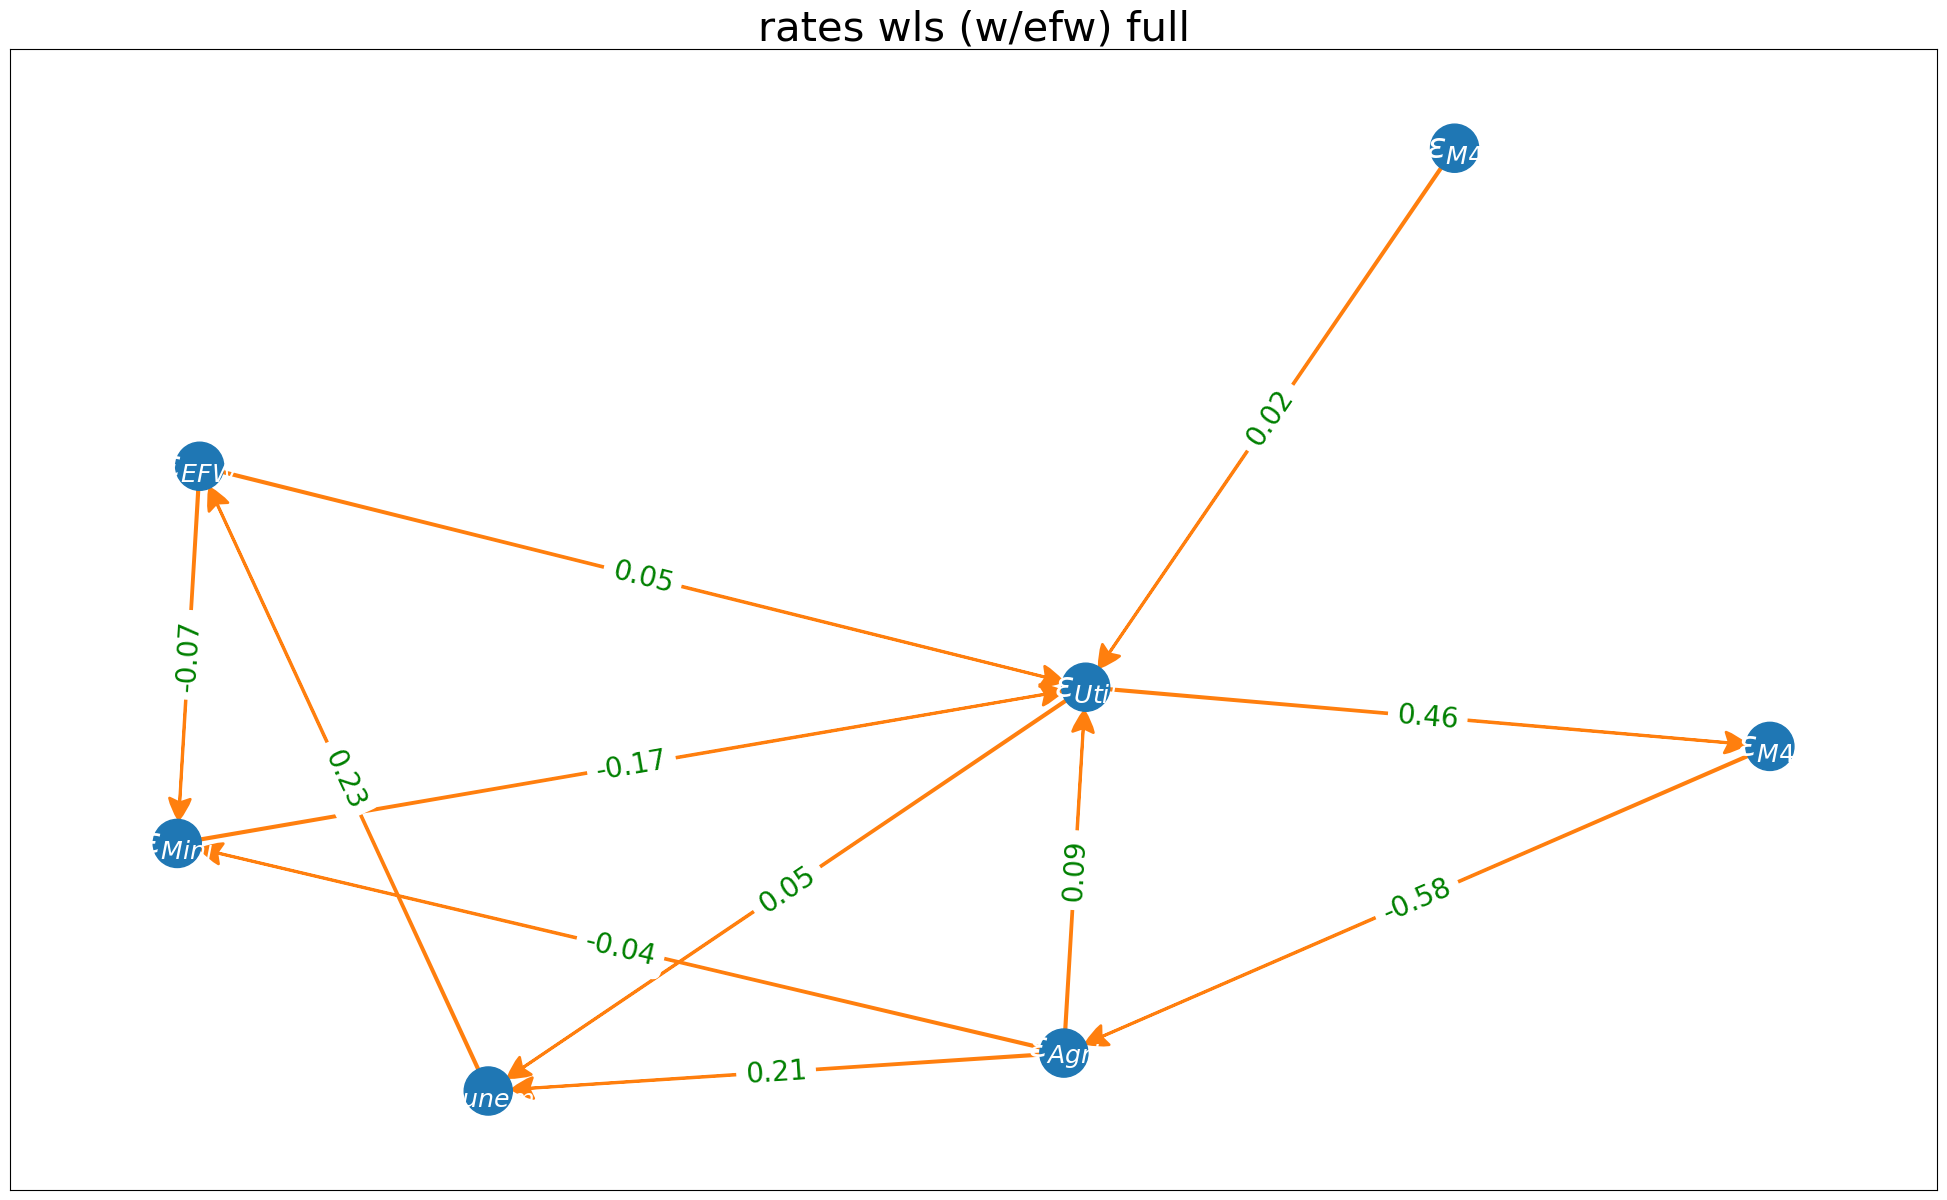

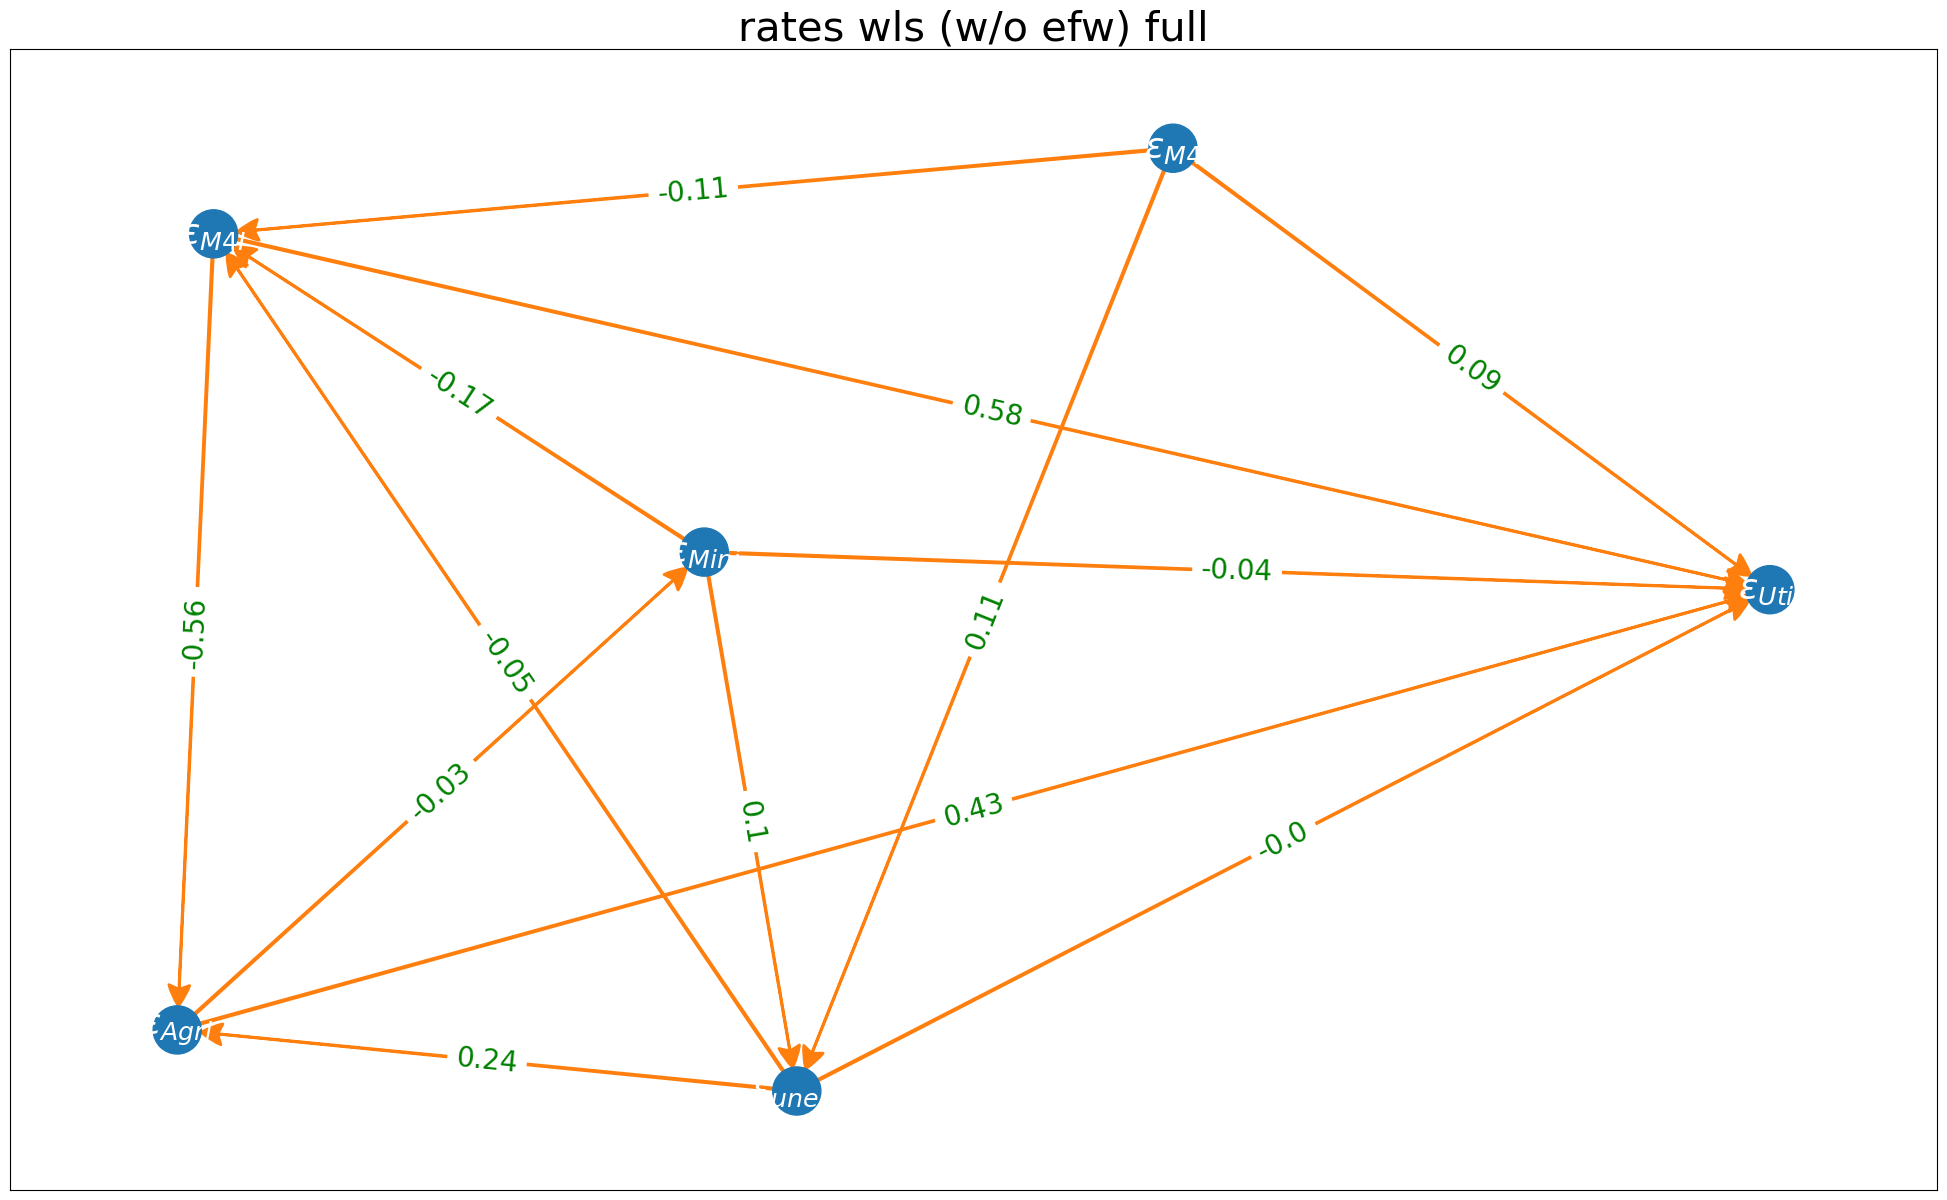

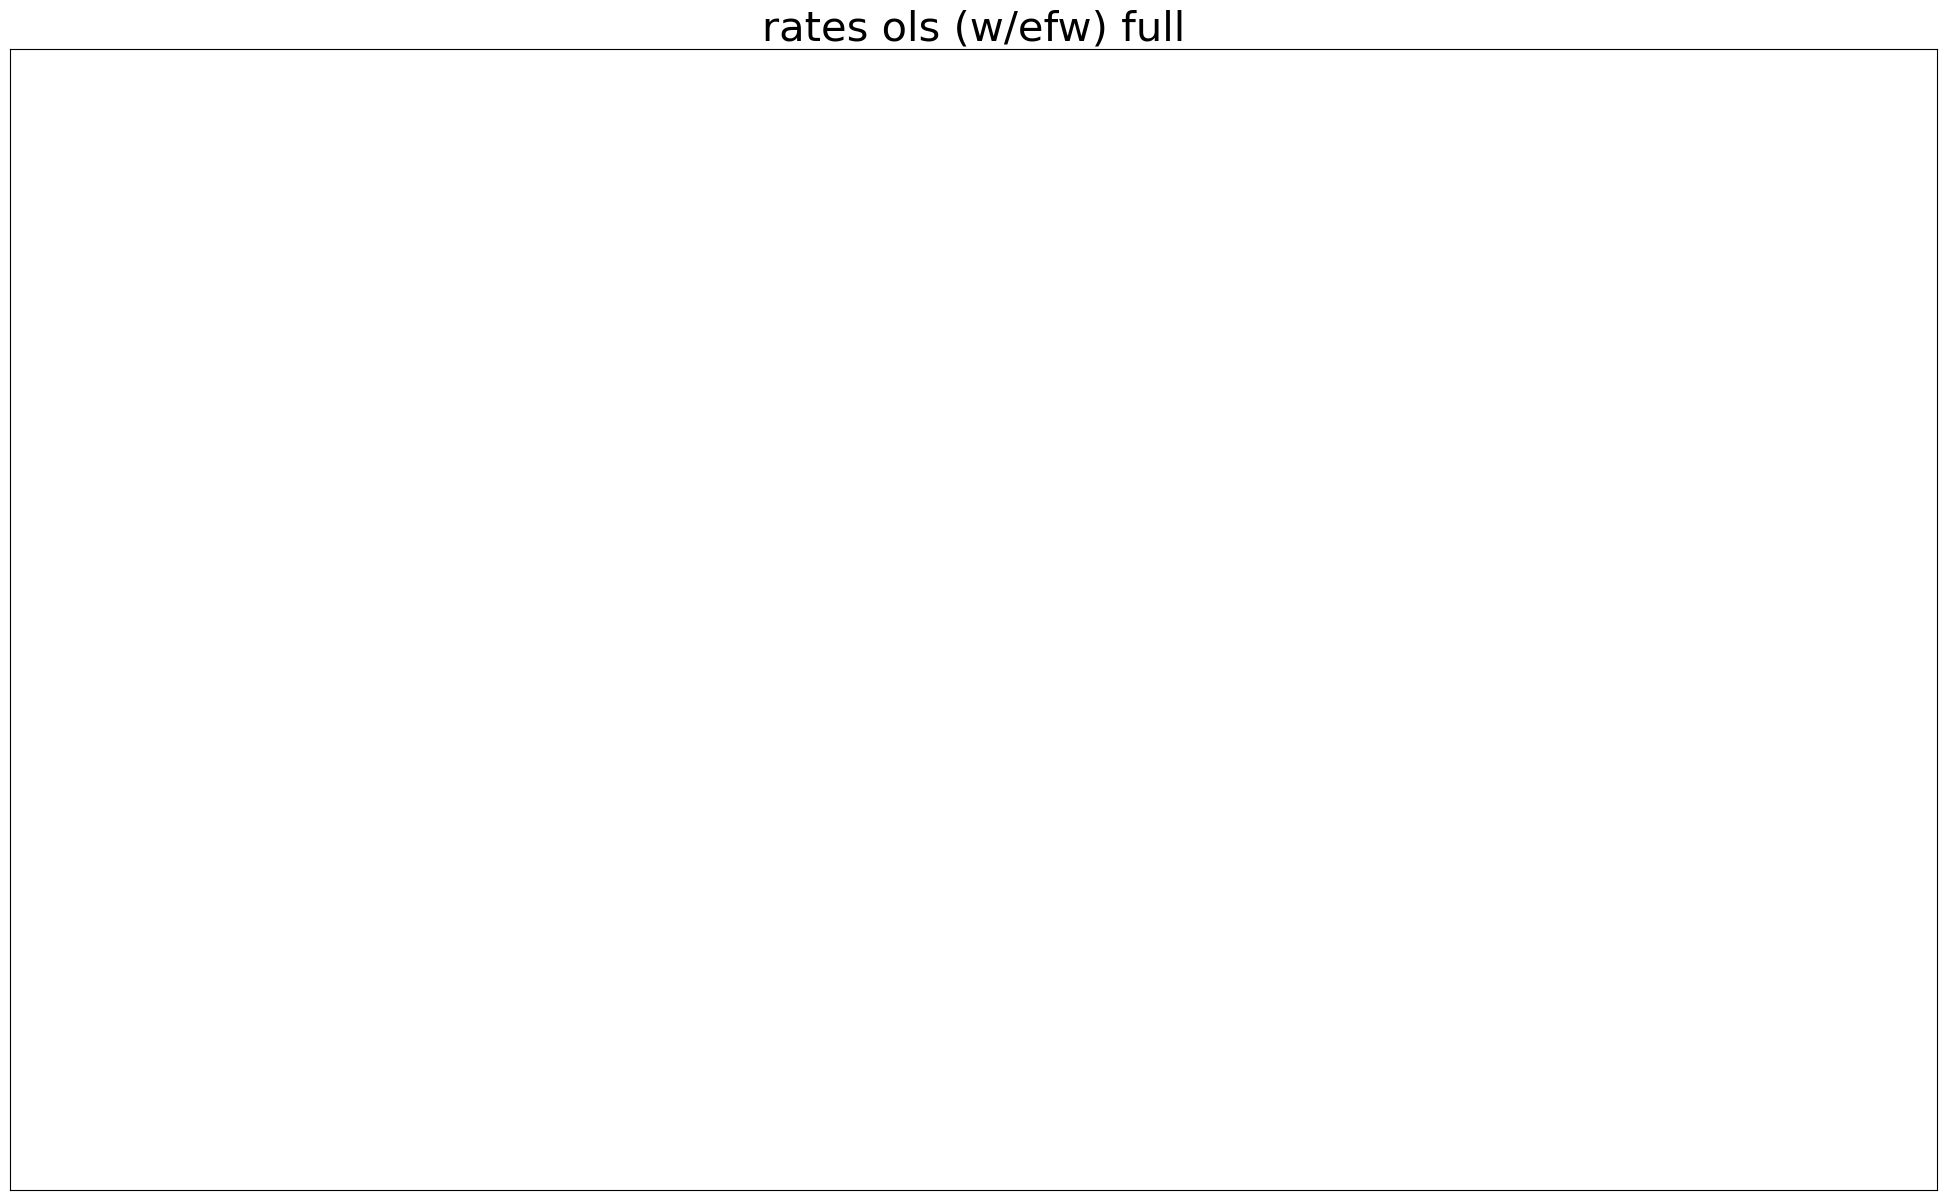

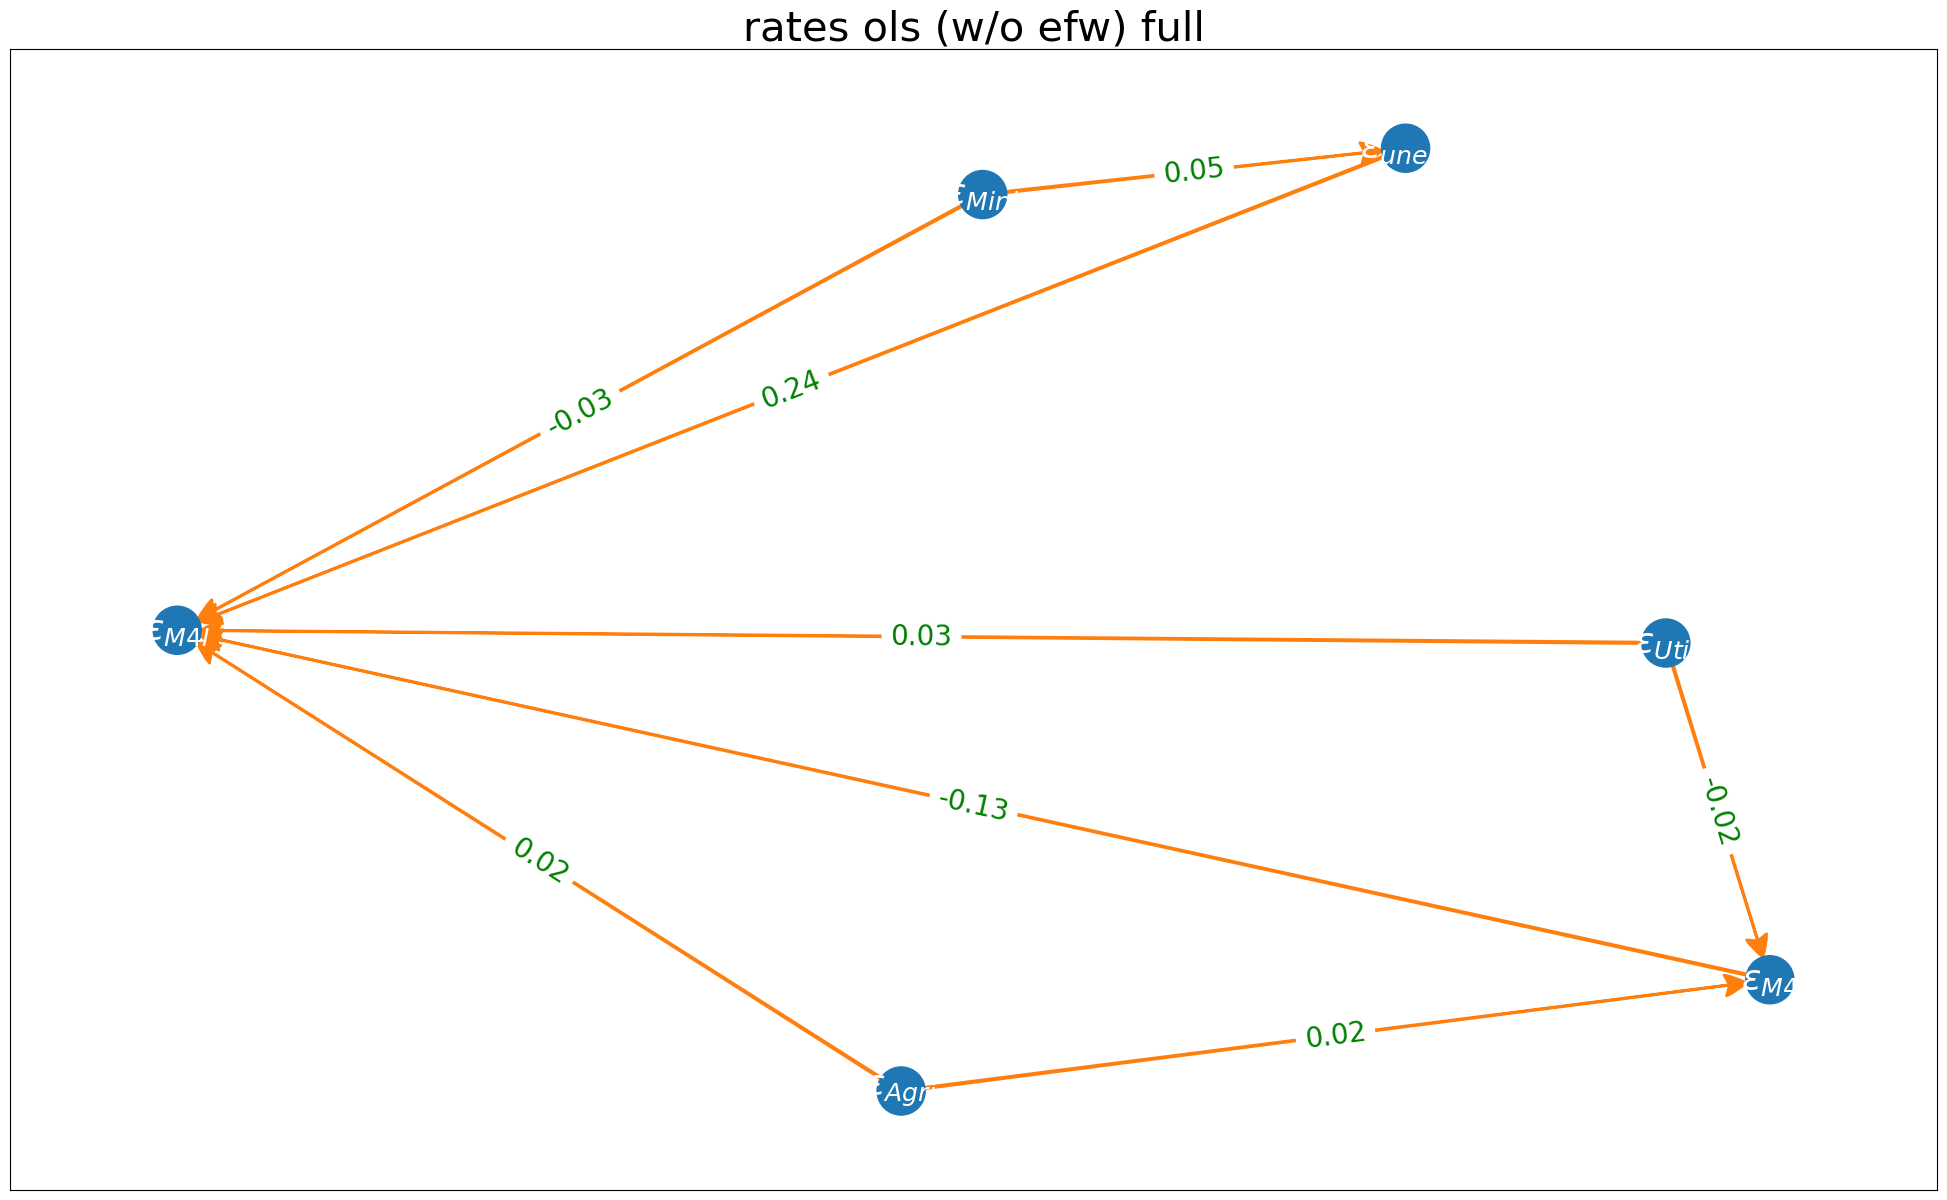

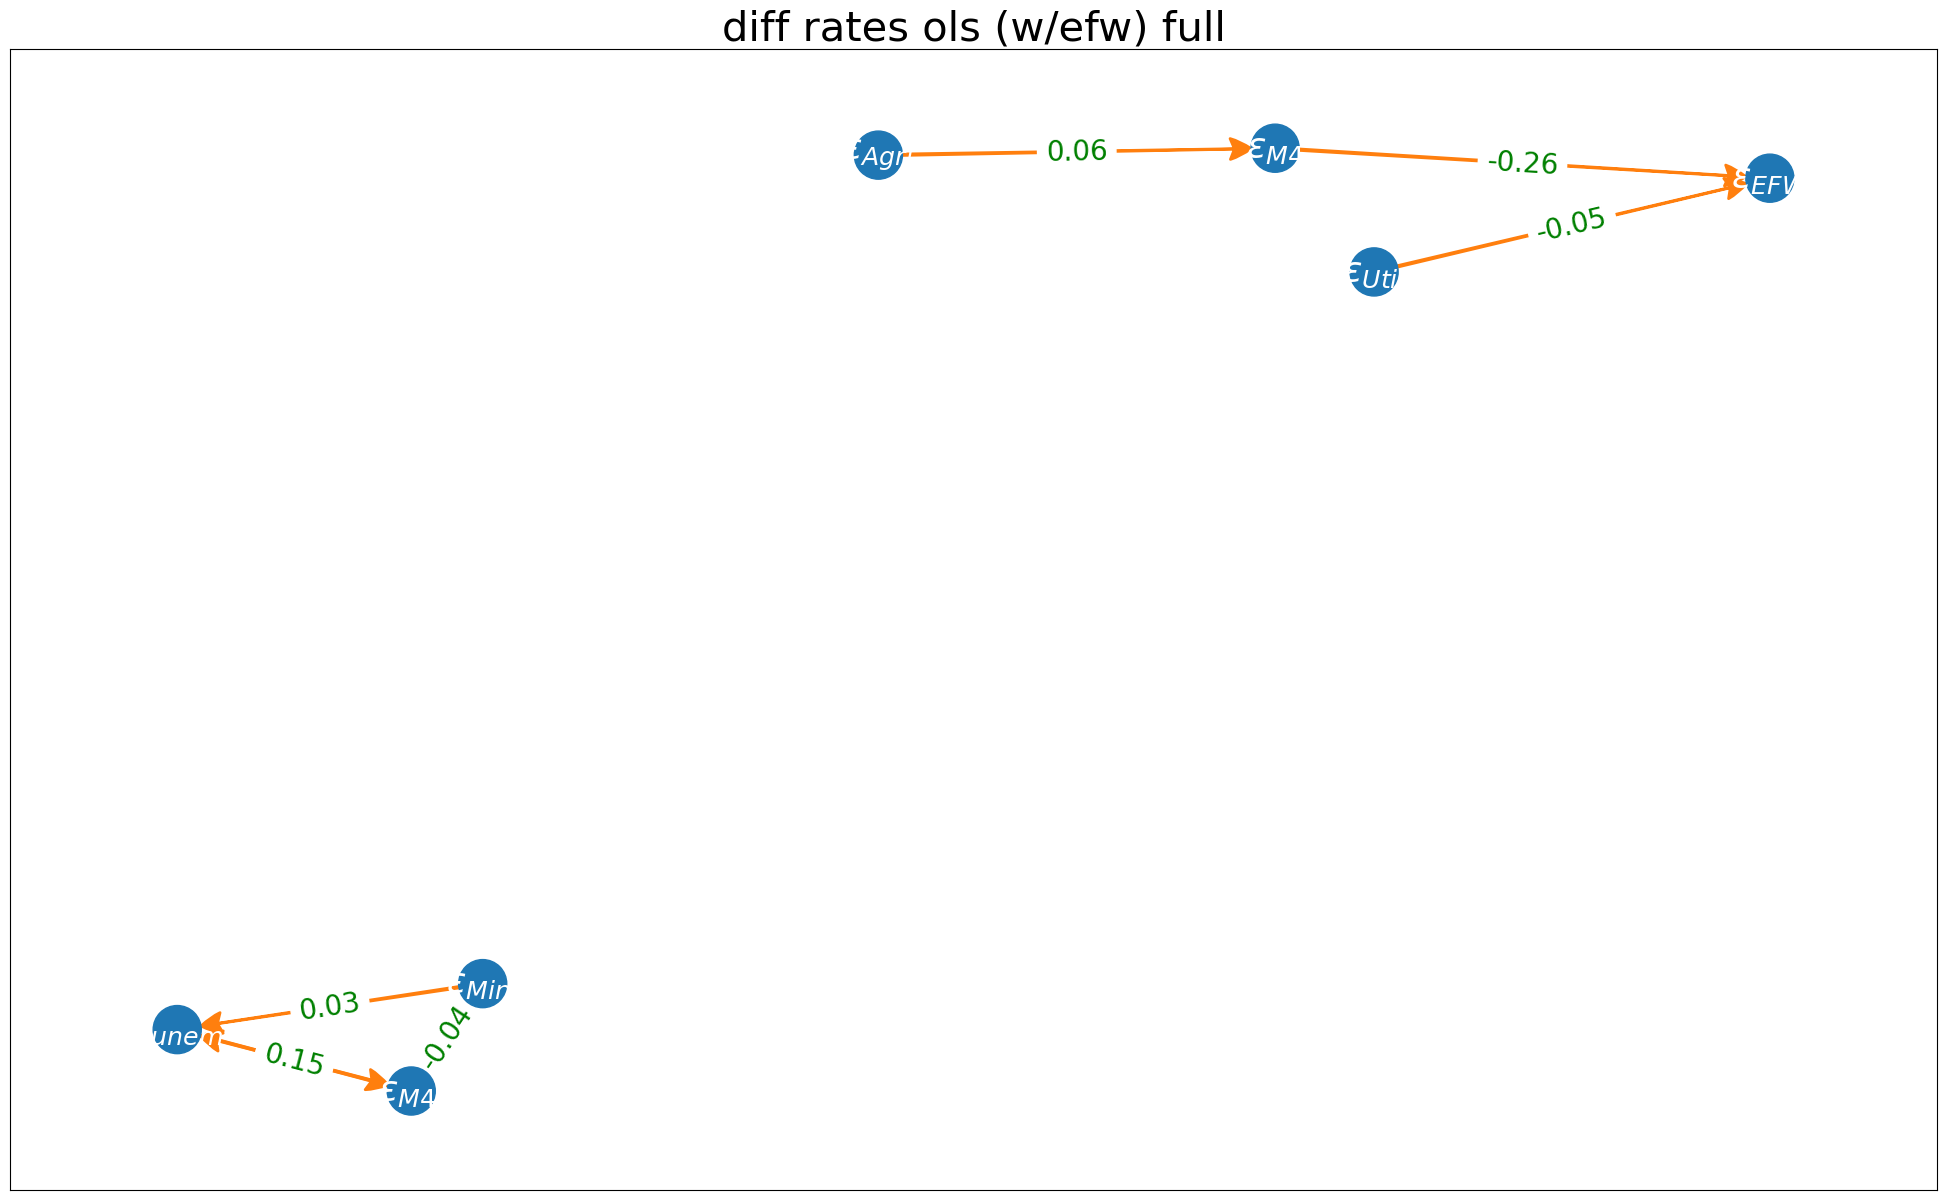

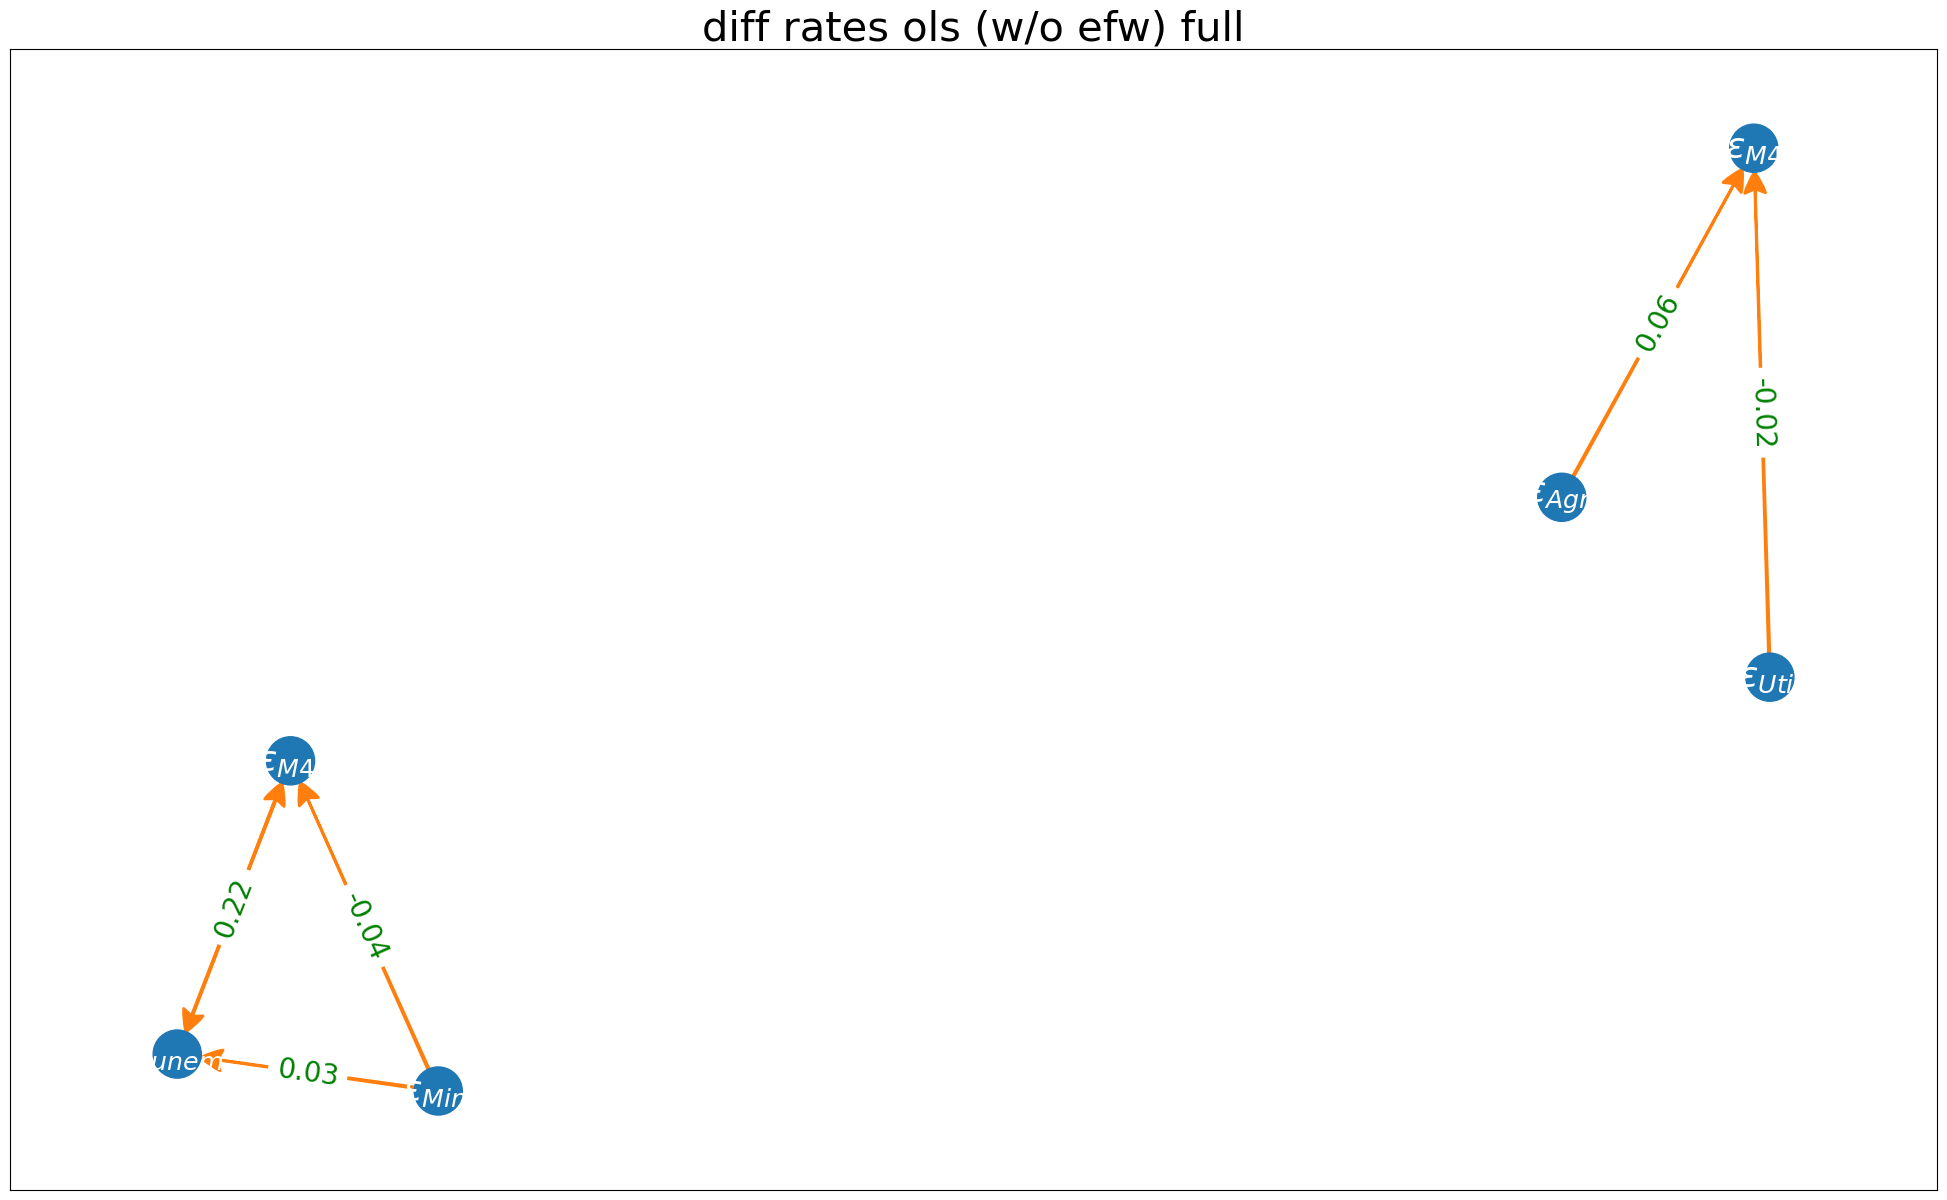

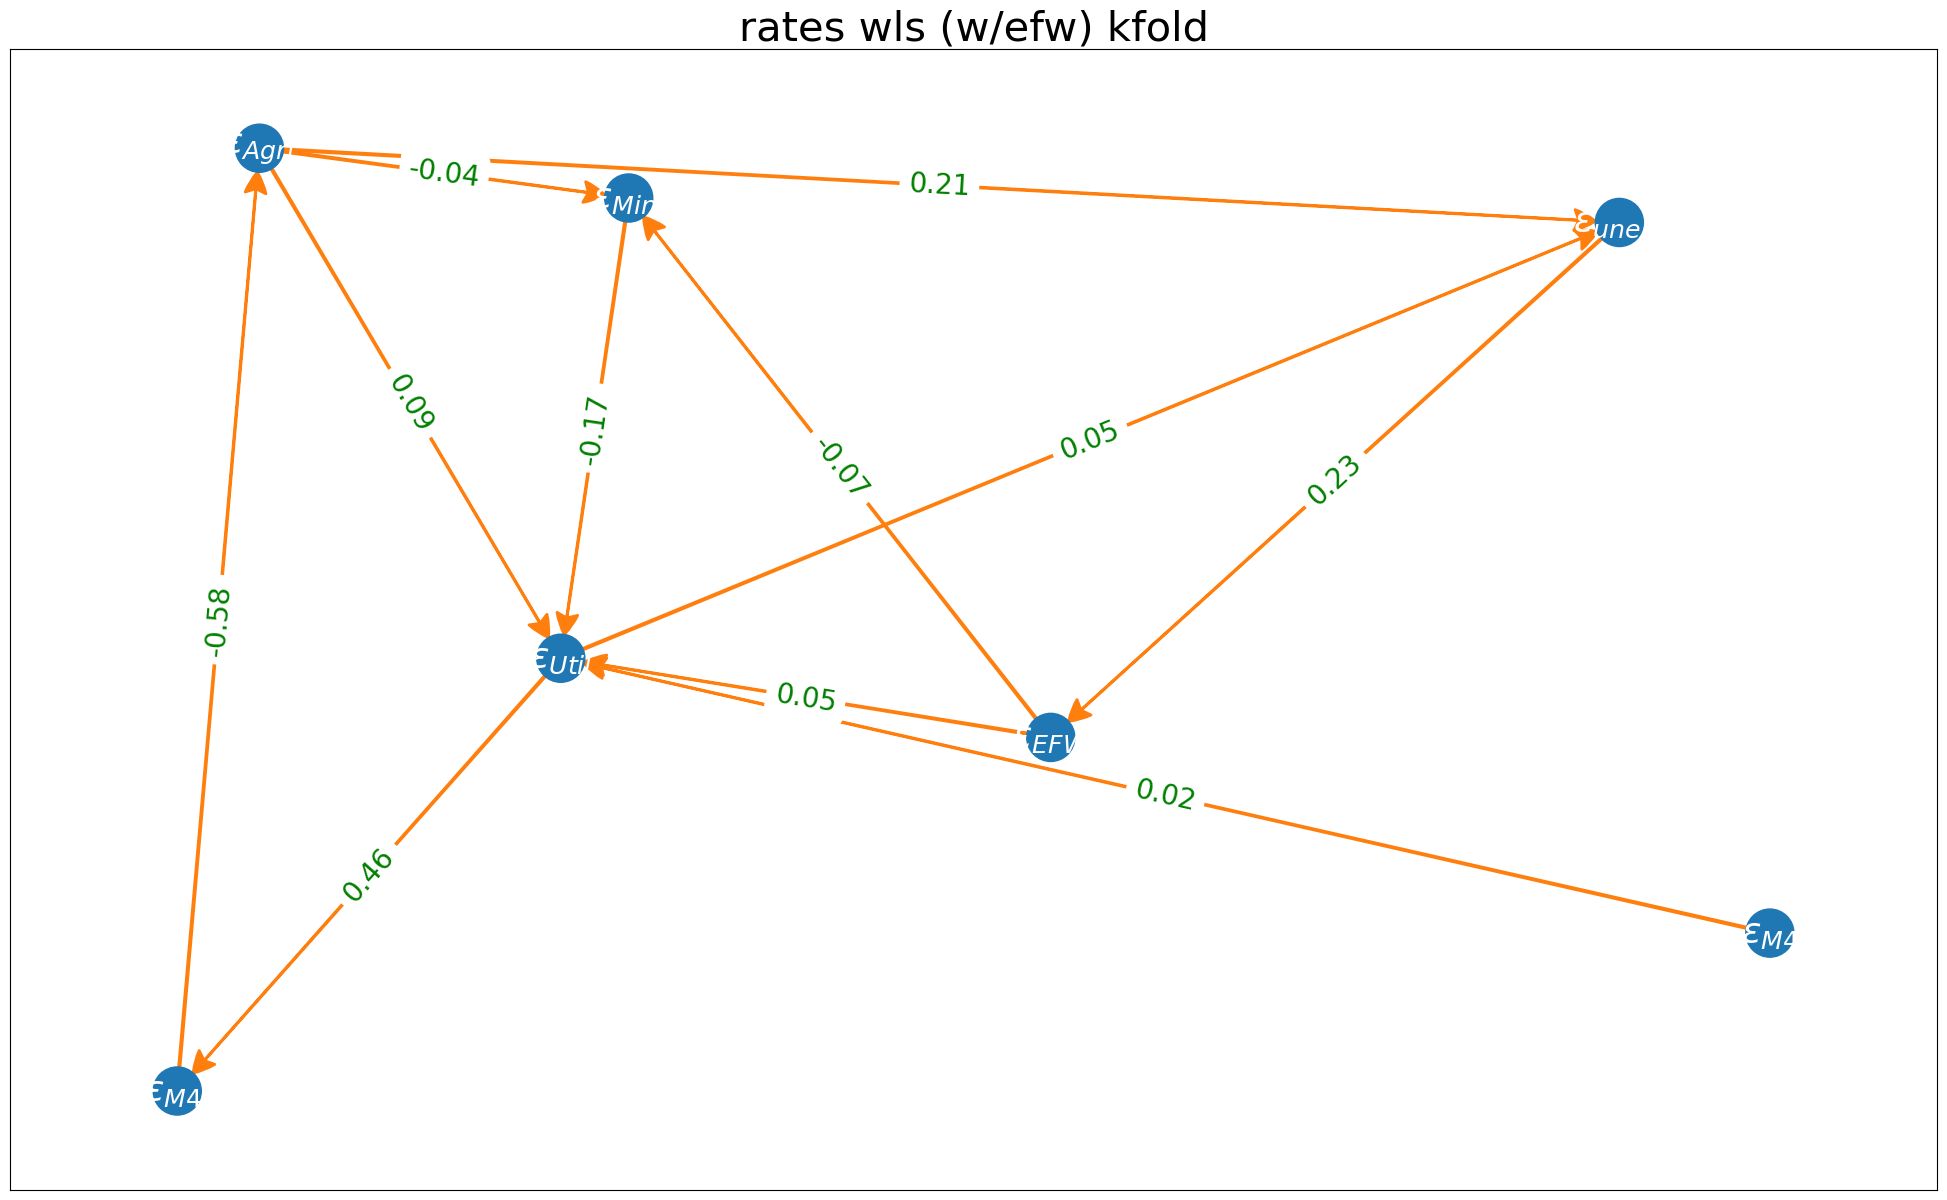

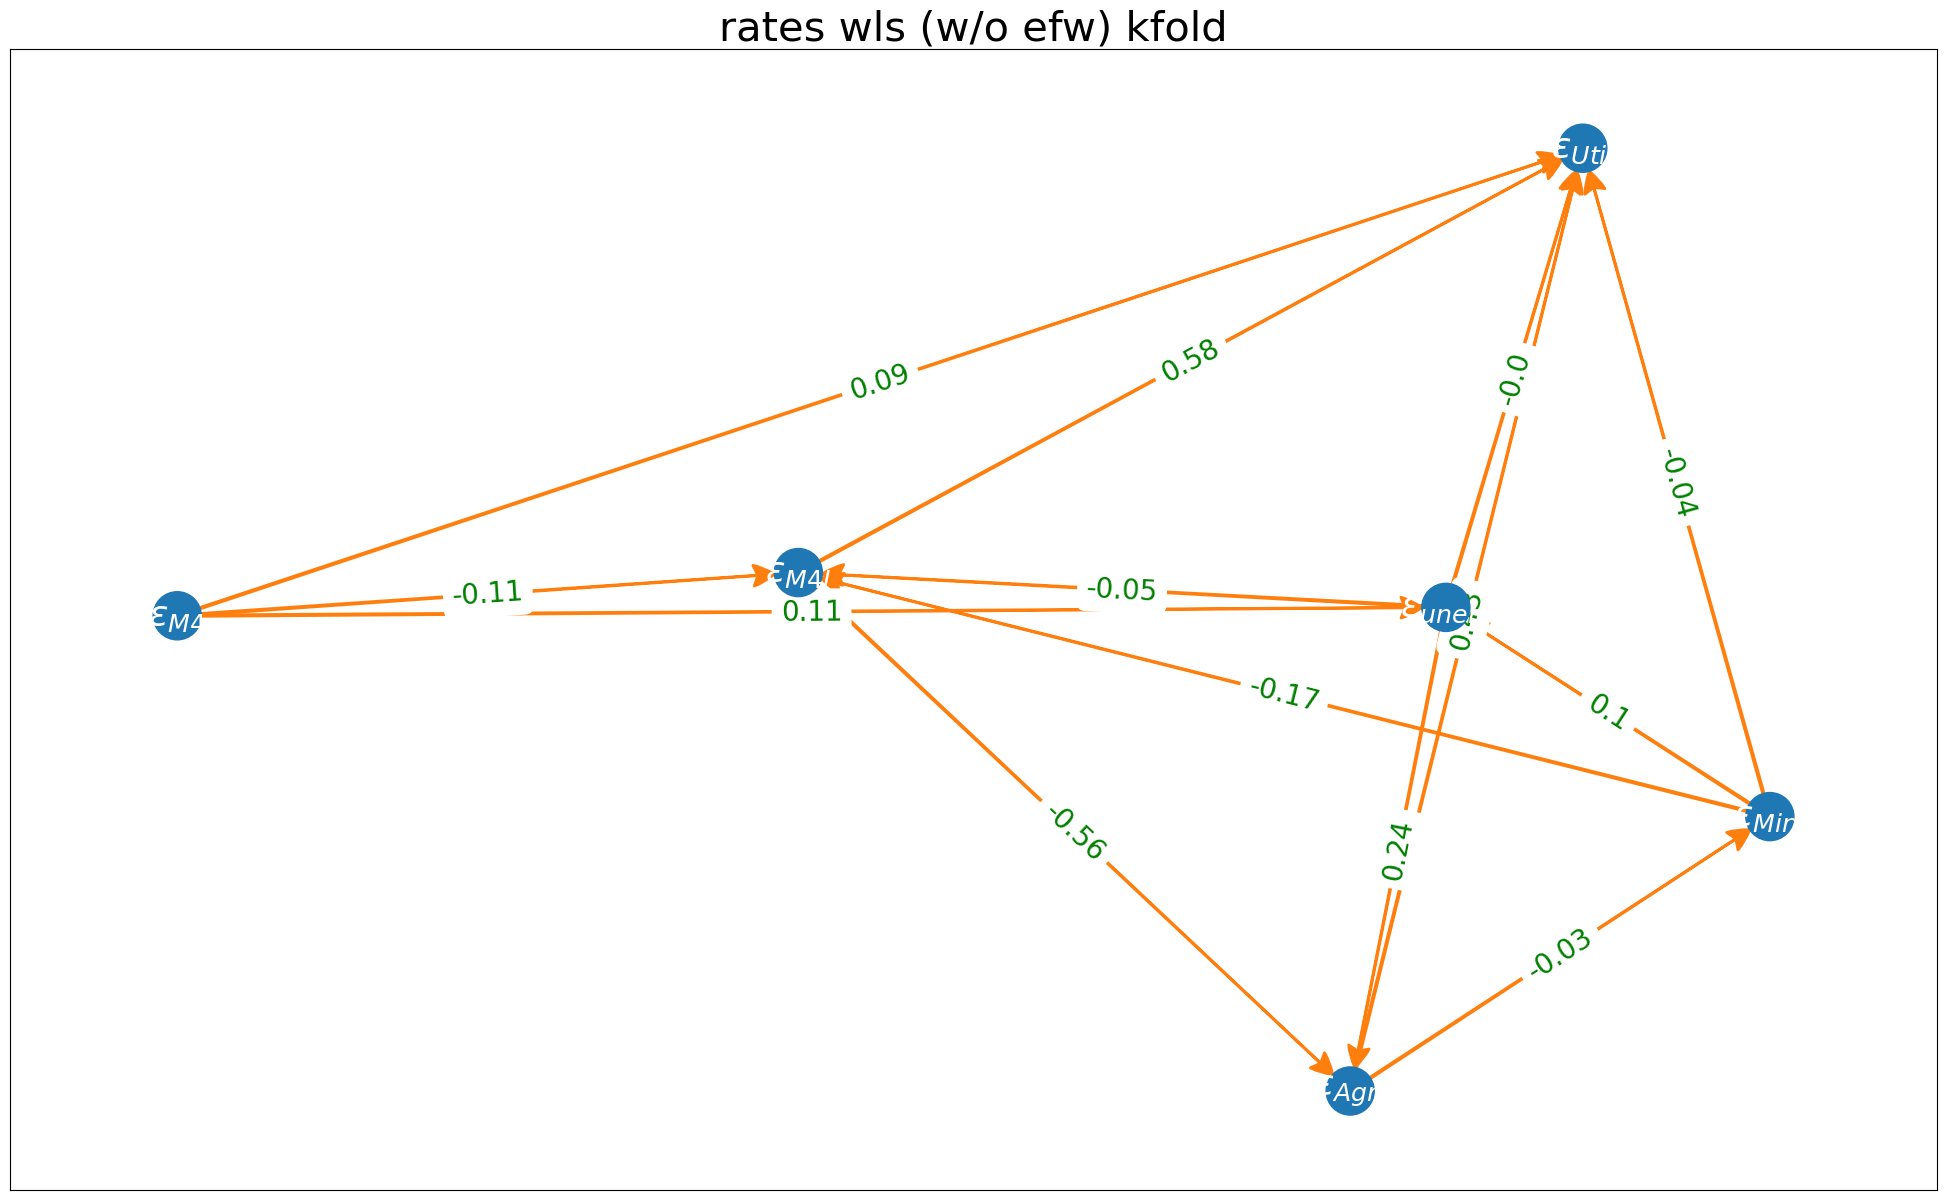

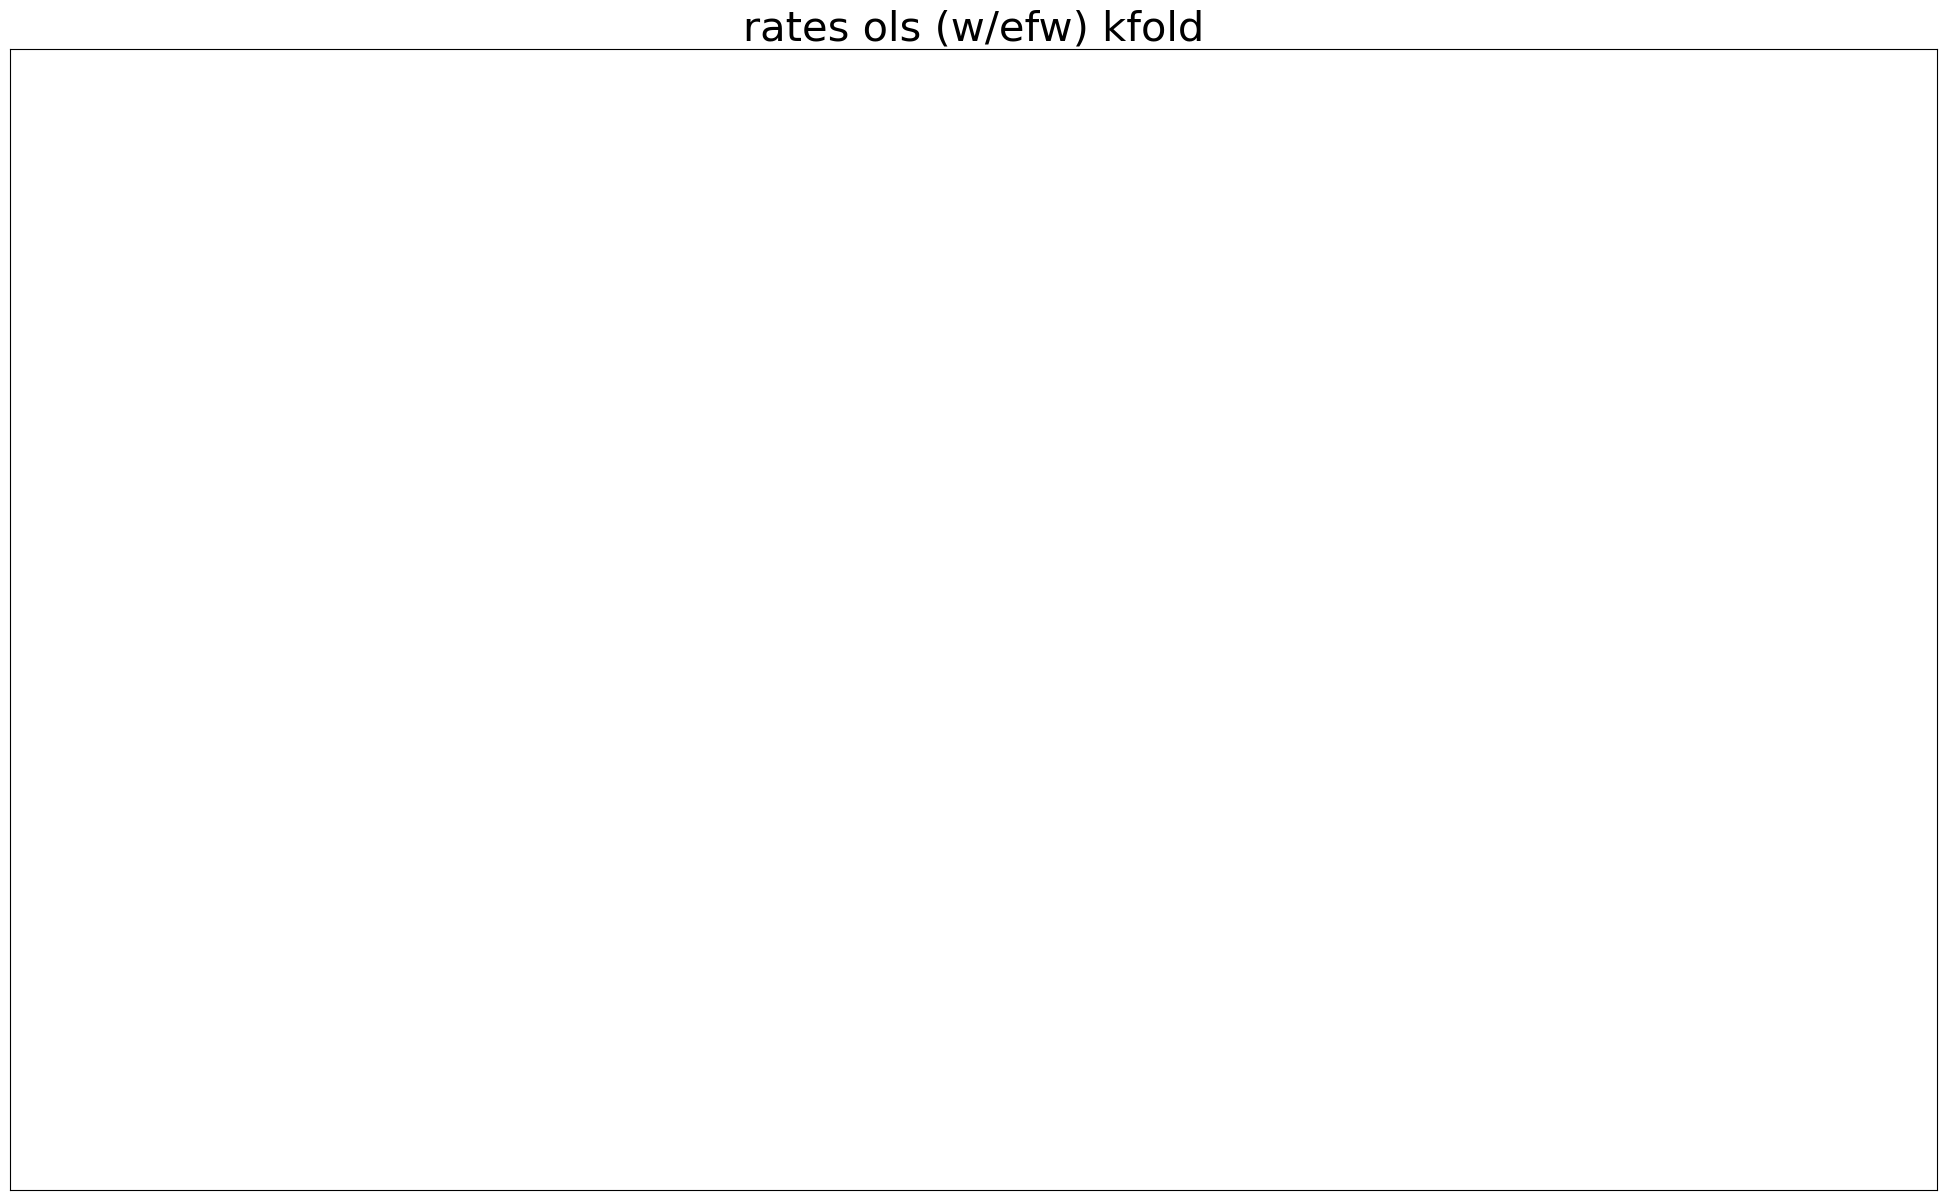

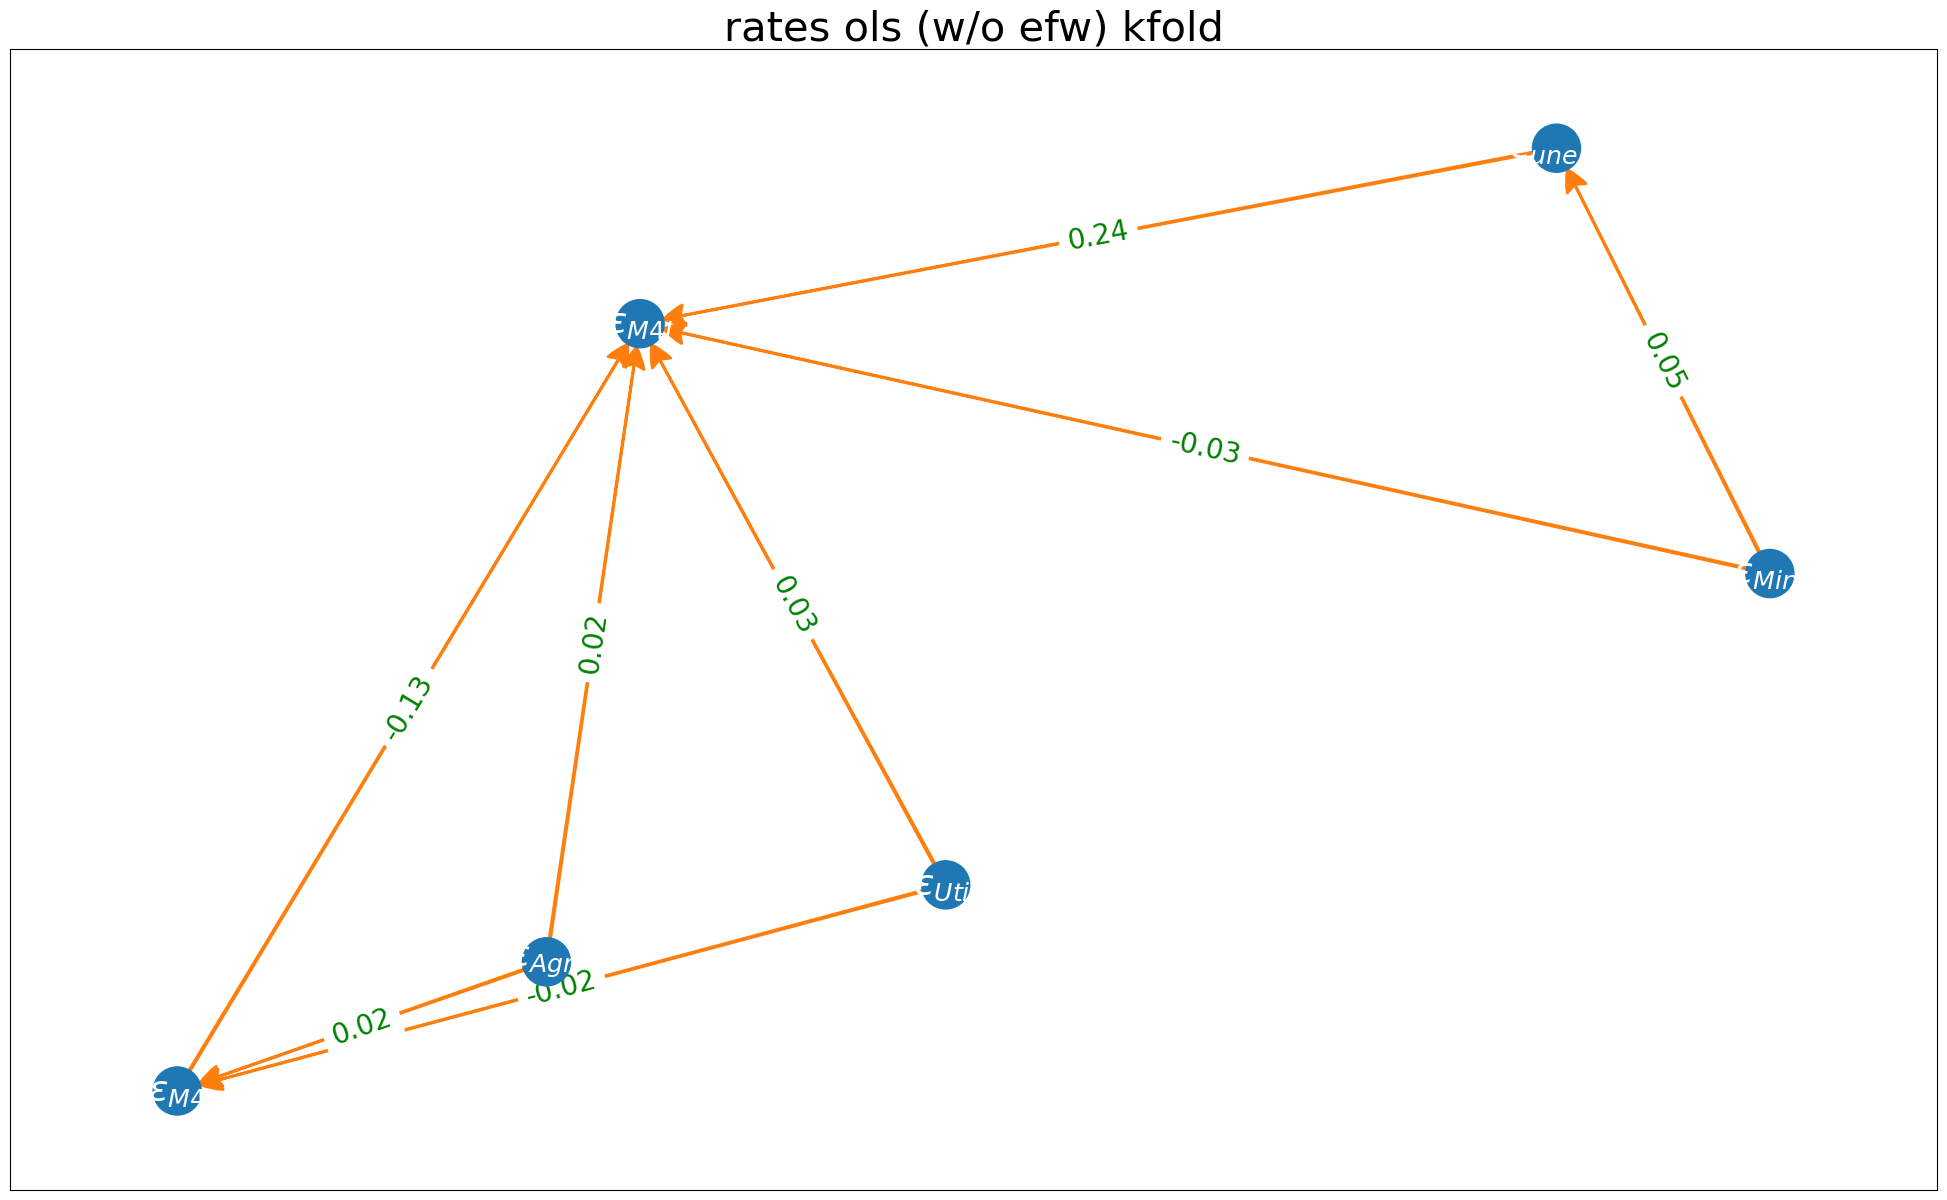

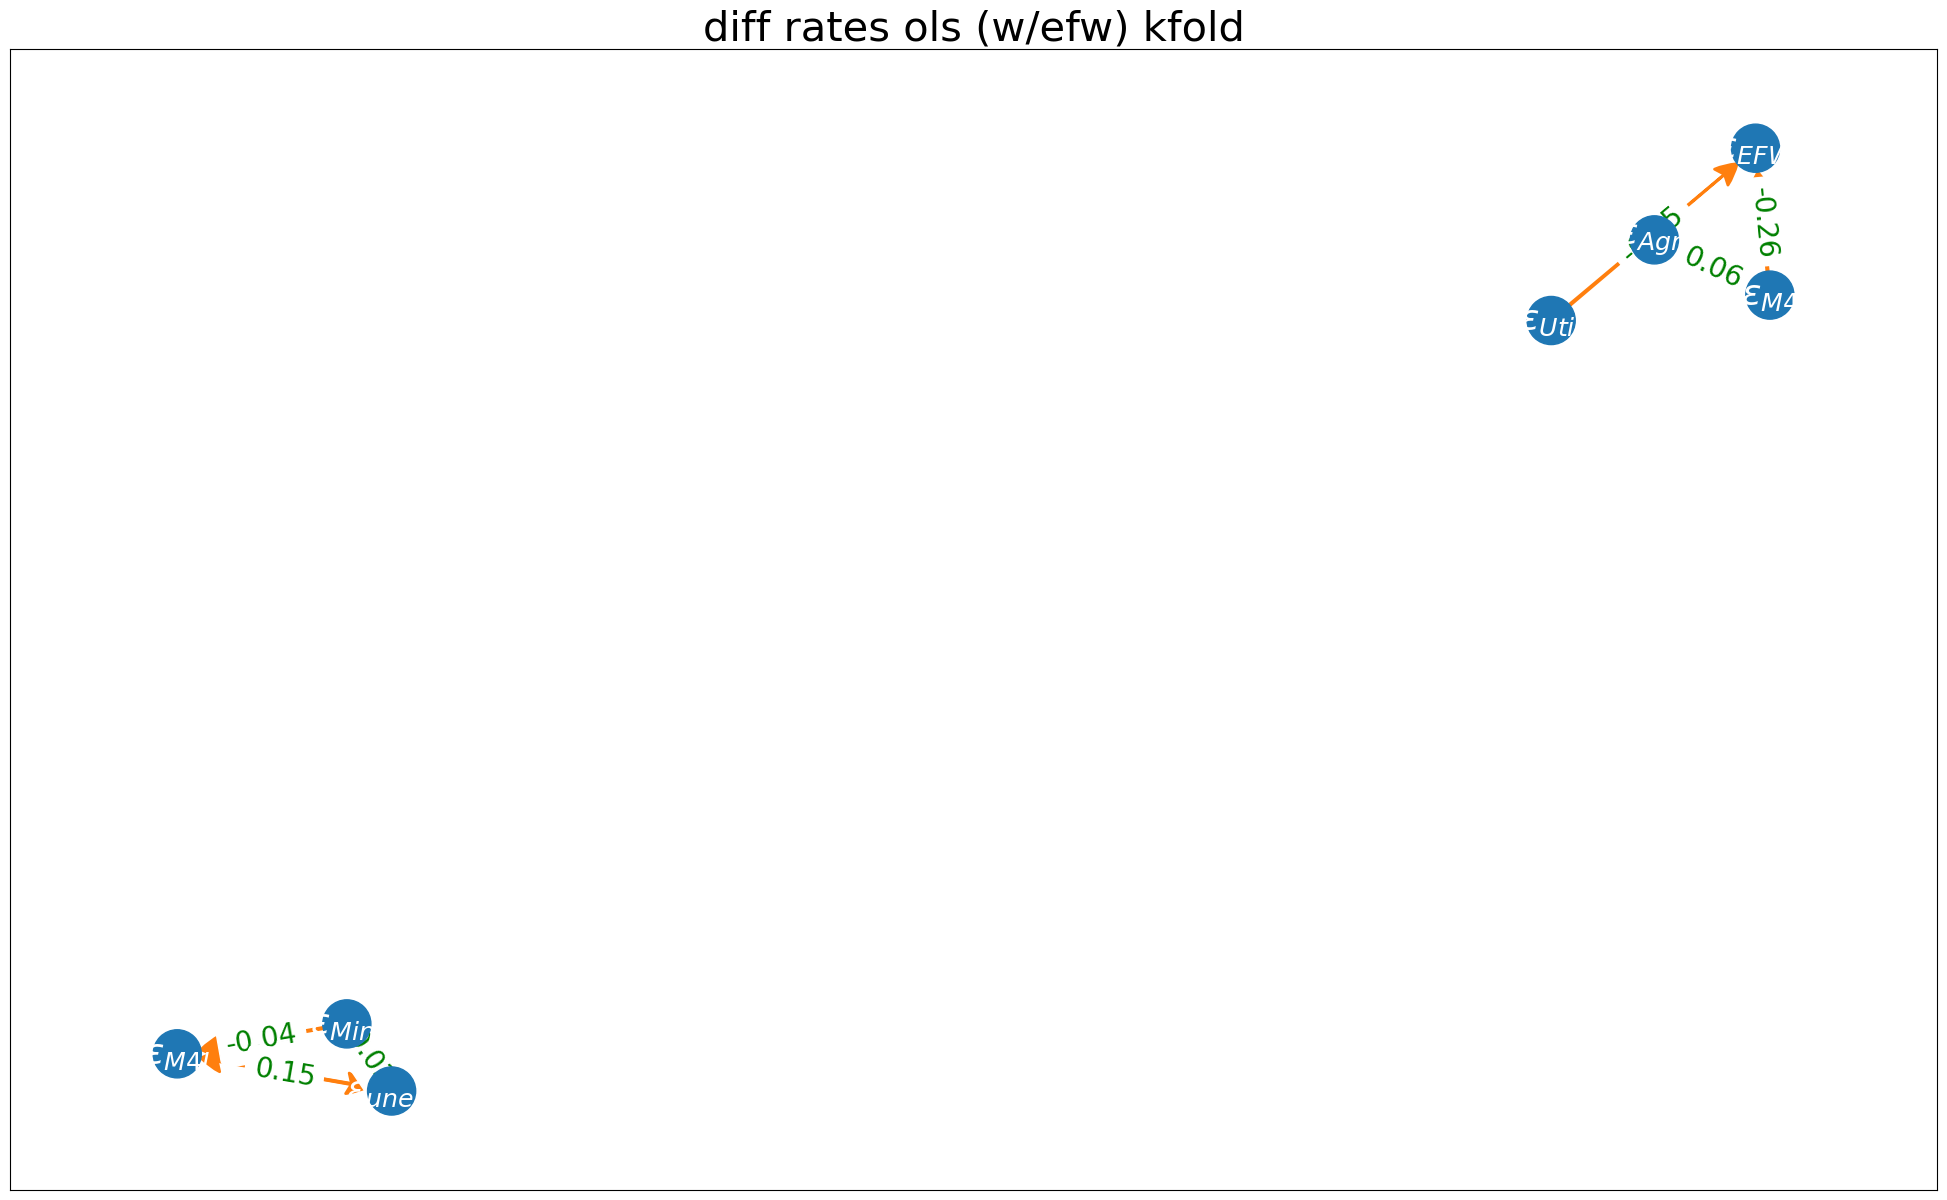

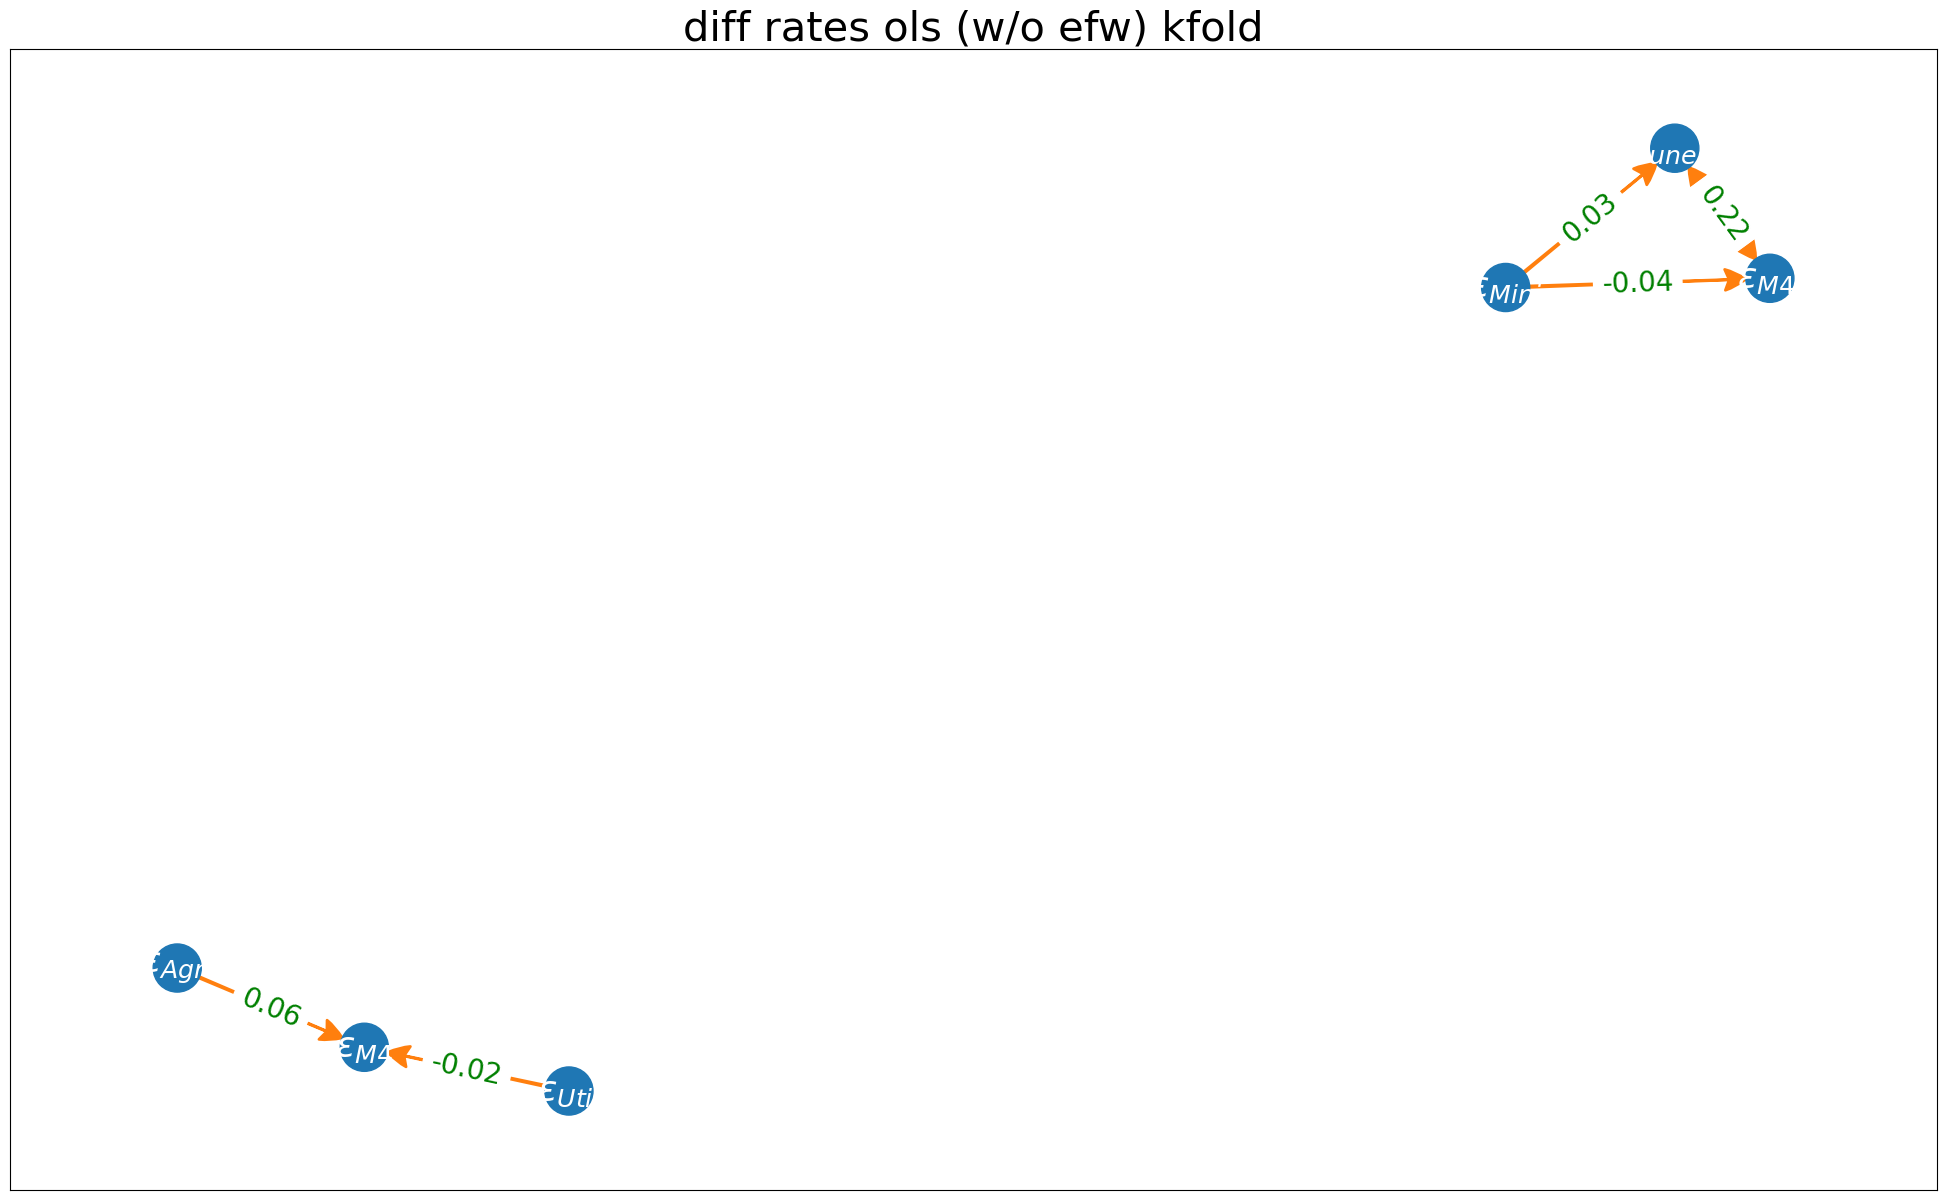

In [668]:
# from causallearn.search.ConstraintBased.PC import PC

def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    
    ############ Add ############
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            # Check if the caused variable is also a caused variable in any other links
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
            if (control, edge[1]) in control_edges:
                keep_controls.append(control)                
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
####### End Add #########
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color = color_map, node_size = 1200,
        with_labels = True, arrows = True,
        font_color = "white",
        font_size = 26, alpha = 1,
        width = 2, edge_color = "C1",
        arrowstyle = ArrowStyle("Fancy, head_length=1.5, head_width=1.5, tail_width=0.1"),
        ax = ax )
################# Add ####################
    nx.draw_networkx_edge_labels(graph,pos,
                                edge_labels=edge_labels,
                                font_color='green',
                                font_size=20)

# Iterate over each dataframe in the dictionary
for title, plot_df in dag_dict_all.items():
    if plot_df is not None:  # Ensure the dataframe is not None
        c = PC(plot_df)
        max_cond_vars = len(plot_df.keys()) - 2
        model = c.estimate(return_type='pdag', variant='orig', significance_level=0.01,
                           max_cond_vars=max_cond_vars, ci_test='pearsonr')
        edges = model.edges

        # Plot the DAG
        graph_DAG(edges, plot_df, title=title)


In [716]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, ax, title=""):
    graph = nx.DiGraph()
    
    # Calculate edge labels (partial correlations)
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            # Check if the caused variable is also a caused variable in any other links
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                keep_controls.append(control)
        pcorr = df[[edge[0], edge[1]] + keep_controls].pcorr()
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]], 2))

    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    pos = nx.spring_layout(graph)
    ax.set_title(title, fontsize=30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size=2000,
                     with_labels=True, arrows=True,
                     font_color="white", font_size=26, alpha=1,
                     width=2, edge_color="C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=1.5, head_width=1.5, tail_width=0.1"),
                     ax=ax)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels,
                                 font_color='green', font_size=10, ax=ax)
    ax.axis('off')
 
    # Add border around each subplot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

def plot_dags_grid(dag_dict, include_columns=None, exclude_columns=None):
    if include_columns is not None:
        include_columns = set(include_columns)
    else:
        include_columns = set()
    if exclude_columns is None:
        exclude_columns = []

    num_plots = len(dag_dict)
    num_cols = 2  # Number of columns in the grid layout
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(60, 60))
    axs = axs.flatten()

    for i, (dag_name, dag_df) in enumerate(dag_dict.items()):
        ax = axs[i]

        if include_columns:
            columns_to_plot = [col for col in dag_df.columns if col in include_columns]
        else:
            columns_to_plot = [col for col in dag_df.columns if col not in exclude_columns]

        # Fit the PC model
        c = PC(dag_df[columns_to_plot])
        max_cond_vars = len(columns_to_plot) - 2
        model = c.estimate(return_type='pdag', variant='orig', significance_level=0.01,
                           max_cond_vars=max_cond_vars, ci_test='pearsonr')
        edges = model.edges

        # Extract edges as a list of tuples
#         edges = [(edge.get_node1().get_name(), edge.get_node2().get_name()) for edge in edges]

        # Plot the DAG
        graph_DAG(edges, dag_df[columns_to_plot], ax=ax, title=dag_name)
        
        
    for j in range(i + 1, num_cols * num_rows):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


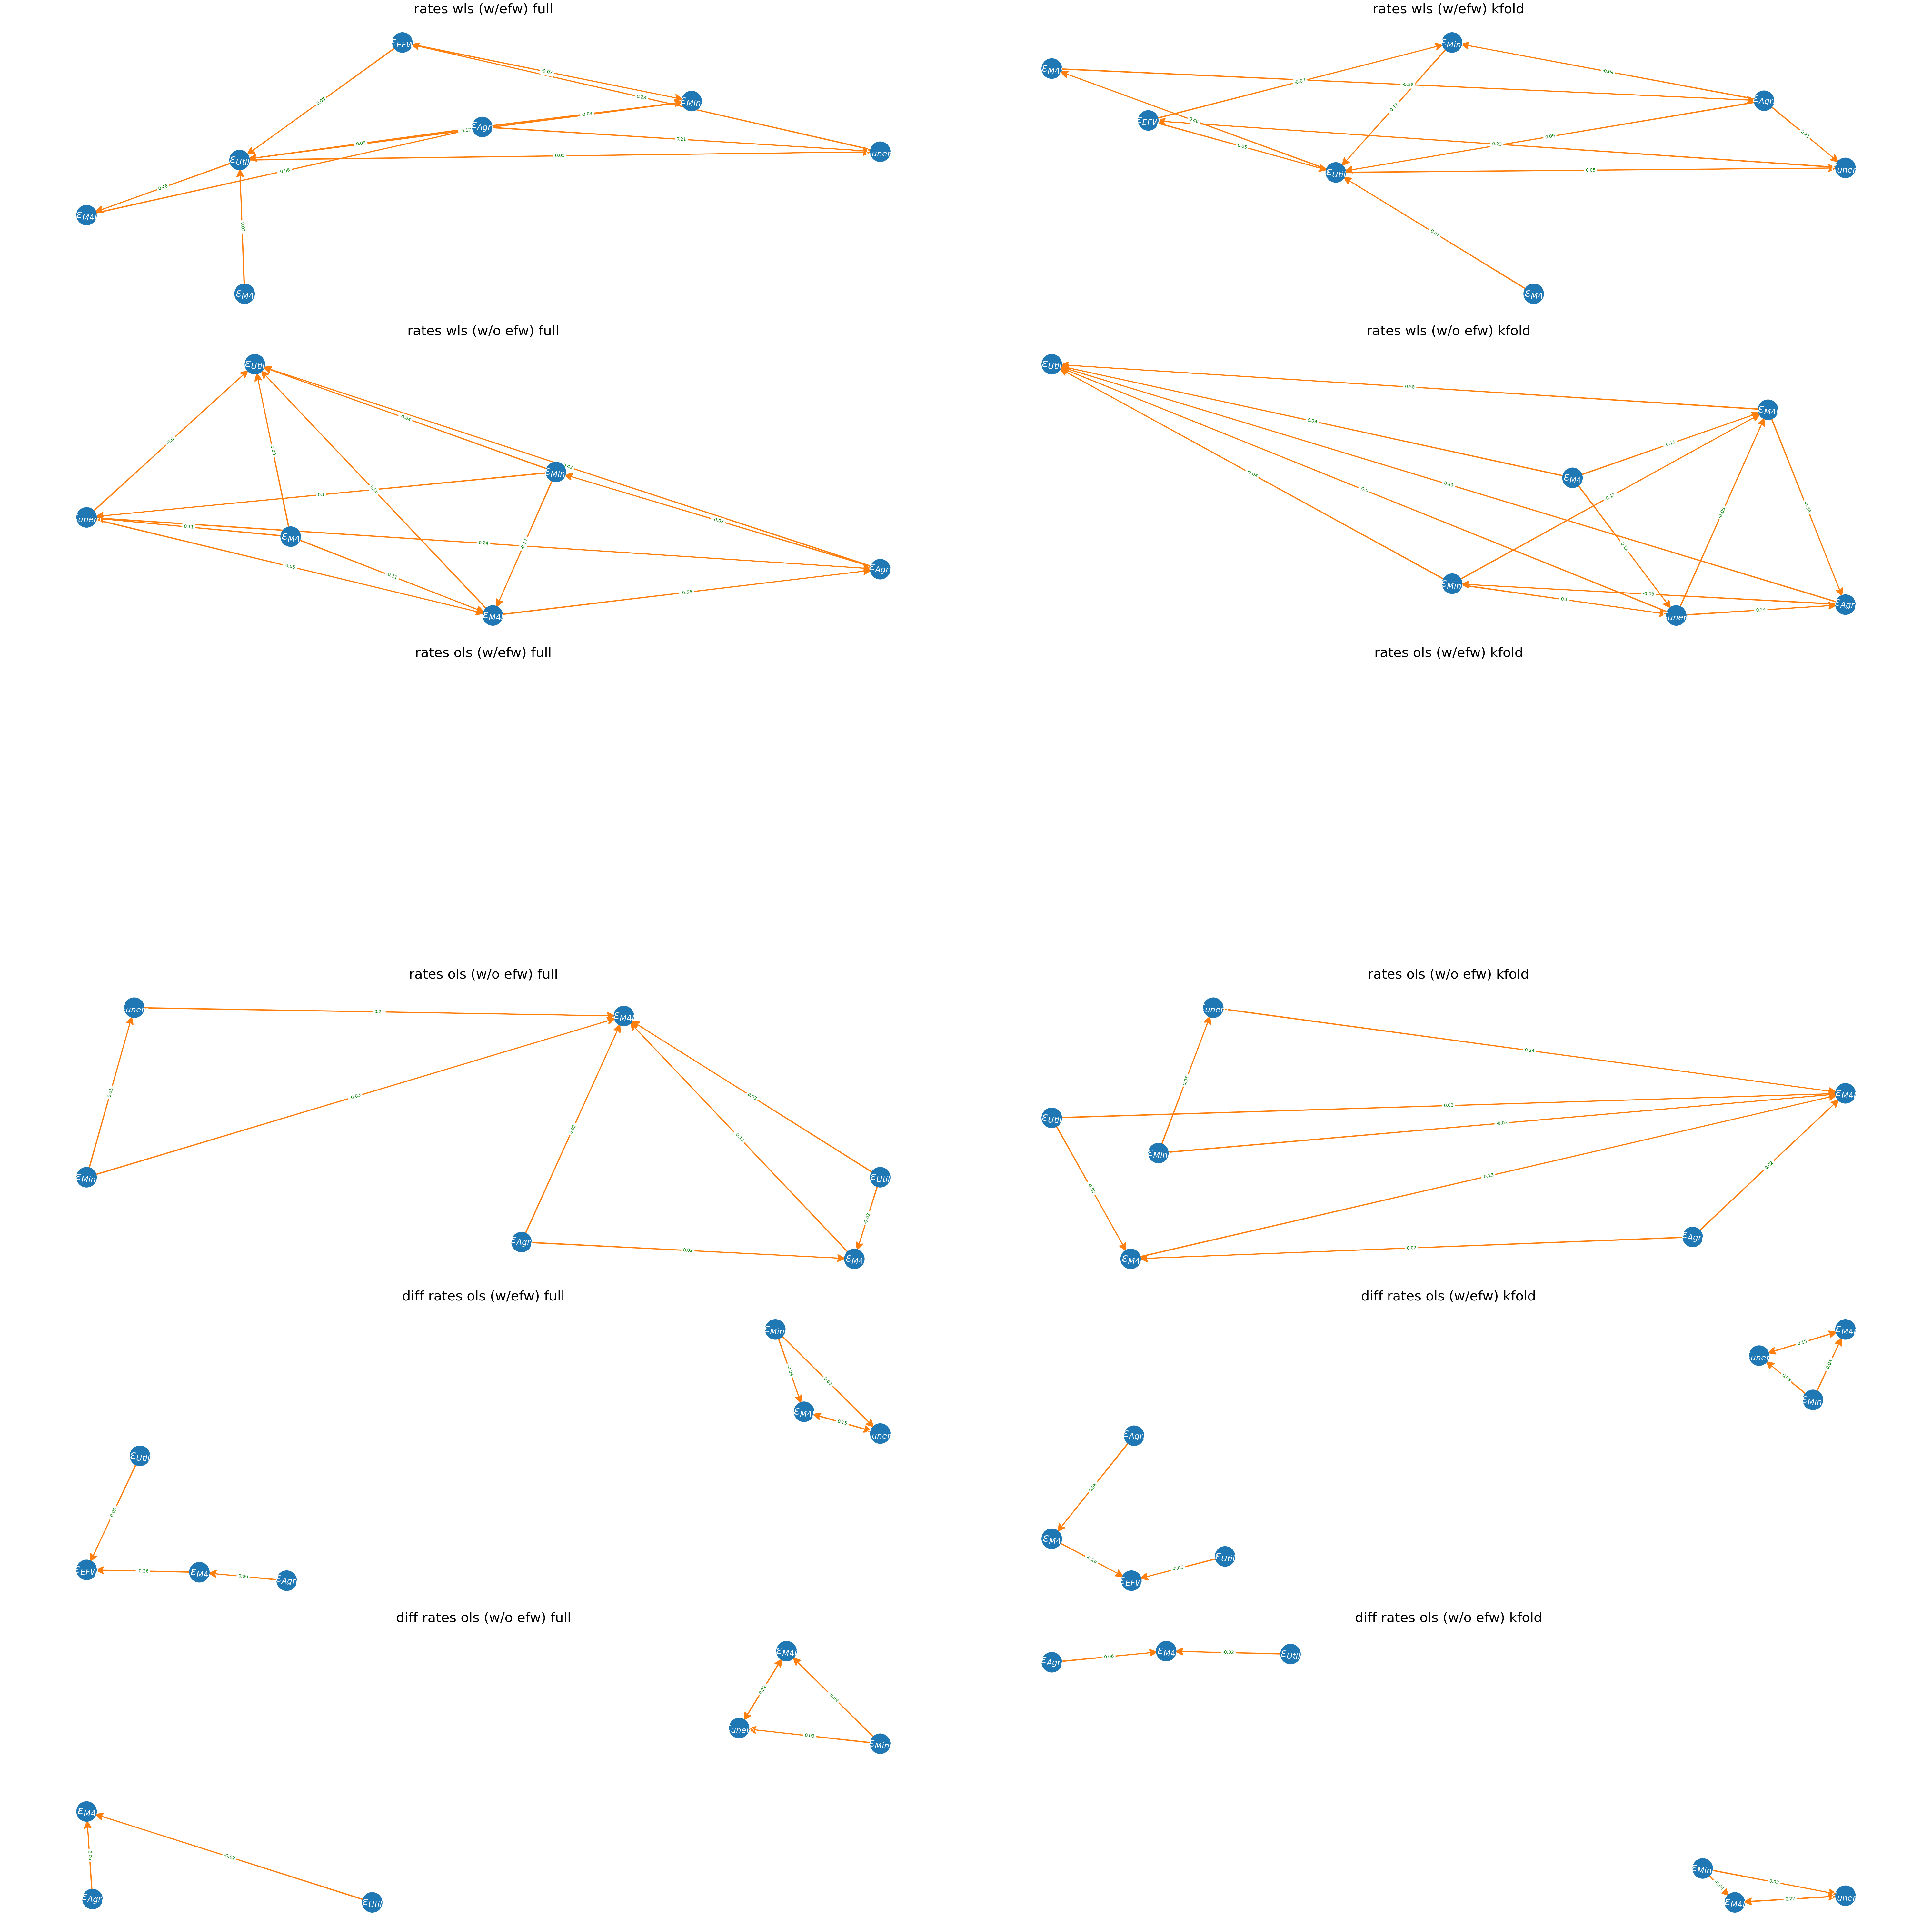

In [717]:
plot_dags_grid(dag_dict_all, include_columns=None, exclude_columns=None)